![](../docs/banner.png)

# Các mô hình học máy có giám sát
<hr>

## Các khái niệm cơ bản trong học máy có giám sát
<hr>

Như đã được giới thiệu ở các chương trước, học máy có giám sát là một trong những phương pháp học máy được áp dụng rộng rãi và thành công nhất trong thực tiễn. Trong chương này, chúng ta sẽ đi sâu vào khái niệm học có giám sát và trình bày chi tiết một số thuật toán tiêu biểu thuộc nhóm này. Một số ví dụ điển hình về ứng dụng học có giám sát đã được đề cập trong chương 3, bao gồm: phân loại loài hoa Iris dựa trên kích thước của cánh hoa và đài hoa, dự đoán giá bất động sản tại Hà Nội dựa trên các thuộc tính của bất động sản, và xác định khách hàng tiềm năng trong các chiến dịch tiếp thị sản phẩm tiết kiệm của ngân hàng.

Về bản chất, học có giám sát được sử dụng trong những tình huống mà mục tiêu là dự đoán một đầu ra cụ thể dựa trên một nhóm các biến đầu vào, hay thường gọi là đặc trưng đã biết, với điều kiện là chúng ta có sẵn tập dữ liệu gồm các đầy đủ đầu vào và đầu ra. Quá trình huấn luyện mô hình học máy được thực hiện trên tập dữ liệu thường được gọi là tập dữ liệu huấn luyện mô hình, hay gọi tắt là tập huấn luyện. Mục tiêu của mô hình là có thể đưa ra **dự đoán chính xác cho các dữ liệu mới**, chưa từng xuất hiện trong quá trình huấn luyện.

Một đặc điểm quan trọng của học có giám sát là đòi hỏi sự tham gia của con người trong việc xây dựng và gán nhãn cho tập huấn luyện. Tuy nhiên, sau khi mô hình được xây dựng và triển khai, quá trình dự đoán sẽ được tự động hóa và có khả năng rút ngắn thời gian thực hiện những nhiệm vụ tốn nhiều công sức hoặc không khả thi nếu xử lý thủ công.

### Bài toán phân loại và hồi quy
<hr>

Trong học máy có giám sát, có thể phân chia các bài toán thành hai loại chính: phân loại và hồi quy. Đối với các bài toán phân loại, mục tiêu là dự đoán một nhãn, tức là chọn một trong số các giá trị rời rạc đã được xác định trước. Một ví dụ minh họa cho bài toán phân loại đã được trình bày trong chương 3 là việc phân loại hoa iris thành một trong ba loài khác nhau dựa trên các đặc trưng hình thái.

Các bài toán phân loại thường được chia thành hai nhóm:

- Phân loại nhị phân, hay *binary classification*: chỉ bao gồm hai lớp, tương ứng với việc đưa ra câu trả lời cho một câu hỏi dạng "có/không".
- Phân loại đa lớp, hay *multiclass classification*: bao gồm nhiều hơn hai lớp, đòi hỏi mô hình xác định một lựa chọn trong tập nhãn lớn hơn.

Các ứng dụng điển hình của phân loại nhị phân bao gồm: xác định liệu một khách hàng có đồng ý sử dụng dịch vụ hay không, phát hiện một giao dịch có gian lận hay không, hoặc phân loại một email là thư rác hay không. Những bài toán này thể hiện rõ đặc trưng của phân loại nhị phân: đưa ra quyết định giữa hai khả năng đối lập dựa trên thông tin đầu vào.

Ngược lại, bài toán phân loại hoa iris ở chương 3 là ví dụ tiêu biểu của phân loại đa lớp, vì đầu ra có thể là một trong ba loài hoa. Một ví dụ khác là bài toán dự đoán ngôn ngữ của một trang web dựa trên nội dung văn bản trong đó mô hình cần lựa chọn một ngôn ngữ duy nhất từ một danh sách xác định các ngôn ngữ có thể xuất hiện, hoặc phức tạp hơn là bài toán phân loại chữ số viết tay dựa trên bức ảnh của số đó.

Đối với các bài toán hồi quy, mục tiêu của mô hình là dự đoán một giá trị liên tục, hay nói cách khác là một số thực. Trong ngữ cảnh lập trình, đây thường là một biến giá trị kiểu số dấu phẩy động, còn trong ngôn ngữ toán học, nó thuộc miền các số thực hoặc một khoảng giá trị liên tục. Một số ví dụ điển hình của các bài toán hồi quy bao gồm: dự đoán giá bất động sản tại Hà Nội dựa trên các đặc trưng như diện tích, vị trí, số phòng; hoặc ước lượng thu nhập hàng năm của một cá nhân dựa trên các đặc trưng nhân khẩu học như trình độ học vấn, độ tuổi và nơi sinh sống. Trong các trường hợp này, đầu ra mong muốn là một con số liên tục – chẳng hạn như một số tiền – và có thể nằm ở bất kỳ vị trí nào trong một khoảng xác định. Một ví dụ khác về hồi quy là bài toán dự đoán năng suất của một trang trại, với các biến đầu vào có thể bao gồm sản lượng của những năm trước, điều kiện thời tiết, và quy mô nhân lực hiện tại. Một lần nữa, giá trị cần dự đoán là một đại lượng liên tục, có thể dao động trong một phạm vi lớn.

Một cách trực quan để phân biệt giữa các bài toán phân loại và hồi quy là đặt câu hỏi: liệu đầu ra có mang tính liên tục hay không? Nếu câu trả lời là có – nghĩa là các giá trị đầu ra có thể thay đổi một cách trơn tru trong một khoảng số – thì đó là một bài toán hồi quy. Chẳng hạn, trong dự đoán thu nhập hàng năm, không có sự khác biệt bản chất giữa một người có thu nhập 40 triệu và 40.1 triệu mỗi tháng – hai con số này gần như không thể phân biệt về mặt ý nghĩa. Ngay cả khi mô hình dự đoán sai lệch vài nghìn đồng, điều đó vẫn được chấp nhận trong thực tế.

Ngược lại, với các bài toán phân loại, đầu ra không mang tính liên tục mà là một tập rời rạc các nhãn định danh. Ví dụ, nếu một thuật toán được yêu cầu dự đoán ngôn ngữ của một trang web, nó chỉ có thể lựa chọn giữa các ngôn ngữ như tiếng Anh, tiếng Việt, hoặc tiếng Pháp. Không tồn tại ngôn ngữ nào "nằm giữa" tiếng Anh và tiếng Pháp. Do đó, không có khái niệm gần đúng hay sai lệch nhỏ trong phân loại – một dự đoán sai là sai hoàn toàn, không có khái niệm cho "gần đúng".

Việc phân chia bài toán thành phân loại và hổi quy là vô cùng quan trọng vì cách thức đánh giá hiệu quả mô hình hồi quy và mô hình phân loại là hoàn toàn khác nhau. Trong bài toán hồi quy, $y$ là biến liên tục, nên nếu $\hat{y}$ là một dự toán từ mô hình cho giá trị của $y$, chúng ta luôn mong muốn $\hat{y}$ gần $y$ nhất có thể. Nếu $n$ là kích thước mẫu cần dự đoán, một véc-tơ $\hat{y}$ là một dự đoán tốt cho $y$ nếu trung bình của bình phương sai số (MSE) hoặc trung bình của sai số tuyệt đối (MAE) là nhỏ  

```{math}
\begin{align}
MSE = \cfrac{\sum\limits_{i=1}^n (y_i - \hat{y}_i)^2}{n}\\
MAE = \cfrac{\sum\limits_{i=1}^n |y_i - \hat{y}_i|}{n}
\end{align}
```

Trái lại, trong bài toán phân loại, nếu $y$ chỉ có thể nhận một trong $J$ giá trị khác nhau, chẳng hạn như là $c_1$, $c_2$, $\cdots$, $c_J$, chúng ta cần xây dựng các thuật toán học máy có giám sát, với đầu vào là các đặc trưng, và đầu ra là các giá trị $\hat{y}$ cũng nhận 1 trong $J$ giá trị ở trên. Một cách tự nhiên, bạn đọc sẽ đề xuất một thước đo cho sai số của mô hình phân loại là số lượng các $y_i$ khác $\hat{y}_i$ chia cho kích thước mẫu $n$, hay còn gọi là sai số phân loại (Classification Error)

```{math}
\begin{align}
CE = \cfrac{\sum\limits_{i=1}^n \mathbb{I}_{y_i \neq \hat{y}_i}}{n}\\
\end{align}
```

Tuy nhiên, sai số phân loại có điểm yếu là *không nhạy với sự thay đổi của mô hình học máy*, nói cách khác, sai số phân loại rất khó để sử dụng để xây dựng một mô hình phân loại. Cách tiếp cận thường được sử dụng để đo lường sai số của mô hình phân loại là hệ số Gini, hoặc hệ số Entropy. Tuy nhiên, để tính toán được các hệ số này, chúng ta cần số hóa biến phân loại thành véc-tơ như sau:

- Nếu $y_i$ có giá trị phân loại là $c_j$ thì biến đầu ra $y_i$ được chuyển hóa thành véc-tơ kiểu one-hot có độ dài $J$, tất cả các vị trí bằng 0 ngoại trừ giá trị tại vị trí thứ $j$ bằng 1.
```{math}
\begin{align}
y_i = (0,0,0,...,0,1,0,...,0)
\end{align}
```
- Các mô hình phân loại tại mẫu thứ i không cho đầu ra là một giá trị phân loại, mà đầu ra là một *véc-tơ xác suất*, có độ dài là $J$, với giá trị tại $k$ cho biết khả năng mà nhãn của mẫu thứ i là $c_k$
```{math}
\begin{align}
\hat{y}_i = (p_{i,1},p_{i,2},...,p_{i,j},...,p_{i,J})
\end{align}
```

Sai số giữa $y_i$ và $\hat{y}_i$ được tính bằng một trong cách sau:
```{math}
\begin{align}
\sum\limits_{k=1}^J y_{i,k} \times (1 - p_{i,k}) = (1 - p_{i,j}) \\
\sum\limits_{k=1}^J y_{i,k} \times (- \log(p_{i,k})) = - \log(p_{i,j})
\end{align}
```

Một cách trực quan, bạn đọc có thể thấy rằng nếu $y_i$ có giá trị phân loại là $c_j$ đồng thời mô hình phân loại cho kết quả là một véc-tơ xác suất có giá trị tại vị trí thứ $j$ là $p_{i,j}$ lớn, thì sai số giữa mô hình phân loại và giá trị thực sẽ nhỏ. Sai số trên $n$ mẫu dự đoán đơn giản là tổng của sai số tại các mẫu $i$. Từ đó chúng ta có hai thước đo cho sai số của mô hình phân loại là Gini và Cross Entropy

```{math}
\begin{align}
Gini = \sum\limits_{i=1}^n \left( \sum\limits_{k=1}^J y_{i,k} \times (1 - p_{i,k}) \right) \\
Entropy = \sum\limits_{i=1}^n \left( \sum\limits_{k=1}^J y_{i,k} \times (- \log(p_{i,k})) \right)
\end{align}
```

### Tổng quát hóa và khớp quá mức
<hr>

Trong học máy có giám sát, mục tiêu của chúng ta là xây dựng một mô hình từ tập dữ liệu huấn luyện sao cho mô hình này có thể đưa ra dự đoán chính xác đối với các dữ liệu mới, chưa từng gặp nhưng có cùng phân phối của các đặc trưng với các đặc trưng trong tập huấn luyện. Khi một mô hình có thể thực hiện tốt nhiệm vụ này, ta nói rằng mô hình có khả năng **tổng quát hóa từ tập huấn luyện sang tập kiểm tra**.

Nói cách khác, tổng quát hóa phản ánh năng lực của mô hình trong việc học được các quy luật chung từ dữ liệu, thay vì chỉ ghi nhớ các trường hợp cụ thể trong tập huấn luyện. Do đó, một mục tiêu trung tâm của học máy là xây dựng các mô hình có khả năng tổng quát hóa càng cao càng tốt.

Trong thực tế, mô hình thường được huấn luyện để đạt được độ chính xác cao trên tập huấn luyện. Nếu tập huấn luyện và tập kiểm tra có phân phối tương đồng hoặc chứa nhiều điểm đặc trưng giống nhau, chúng ta kỳ vọng mô hình sẽ hoạt động tốt trên cả hai tập. Tuy nhiên, điều này không phải lúc nào cũng đúng. Đặc biệt, khi cho phép mô hình trở nên quá phức tạp, mô hình có thể dễ dàng đạt được độ chính xác tuyệt đối trên tập huấn luyện bằng cách học thuộc lòng dữ liệu, một hiện tượng được gọi là **khớp quá mức**, hay *overfitting*.

Do đó, việc đánh giá mô hình cần được thực hiện trên một tập kiểm tra độc lập, không trùng lặp với tập huấn luyện. Mục đích là để đảm bảo rằng mô hình học được cấu trúc khái quát trong dữ liệu, thay vì chỉ ghi nhớ chi tiết của những ví dụ cụ thể.

Hãy xem một ví dụ để minh họa luận điểm này: giả sử một chuyên gia dữ liệu mới vào nghề muốn dự đoán liệu một khách hàng vip có mua du thuyền hay không, dựa trên hồ sơ của những người mua du thuyền trước đó và những khách hàng mà chúng ta biết chưa quan tâm đến việc mua du thuyền. Mục tiêu là gửi quảng cáo đến những khách hàng có khả năng và mong muốn thực sự mua hàng, nhưng không làm phiền những khách hàng không quan tâm.
Hồ sơ khách hàng được hiển thị trong bảng dưới đây

| Tuổi | Số xe sở hữu | Sở hữu nhà | Tình trạng hôn nhân | Số con | Sở hữu chó | Đã mua du thuyền |
|---|---|---|---|---|---|---|
| 66 | 1 | có | góa | 2 | không | có |
| 52 | 2 | có | đã kết hôn | 3 | không | có |
| 22 | 0 | không | đã kết hôn | 0 | có | không |
| 25 | 1 | không | độc thân | 1 | không | không |
| 44 | 0 | không | đã ly hôn | 2 | có | không |
| 39 | 1 | có | đã kết hôn | 2 | có | không |
| 26 | 1 | không | độc thân | 2 | không | không |
| 40 | 3 | có | đã kết hôn | 1 | có | không |
| 53 | 2 | có | đã ly hôn | 2 | không | có |
| 64 | 2 | có | đã ly hôn | 3 | không | không |
| 58 | 2 | có | đã kết hôn | 2 | có | có |
| 33 | 1 | không | độc thân | 1 | không | không |

--- 

Chuyên gia dữ liệu sau khi quan sát tập dữ liệu đã đề xuất quy tắc sau: "nếu khách hàng trên 45 tuổi và có ít hơn 3 người con hoặc chưa ly hôn, thì họ sẽ mua một chiếc du thuyền". Khi được hỏi về hiệu quả của quy tắc này, chuyên gia khẳng định rằng quy tắc chính xác 100%. Và thực tế, trên tập dữ liệu hiện tại, quy tắc đưa ra dự đoán hoàn toàn đúng. Tuy nhiên, đây chính là ví dụ điển hình của một mô hình khớp quá mức với dữ liệu huấn luyện, nói cách khác, mô hình được điều chỉnh quá sát với các đặc điểm cụ thể của dữ liệu huấn luyện, đến mức mất khả năng khái quát hóa sang dữ liệu mới.

Trên thực tế, có vô số quy tắc có thể được xây dựng để lý giải hoàn hảo kết quả trong tập dữ liệu huấn luyện. Ví dụ, do không có độ tuổi nào trùng lặp, một quy tắc đơn giản như "tuổi bằng 66 hoặc 52 hoặc 53 hoặc 58 thì mua thuyền" cũng có thể đạt độ chính xác tuyệt đối. Tuy nhiên, các quy tắc như vậy chỉ mô tả đúng những khách hàng đã biết, không mang lại giá trị trong việc dự đoán hành vi của khách hàng mới.

Việc điều chỉnh mô hình quá sát với dữ liệu huấn luyện dẫn đến hiện tượng overfitting. Trong trường hợp này, mô hình ghi nhớ chi tiết các quan sát trong tập huấn luyện thay vì học ra các quy luật khái quát. Khi áp dụng cho dữ liệu mới, mô hình không thể đưa ra dự đoán đáng tin cậy do thiếu khả năng tổng quát hóa.

Ở chiều ngược lại, nếu xây dựng một mô hình quá đơn giản. Ví dụ: "tất cả những người sở hữu nhà đều mua du thuyền" - thì mô hình có thể không nắm bắt được những đặc điểm quan trọng và sự đa dạng trong dữ liệu, dẫn đến kết quả kém ngay cả trên tập huấn luyện. Hiện tượng này được gọi là underfitting, xảy ra khi mô hình không đủ năng lực để biểu diễn mối quan hệ giữa các biến đầu vào và đầu ra ngay trong dữ liệu huấn luyện mô hình.

Khái niệm về sự đánh đổi giữa overfitting và underfitting, còn được gọi là bias-variance tradeoff, là vấn đề trọng tâm trong học máy hiện đại. Một thách thức quan trọng nhất trong xây dựng mô hình học máy luôn là tìm được mức độ phức tạp tối ưu, sao cho mô hình có thể học được đủ từ dữ liệu để dự đoán tốt trên dữ liệu mới, nhưng không bị nhiễu bởi các đặc điểm riêng lẻ trong tập huấn luyện. Khi tăng độ phức tạp của mô hình, thường ta thấy hiệu suất trên tập huấn luyện tăng, nhưng hiệu suất trên dữ liệu mới có thể giảm nếu vượt quá điểm này.

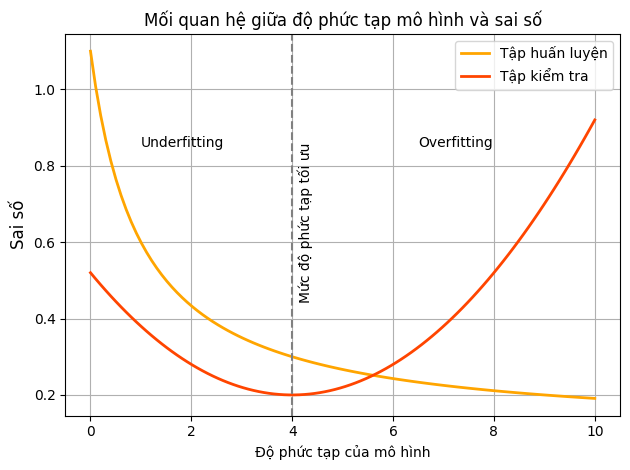

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Tạo trục độ phức tạp mô hình
complexity = np.linspace(0, 10, 100)

# Hàm sai số (mô phỏng) cho tập huấn luyện và tập kiểm tra
error_train = 1 / (complexity + 1) + 0.1
error_test = (complexity - 4) ** 2 / 50 + 0.2

# Vẽ đồ thị
plt.plot(complexity, error_train, label='Tập huấn luyện', color='orange', linewidth=2)
plt.plot(complexity, error_test, label='Tập kiểm tra', color='orangered', linewidth=2)

# Đường thẳng biểu thị điểm phù hợp tốt nhất
plt.axvline(x=4, color='gray', linestyle='--')
plt.text(4.1, 0.65, 'Mức độ phức tạp tối ưu', rotation=90, verticalalignment='center')

# Ghi chú vùng Underfitting và Overfitting
plt.text(1, 0.85, 'Underfitting')
plt.text(6.5, 0.85, 'Overfitting')

# Cài đặt trục và nhãn
plt.xlabel('Độ phức tạp của mô hình')
plt.ylabel('Sai số', fontsize=12)
plt.title('Mối quan hệ giữa độ phức tạp mô hình và sai số')
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()

Biểu đồ trên minh họa mối quan hệ giữa độ phức tạp của mô hình và sai số khi tính trên hai tập dữ liệu: tập dữ liệu huấn luyện và tập dữ liệu kiểm tra mô hình:

- Khi độ phức tạp của mô hình thấp, tương ứng với miền bên trái của đồ thị, cả tập dữ liệu huấn luyện và kiểm tra đều có sai số cao, đây hiện tượng underfitting.
- Khi độ phức tạp của mô hình quá cao, tương ứng với miền bên phải của đồ thị, sai số trên tập dữ liệu huấn luyện tiếp tục giảm, nhưng sai số trên tập kiểm tra lại tăng mạnh, đây là hiện tượng overfitting.

Có một điểm "vừa đủ" – được gọi là mức độ phù hợp tốt nhất – nơi sai số trên tập kiểm tra là thấp nhất. Đây là điểm mà mô hình tổng quát hóa tốt nhất sang dữ liệu mới - cũng là mức độ phức tạp mà những người xây dựng mô hình cần tìm ra.

### Mối quan hệ giữa độ phức tạp của mô hình và kích thước tập dữ liệu
<hr>

Một yếu tố quan trọng cần lưu ý trong quá trình xây dựng mô hình học máy là mối quan hệ giữa độ phức tạp của mô hình và mức độ đa dạng của dữ liệu huấn luyện. Cụ thể, tập dữ liệu càng chứa nhiều điểm dữ liệu đa dạng, thì ta càng có thể cho phép sử dụng mô hình có độ phức tạp cao hơn mà không dẫn đến hiện tượng khớp quá mức. Ngược lại, với các tập dữ liệu nhỏ hoặc đồng nhất, các mô hình phức tạp rất dễ học thuộc dữ liệu thay vì học ra các quy luật tổng quát.

Trên thực tế, việc tăng kích thước và mức độ đa dạng của tập dữ liệu huấn luyện thường là một chiến lược hiệu quả hơn so với việc cố gắng tinh chỉnh các tham số của mô hình. Tuy nhiên, điều này chỉ đúng nếu dữ liệu thu thập thêm thực sự mang lại thông tin mới. Việc nhân bản các quan sát đã có hoặc thu thập thêm dữ liệu lặp lại cùng một mẫu không làm tăng tính tổng quát, và do đó không cải thiện hiệu quả mô hình.

Quay lại ví dụ về dự đoán hành vi mua du thuyền, nếu quy tắc “khách hàng trên 45 tuổi và có ít hơn 3 người con hoặc chưa ly hôn thì có khả năng mua thuyền” được kiểm chứng trên 10.000 quan sát bổ sung và tiếp tục thể hiện hiệu quả, thì rõ ràng mức độ tin cậy vào quy tắc này sẽ cao hơn nhiều so với khi nó chỉ được rút ra từ 12 quan sát ban đầu.

Như vậy, việc có thêm dữ liệu huấn luyện chất lượng sẽ giúp cho các mô hình học có giám sát phát huy đầy đủ tiềm năng. Trong phạm vi cuốn sách này, chúng ta sẽ tập trung vào việc xử lý các **tập dữ liệu có kích thước cố định**. Tuy nhiên, trong thực tiễn triển khai, người làm học máy có thể có khả năng kiểm soát quy trình thu thập dữ liệu, và việc ưu tiên mở rộng tập dữ liệu đúng cách đôi khi đem lại hiệu quả cao hơn nhiều so với việc chỉ tối ưu hóa thuật toán.

## Các thuật toán học máy có giám sát
<hr>

Trong phần tiếp theo của chương, chúng ta sẽ nghiên cứu một số thuật toán học máy có giám sát phổ biến nhất và giải thích cách thức mà các thuật toán này học từ dữ liệu cũng như đưa ra dự đoán. Đồng thời, chúng ta cũng sẽ phân tích cách mà khái niệm độ phức tạp mô hình được thể hiện trong từng loại mô hình, qua đó cung cấp một cái nhìn tổng quan về cách thức xây dựng mô hình của từng thuật toán.

Bên cạnh đó, chúng ta sẽ xem xét ưu điểm và hạn chế của từng thuật toán, cũng như loại dữ liệu và bài toán mà mỗi thuật toán phù hợp nhất. Để hỗ trợ quá trình triển khai thực tế, chương này cũng sẽ trình bày các tham số và lựa chọn cấu hình quan trọng nhất cần quan tâm khi huấn luyện các mô hình học máy.

Nhiều thuật toán học máy tồn tại dưới cả hai biến thể: phân loại và hồi quy. Trong chương này, chúng ta sẽ trình bày đầy đủ cả hai trường hợp, khi có thể.

Mặc dù không bắt buộc phải ghi nhớ toàn bộ chi tiết của từng thuật toán, việc hiểu cơ chế hoạt động của các mô hình sẽ giúp người học phát triển một trực giác tốt hơn về cách mà các thuật toán học máy tiếp cận bài toán học từ dữ liệu. Chương này cũng có thể được sử dụng như một tài liệu tham khảo tra cứu, để bạn có thể quay lại bất cứ khi nào cần làm rõ cách hoạt động hoặc cấu hình của một thuật toán cụ thể.

### Một số dữ liệu mẫu
<hr>

Trong chương này, chúng ta sẽ sử dụng nhiều tập dữ liệu khác nhau nhằm minh họa cho các thuật toán học máy có giám sát. Một số tập dữ liệu sẽ có kích thước nhỏ, với mục đích làm nổi bật những khía cạnh cụ thể của từng thuật toán. Các tập dữ liệu còn lại sẽ là các ví dụ có kích thước lớn hơn, lấy từ các tình huống thực tế trong thế giới thực.

Một ví dụ của tập dữ liệu phân loại nhị phân là tập dữ liệu được mô tả trong hình minh họa phía dưới. Tập dữ liệu này có một biến mục tiêu `Y` dạng nhị phân, cùng với hai đặc trưng đầu vào là `X1` và `X2`. Tập dữ liệu đã được lưu trong tệp `ml_example_1.csv`:

In [2]:
import pandas as pd
import numpy as np
import mglearn
import warnings
warnings.filterwarnings("ignore")

In [3]:
# load dữ liệu
df = pd.read_csv("data/ml_example_1.csv")
print("df.shape: {}".format(df.shape))

df.shape: (26, 3)


Text(0, 0.5, 'X2')

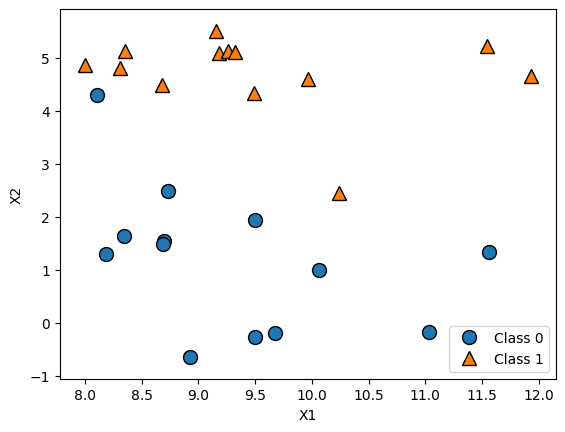

In [4]:
# plot dataset
mglearn.discrete_scatter(df["X1"], df["X2"], df["Y"])
plt.legend(["Class 0", "Class 1"], loc=4)
plt.xlabel("X1")
plt.ylabel("X2")

Như bạn có thể thấy từ `df.shape`, tập dữ liệu này bao gồm 26 điểm dữ liệu, với 2 đặc trưng có tên là `X1` và `X2` và một biến mục tiêu có tên là `Y`. Hình vẽ trên trực quan hóa toàn bộ điểm dữ liệu trong tập này, trong đó:

- Trục hoành thể hiện giá trị của đặc trưng `X1`,
- Trục tung thể hiện giá trị của đặc trưng `X2`,
- Mỗi điểm dữ liệu được biểu diễn bằng một dấu chấm hoặc một hình tam giác.
- Màu sắc và/hoặc hình dạng của dấu chấm phản ánh nhãn của biến `Y` tương ứng.

Đây là một biểu đồ phân tán giúp trực quan hóa các tập dữ liệu hai chiều, đặc biệt hữu ích trong việc quan sát khả năng phân tách các lớp trong biến mục tiêu kiểu phân loại.

Một dữ liệu sử dụng để minh họa các thuật toán hồi quy là tập dữ liệu trong file `ml_example_2.csv`. Tập dữ liệu có duy nhất một đặc trưng đầu vào là biến liên tục `X` và một biến mục tiêu liên tục `Y` mà chúng ta muốn mô hình hóa. Biểu đồ phân tán phía dưới mô tả biến đặc trưng và biến mục tiêu:

In [5]:
df = pd.read_csv("data/ml_example_2.csv")
print("df.shape: {}".format(df.shape))

df.shape: (40, 3)


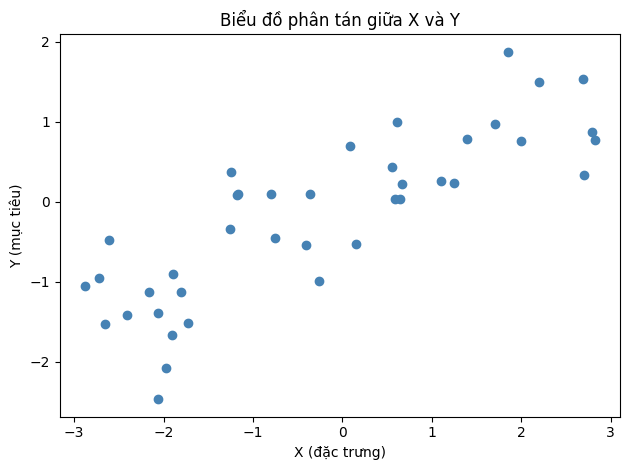

In [6]:
# Vẽ biểu đồ phân tán
plt.plot(df["X"], df["Y"], 'o',color='steelblue')   
plt.xlabel("X (đặc trưng)")
plt.ylabel("Y (mục tiêu)") 
plt.title("Biểu đồ phân tán giữa X và Y")
plt.tight_layout()
plt.show()

Trong các phần minh họa về các thuật toán học máy có giám sát, chúng ta sẽ sử dụng các tập dữ liệu đơn giản với số lượng đặc trưng thấp, chẳng hạn như hai dữ liệu đề cập ở trên. Lựa chọn này chủ yếu nhằm mục đích trực quan hóa dữ liệu một cách dễ dàng: bạn đọc có thể quan sát dữ liệu trong không gian hai chiều và từ đó hình dung được hình dạng phân bố của dữ liệu cũng như mối quan hệ giữa các đặc trưng đầu vào và biến mục tiêu. Những ví dụ như vậy có giá trị trong việc hỗ trợ quá trình xây dựng trực giác ban đầu về cách hoạt động của các mô hình học máy trong không gian ít chiều, trước khi áp dụng chúng vào các môi trường dữ liệu phức tạp hơn và có số chiều cao hơn.

Tuy nhiên, cần lưu ý rằng trực giác rút ra từ các tập dữ liệu có số chiều thấp không phải lúc nào cũng còn phù hợp hoặc giữ nguyên ý nghĩa khi áp dụng cho các bài toán thực tế với dữ liệu có số lượng đặc trưng lớn hơn. Do đó, khi mở rộng từ minh họa đơn giản sang ứng dụng thực tế, người học cần có sự thận trọng trong việc tổng quát hóa những quan sát ban đầu.

Bên cạnh các tập dữ liệu tổng hợp nhỏ được sử dụng để minh họa trực giác mô hình, chúng ta cũng sẽ bổ sung thêm hai tập dữ liệu thực tế được tích hợp sẵn trong thư viện scikit-learn. Một trong số đó là tập dữ liệu Ung thư vú Wisconsin, thường được gọi tắt là cancer dataset, một tập dữ liệu y sinh học nổi tiếng trong lĩnh vực học máy. Tập dữ liệu này ghi lại các chỉ số lâm sàng định lượng của mô u, được thu thập từ hình ảnh sinh thiết. Mỗi quan sát tương ứng với một khối u và được gán nhãn:

- Lành tính, giá trị `benign`, nghĩa là mô không phải ung thư.
- Ác tính, giá trị `malignant`, nghĩa là mô ung thư.

Nhiệm vụ học máy trong trường hợp này là xây dựng một mô hình có khả năng dự đoán bản chất của khối u là ác tính hay lành tính dựa trên các đặc trưng đo lường thu thập được từ hình ảnh mô học. Dữ liệu này có thể được load trực tiếp bằng hàm `load_breast_cancer` từ gói `sklearn.datasets` như sau:

In [7]:
from sklearn.datasets import load_breast_cancer

# Load dữ liệu
cancer = load_breast_cancer()

Tập dữ liệu bao gồm 569 điểm dữ liệu, mỗi điểm có 30 đặc trưng:

In [8]:
print("Shape of cancer data: {}".format(cancer.data.shape))

Shape of cancer data: (569, 30)


Trong số 569 điểm dữ liệu này, 212 được dán nhãn là ác tính và 357 là lành tính:

In [9]:
print("Sample counts per class:\n{}".format(
 {n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))}))

Sample counts per class:
{np.str_('malignant'): np.int64(212), np.str_('benign'): np.int64(357)}


Để có được mô tả về ý nghĩa ngữ nghĩa của từng đặc trưng, chúng ta có thể xem thuộc tính `feature_names`:

In [10]:
print("Feature names:\n{}".format(cancer.feature_names))

Feature names:
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


Bạn đọc có thể tìm hiểu thêm về dữ liệu bằng cách đọc `cancer.DESCR` nếu bạn quan tâm.

Để mô tả cho các thuật toán hồi quy, chúng ta cũng sẽ sử dụng thêm một tập dữ liệu trong thế giới thực, đó là tập dữ liệu giá nhà ở Boston, hay Boston Housing Dataset. Đây là một tập dữ liệu kinh điển thường được sử dụng để minh họa các mô hình hồi quy trong học máy. Nhiệm vụ đặt ra đối với tập dữ liệu này là dự đoán giá trị trung vị của các ngôi nhà, tính theo đơn vị nghìn USD, tại các khu phố khác nhau ở thành phố Boston trong những năm 1970. Việc dự đoán này dựa trên nhiều yếu tố đầu vào, bao gồm:

- Tỷ lệ tội phạm trong khu vực
- Vị trí của ngôi nhà so với sông Charles
- Mức độ tiếp cận với các tuyến đường cao tốc chính, v.v.

Tập dữ liệu bao gồm 506 quan sát, mỗi quan sát tương ứng với một khu dân cư, và được mô tả bởi 13 đặc trưng đầu vào. Biến mục tiêu là giá trị trung vị của nhà ở trong khu vực tương ứng. Lưu ý rằng, mặc dù tập dữ liệu này vẫn thường được sử dụng cho mục đích học tập, song trong các ứng dụng hiện đại, dữ liệu nhà ở Boston đã được rút khỏi scikit-learn kể từ phiên bản 1.2 do các vấn đề đạo đức và thiếu thông tin giải thích rõ ràng. Do không thể gọi trực tiếp từ sklearn, chúng tôi lưu dữ liệu dưới định dạng file `.csv`

In [11]:
# load dữ liệu
df = pd.read_csv("data/Boston.csv")
df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


Mỗi mẫu trong 506 điểm dữ liệu là một vùng tại Boston, với biến mục tiêu `medv` là trung vị của giá nhà trong vùng đó. Dữ liệu có 13 đặc trưng, trong đó có những đặc trung quan trọng có tác động đến giá nhà như số lượng phòng trung bình `rm`:

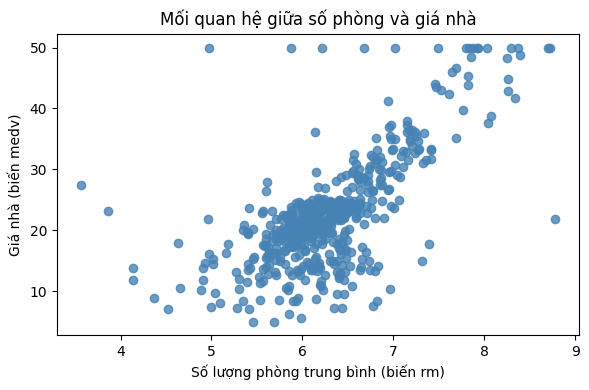

In [12]:
plt.figure(figsize=(6, 4))
plt.scatter(df["rm"], df["medv"], color='steelblue', alpha=0.8)
plt.xlabel("Số lượng phòng trung bình (biến rm)")
plt.ylabel("Giá nhà (biến medv)")
plt.title("Mối quan hệ giữa số phòng và giá nhà")
plt.tight_layout()
plt.show()

Các tập dữ liệu đã được giới thiệu sẽ được sử dụng xuyên suốt để giải thích và minh họa các đặc điểm của nhiều thuật toán học máy khác nhau. Thông qua việc áp dụng trực tiếp các thuật toán lên những tập dữ liệu cụ thể, người học có thể quan sát hành vi của mô hình, hiểu rõ cách mô hình phản ứng với cấu trúc dữ liệu, cũng như đánh giá hiệu quả dự báo trong từng tình huống.

Tuy nhiên, trước khi đi sâu vào các ví dụ ứng dụng, chúng ta sẽ bắt đầu với phần trọng tâm của chương này: tìm hiểu chi tiết các thuật toán học máy có giám sát. Thuật toán đầu tiên mà chúng ta xem xét là thuật toán k-láng giềng gần nhất (k-Nearest Neighbors – KNN), một phương pháp trực quan và dễ hiểu đã được giới thiệu sơ lược trong chương trước. Trong phần tiếp theo, chúng ta sẽ ôn lại nguyên lý hoạt động của k-NN và khám phá cách thức thuật toán này học từ dữ liệu và đưa ra dự đoán.

### K-láng giềng gần nhất
<hr>

Thuật toán k-láng giềng gần nhất được xem là một trong những thuật toán học máy đơn giản và trực quan nhất. Quá trình xây dựng mô hình trong KNN không bao gồm bước huấn luyện theo nghĩa truyền thống, mà đơn giản chỉ là lưu trữ toàn bộ tập dữ liệu huấn luyện.

Khi cần dự đoán đầu ra cho một điểm dữ liệu mới, thuật toán sẽ thực hiện phép đo khoảng cách giữa điểm mới và tất cả các điểm trong tập huấn luyện, sau đó xác định k điểm gần nhất – được gọi là “k láng giềng gần nhất”. Dự đoán được đưa ra dựa trên giá trị đầu ra của các láng giềng này:
- Trong bài toán phân loại: thuật toán chọn lớp phổ biến nhất trong số k láng giềng.
- Trong bài toán hồi quy: thuật toán sử dụng trung bình (hoặc trung vị) của giá trị đầu ra của các láng giềng để dự đoán.

Vì không có quá trình huấn luyện mô hình thực thụ, KNN còn được gọi là một thuật toán phi tham số. Việc dự đoán phụ thuộc hoàn toàn vào khoảng cách trong không gian các biến đặc trưng, do đó hiệu quả của mô hình chịu ảnh hưởng mạnh bởi:
- Hình dạng và tỷ lệ các đặc trưng.
- Giá trị của tham số k, hay số lượng láng giềng.

#### K-láng giềng gần nhất và bài toán phân loại
<hr>

Trong phiên bản đơn giản nhất, thuật toán k-láng giềng gần nhất xét đến duy nhất một láng giềng gần nhất, tức là với k = 1. Trong trường hợp này, quá trình dự đoán cho một điểm dữ liệu mới được thực hiện bằng cách tìm điểm trong tập huấn luyện có khoảng cách ngắn nhất đến điểm cần dự đoán, và sau đó sử dụng nhãn của điểm gần nhất đó làm dự đoán cho điểm mới.

Đây là một chiến lược suy luận cực kỳ trực tiếp: giả định rằng một điểm dữ liệu mới có khả năng thuộc cùng lớp với điểm dữ liệu gần nhất trong quá khứ. Trong ngữ cảnh phân loại, điều này có nghĩa là dự đoán lớp của một điểm dữ liệu mới hoàn toàn phụ thuộc vào lớp của một quan sát gần nhất trong không gian đặc trưng.

Hình vẽ dưới đây minh họa nguyên lý này trong trường hợp bài toán phân loại nhị phân trên tập dữ liệu `example_1`. Mỗi điểm dữ liệu được biểu diễn dưới dạng tọa độ trong không gian hai chiều, và một điểm mới cần phân loại sẽ được gán nhãn dựa trên nhãn của điểm huấn luyện gần nhất với nó. Ranh giới quyết định trong trường hợp k = 1 thường có hình dạng phức tạp và rất nhạy cảm với nhiễu trong dữ liệu.

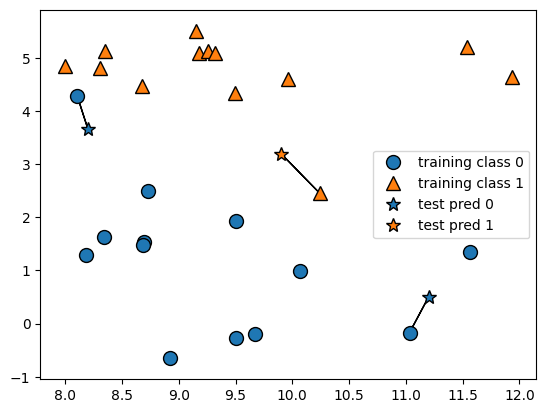

In [13]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

Trong ví dụ minh họa, chúng ta đã thêm ba điểm dữ liệu mới vào không gian đặc trưng, được biểu diễn bằng các ký hiệu ngôi sao. Đối với mỗi điểm mới này, láng giềng gần nhất trong tập huấn luyện được xác định và đánh dấu bằng dấu thập, với màu sắc biểu thị nhãn. Khi áp dụng thuật toán k-láng giềng gần nhất với k = 1, nhãn dự đoán cho mỗi điểm kiểm tra chính là nhãn của duy nhất một điểm huấn luyện gần nhất, và như vậy kết quả hoàn toàn phụ thuộc vào láng giềng đơn lẻ này.

Tuy nhiên, thay vì chỉ xét một điểm gần nhất, chúng ta có thể mở rộng thuật toán để xét nhiều láng giềng hơn, tức là với giá trị k lớn hơn 1. Đây cũng chính là nguồn gốc tên gọi của thuật toán: k-láng giềng gần nhất. Trong trường hợp tổng quát, để dự đoán nhãn cho một điểm kiểm tra, thuật toán sẽ:
- Xác định k điểm gần nhất trong tập huấn luyện;
- Đếm số lượng các điểm thuộc từng lớp trong số đó;
- Gán nhãn là lớp chiếm đa số trong k láng giềng (sử dụng nguyên tắc bỏ phiếu đa số).

Ví dụ trong hình phía dưới minh họa trường hợp sử dụng ba láng giềng gần nhất (k = 3). Với mỗi điểm cần dự đoán, thuật toán sẽ xác định ba điểm gần nhất trong không gian đặc trưng, đếm số lượng điểm thuộc mỗi lớp, và gán nhãn tương ứng với lớp phổ biến hơn trong nhóm ba điểm này.

Việc tăng số lượng láng giềng thường giúp giảm nhạy cảm của mô hình đối với nhiễu và các điểm ngoại lai trong dữ liệu, nhưng cũng đồng thời làm cho ranh giới quyết định trở nên trơn mượt hơn và có thể dẫn đến mất đi một số chi tiết phân biệt quan trọng nếu k quá lớn.

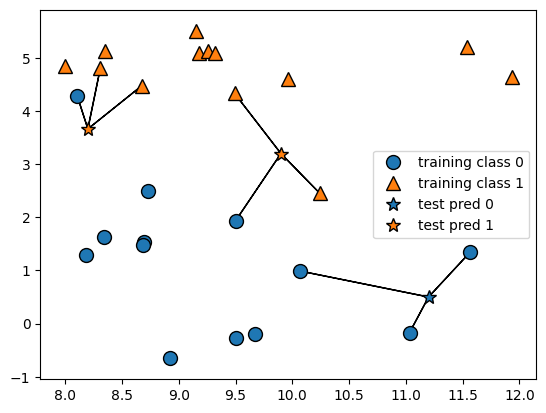

In [14]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

Trong minh họa trên, dự đoán đầu ra cho mỗi điểm kiểm tra được biểu diễn bằng màu sắc của điểm đó. Ta có thể quan sát rằng dự đoán đối với điểm dữ liệu mới nằm ở phía trên bên trái đã thay đổi, so với khi chỉ xét một láng giềng duy nhất. Điều này minh chứng cho tác động của việc lựa chọn giá trị k đến quyết định phân loại.

Mặc dù ví dụ đang minh họa một bài toán phân loại nhị phân, phương pháp k-láng giềng gần nhất hoàn toàn có thể được mở rộng để xử lý các bài toán phân loại đa lớp. Trong trường hợp này, quy trình vẫn giữ nguyên: thuật toán đếm số lượng láng giềng thuộc từng lớp trong k láng giềng gần nhất, và dự đoán lớp chiếm đa số.

Tiếp theo, chúng ta sẽ tìm hiểu cách áp dụng thuật toán k-láng giềng gần nhất bằng thư viện scikit-learn. Trước tiên, để có thể đánh giá khả năng tổng quát hóa của mô hình, chúng ta sẽ tiến hành chia dữ liệu thành hai tập:
- Tập huấn luyện (training set): dùng để xây dựng mô hình.
- Tập kiểm tra (test set): dùng để đánh giá hiệu suất dự đoán trên dữ liệu chưa từng thấy.

Quy trình tách tập dữ liệu thành hai phần này đã được trình bày chi tiết trong Chương 3.

In [15]:
from sklearn.model_selection import train_test_split

# Load dữ liệu
df = pd.read_csv("data/ml_example_1.csv")
X, y =  df[["X1","X2"]], df['Y']

# Phân chia dữ liệu
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
X_train.shape

(19, 2)

Tiếp theo, chúng ta tiến hành nhập và khởi tạo lớp mô hình từ thư viện `scikit-learn`. Đây là bước mà người dùng có thể cấu hình các tham số quan trọng của thuật toán trước khi mô hình được huấn luyện. Đối với thuật toán k-láng giềng gần nhất, một trong những siêu tham số then chốt là số lượng láng giềng (k) cần được xem xét trong quá trình dự đoán.

Trong ví dụ này, chúng ta lựa chọn giá trị k = 3, nghĩa là mô hình sẽ đưa ra dự đoán dựa trên ba điểm huấn luyện gần nhất với điểm kiểm tra trong không gian đặc trưng. Việc lựa chọn giá trị k ảnh hưởng trực tiếp đến ranh giới quyết định và khả năng tổng quát hóa của mô hình.

In [16]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

Sau khi khởi tạo mô hình, bước tiếp theo trong quy trình học máy có giám sát là huấn luyện mô hình trên tập dữ liệu huấn luyện. Đối với thuật toán k-láng giềng gần nhất, quá trình "huấn luyện" không bao gồm việc xây dựng một mô hình tham số như trong các thuật toán khác, mà đơn giản là lưu trữ toàn bộ tập huấn luyện.

Việc lưu trữ này cho phép mô hình có thể tính toán khoảng cách giữa các điểm kiểm tra và toàn bộ điểm huấn luyện khi thực hiện dự đoán. Vì vậy, trong scikit-learn, khi gọi phương thức `fit()` đối với đối tượng `KNeighborsClassifier`, dữ liệu huấn luyện sẽ được lưu nội bộ và sẵn sàng phục vụ cho việc tìm kiếm các láng giềng gần nhất trong các bước dự đoán tiếp theo.

In [17]:
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

Sau khi mô hình đã được khởi tạo và "huấn luyện", tức là đã lưu trữ tập dữ liệu huấn luyện, bước tiếp theo là đưa ra dự đoán đối với tập dữ liệu kiểm tra. Để thực hiện điều này trong `scikit-learn`, ta sử dụng phương thức `predict()`.

Cụ thể, đối với mỗi điểm dữ liệu trong tập kiểm tra, thuật toán sẽ:
- Tính khoảng cách từ điểm đó đến tất cả các điểm trong tập huấn luyện.
- Xác định k điểm gần nhất (tức là k láng giềng gần nhất).
- Thống kê nhãn lớp của k điểm này, và
- Gán nhãn phổ biến nhất trong số đó làm kết quả dự đoán.

Đây chính là cơ chế bỏ phiếu đa số, hay **majority vote**, trong phân loại bằng k-láng giềng gần nhất.

In [18]:
print("Test set predictions: {}".format(clf.predict(X_test)))

Test set predictions: [1 0 1 0 1 0 0]


Để đánh giá mức độ tổng quát hóa của mô hình, chúng ta có thể gọi phương thức `score` với dữ liệu kiểm tra cùng với nhãn kiểm tra:

In [19]:
print("Test set accuracy: {:.2f}".format(clf.score(X_test, y_test)))

Test set accuracy: 0.86


Chúng ta thấy rằng mô hình của mình có độ chính xác khoảng 86%, nghĩa là mô hình đã dự đoán đúng lớp cho 86% các mẫu trong tập dữ liệu kiểm tra. Với dữ liệu kiểm tra mô hình nhỏ, chúng ta có thể dễ dàng quan sát giá trị thực tế và giá trị dự đoán:

In [20]:
pd.DataFrame({"Thực tế": y_test, "Dự đoán": clf.predict(X_test)})

,Thực tế,Dự đoán
2,1,1
20,0,0
14,1,1
17,0,0
5,1,1
11,1,0
22,0,0


#### Phân tích KNeighborsClassifier
<hr>

Đối với các tập dữ liệu hai chiều, chúng ta có thể trực quan hóa dự đoán của mô hình trên toàn bộ không gian đặc trưng bằng cách biểu diễn kết quả phân loại cho mọi điểm khả dĩ trong mặt phẳng (X1,X2). Cụ thể, toàn bộ mặt phẳng được chia thành một lưới điểm, và mô hình được sử dụng để dự đoán nhãn lớp cho từng điểm trên lưới này.

Sau đó, các vùng trong mặt phẳng được tô màu theo nhãn lớp mà mô hình gán cho từng điểm, từ đó tạo thành một biểu diễn trực quan của ranh giới quyết định (decision boundary) – tức là đường phân chia không gian giữa các vùng mà mô hình dự đoán thuộc về các lớp khác nhau. Trong trường hợp phân loại nhị phân, ranh giới này cho thấy nơi thuật toán chuyển từ gán nhãn lớp 0 sang lớp 1 và ngược lại.

Đoạn câu lệnh dưới đây tạo ra các biểu đồ trực quan thể hiện ranh giới quyết định khi áp dụng thuật toán k-láng giềng gần nhất với ba giá trị khác nhau của tham số k: 1, 3 và 9. Các kết quả này được trình bày trong Hình 2–6, giúp người đọc dễ dàng so sánh ảnh hưởng của việc thay đổi độ phức tạp mô hình đến hình dạng của ranh giới phân loại.

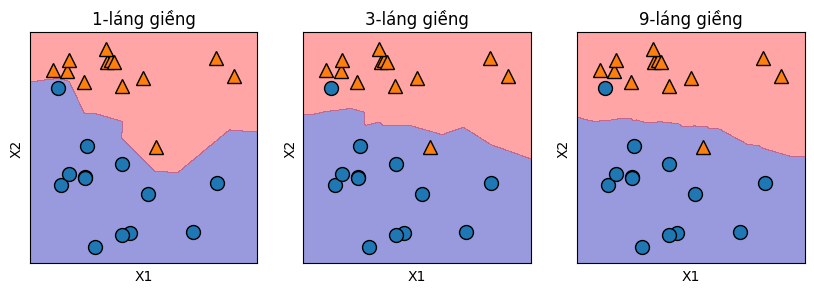

In [21]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3))
X_np = X.values

for n_neighbors, ax in zip([1, 3, 9], axes):
 # phương thức fit trả về đối tượng self, vì vậy chúng ta có thể khởi tạo
 # và fit trong một dòng
 clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
 mglearn.plots.plot_2d_separator(clf, X_np, fill=True, eps=0.5, ax=ax, alpha=.4)
 mglearn.discrete_scatter(X_np[:, 0], X_np[:, 1], y, ax=ax)
 ax.set_title("{}-láng giềng".format(n_neighbors))
 ax.set_xlabel("X1")
 ax.set_ylabel("X2")
#axes[0].legend(loc=3)

Như có thể quan sát trong hình minh họa bên trái, việc sử dụng một láng giềng duy nhất (k = 1) trong thuật toán k-láng giềng gần nhất dẫn đến một đường biên giới quyết định có hình dạng phức tạp, uốn lượn theo sát dữ liệu huấn luyện. Ngược lại, khi tăng số lượng láng giềng được xem xét, đường biên giới quyết định trở nên mượt mà hơn và ổn định hơn, phản ánh một mô hình có độ phức tạp thấp hơn.

Nói cách khác, giá trị nhỏ của tham số k tương ứng với mô hình có độ phức tạp cao, trong khi giá trị lớn của k tương ứng với mô hình đơn giản hơn. Điều này phù hợp với những gì chúng ta đã thảo luận: độ phức tạp mô hình cần được xem xét trong mối quan hệ với khả năng tổng quát hóa.

Trong trường hợp nếu `k` được đặt bằng với tổng số mẫu trong tập huấn luyện, thì mỗi điểm dữ liệu kiểm tra sẽ có toàn bộ tập huấn luyện làm láng giềng. Khi đó, mô hình sẽ luôn dự đoán lớp phổ biến nhất trong tập huấn luyện, bất kể đầu vào là gì – dẫn đến một mô hình có độ phức tạp thấp nhất nhưng cũng không có khả năng phân biệt.

Để kiểm nghiệm mối quan hệ giữa độ phức tạp mô hình và hiệu suất tổng quát hóa, chúng ta sẽ áp dụng thuật toán k-láng giềng gần nhất lên một tập dữ liệu thực tế – cụ thể là tập dữ liệu `breast_cancer`. Bước đầu tiên là chia tập dữ liệu thành hai phần: tập huấn luyện và tập kiểm tra. Sau đó, chúng ta huấn luyện mô hình với các giá trị khác nhau của tham số k, và đánh giá hiệu suất của mô hình trên cả hai tập. Kết quả thu được sẽ giúp chúng ta quan sát trực tiếp ảnh hưởng của độ phức tạp mô hình đến khả năng tổng quát hóa dữ liệu:

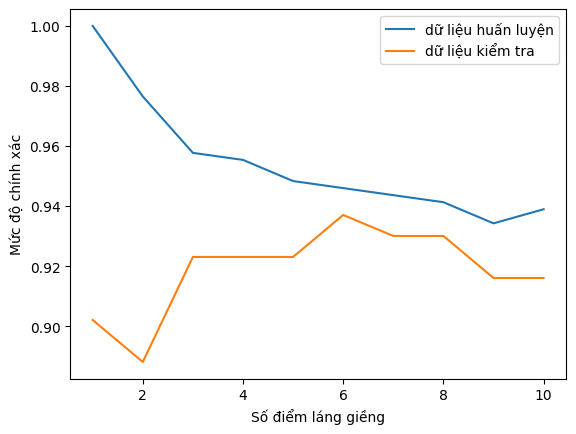

In [22]:
from sklearn.datasets import load_breast_cancer

# Load dữ liệu
cancer = load_breast_cancer()

# Chia dữ liệu thành train-test 70-30
X_train, X_test, y_train, y_test = train_test_split(
 cancer.data, cancer.target, stratify=cancer.target, random_state=66)

training_accuracy = []
test_accuracy = []

# thử n_neighbors từ 1 đến 10
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
 # xây dựng mô hình
 clf = KNeighborsClassifier(n_neighbors=n_neighbors)
 clf.fit(X_train, y_train)
 # ghi lại độ chính xác của tập huấn luyện
 training_accuracy.append(clf.score(X_train, y_train))
 # ghi lại độ chính xác tổng quát hóa
 test_accuracy.append(clf.score(X_test, y_test))

plt.plot(neighbors_settings, training_accuracy, label="dữ liệu huấn luyện")
plt.plot(neighbors_settings, test_accuracy, label="dữ liệu kiểm tra")
plt.ylabel("Mức độ chính xác")
plt.xlabel("Số điểm láng giềng")
plt.legend()

Hình vẽ trên minh họa độ chính xác của mô hình trên tập huấn luyện và kiểm tra tương ứng với từng giá trị k. Trục tung của đồ thị biểu thị độ chính xác và trục hoành của đồ thi thể hiện giá trị của tham số k. Mặc dù biểu đồ không hoàn toàn trơn tru, nhưng chúng ta vẫn có thể nhận diện rõ các đặc điểm điển hình của hiện tượng khớp quá mức và underfitting.

Cần lưu ý rằng do số lượng láng giềng càng ít tương ứng với mô hình càng phức tạp. Khi chỉ xét một láng giềng gần nhất (k = 1), mô hình đạt độ chính xác hoàn hảo trên tập huấn luyện, cho thấy mô hình đã ghi nhớ toàn bộ dữ liệu. Tuy nhiên, độ chính xác trên tập kiểm tra lại thấp hơn đáng kể, phản ánh hiện tượng khớp quá mức – mô hình đã học quá chi tiết dữ liệu huấn luyện và không tổng quát hóa tốt cho dữ liệu mới.

Khi tăng `k`, mô hình trở nên đơn giản hơn, dẫn đến độ chính xác trên tập huấn luyện giảm dần. Tuy nhiên, hiệu suất trên tập kiểm tra lại tăng lên, cho thấy khả năng tổng quát hóa được cải thiện. Mức hiệu suất cao nhất đạt được ở khoảng giá trị k = 6, tại đó mô hình đạt sự cân bằng tốt nhất giữa độ chính xác và khả năng tổng quát hóa. Nếu tiếp tục tăng số lượng láng giềng, chẳng hạn đến k = 10, mô hình trở nên quá đơn giản, không còn đủ linh hoạt để nắm bắt các đặc điểm quan trọng trong dữ liệu. Khi đó, hiệu suất trên cả hai tập đều giảm, phản ánh hiện tượng underfitting.

Tuy nhiên, cần lưu ý rằng ngay cả trong các trường hợp có hiệu suất thấp nhất, độ chính xác trên dữ liệu vẫn xấp xỉ 88%, một con số tương đối cao và có thể chấp nhận được trong nhiều ứng dụng thực tế.

#### k-láng giềng gần nhất và bài toán hồi quy
<hr>

Thuật toán k-láng giềng gần nhất không chỉ áp dụng cho các bài toán phân loại, mà còn có một biến thể dành cho bài toán hồi quy. Trong trường hợp này, thay vì dự đoán nhãn lớp, thuật toán sẽ dự đoán một giá trị số liên tục. Để minh họa, ta sử dụng biến thể hồi quy của thuật toán KNN trên tập dữ liệu `ML_example_2.csv`. Như trước đây, chúng ta bắt đầu với cấu hình đơn giản nhất là sử dụng một láng giềng gần nhất (k = 1). Trong ví dụ này, ba điểm dữ liệu kiểm tra mới được thêm vào và được biểu diễn dưới dạng các ngôi sao màu xanh lá cây nằm trên trục x.

Với k = 1, dự đoán cho mỗi điểm kiểm tra chính là giá trị của biến mục tiêu của điểm dữ liệu huấn luyện gần nhất. Các giá trị dự đoán tương ứng này được thể hiện bằng các ngôi sao màu xanh lam. Thông qua hình ảnh minh họa phía dưới, có thể thấy rõ bản chất "cục bộ" của thuật toán KNN hồi quy: dự đoán tại một điểm hoàn toàn phụ thuộc vào các điểm lân cận mà không có giả định toàn cục nào về mối liên hệ giữa đặc trưng với biến mục tiêu.

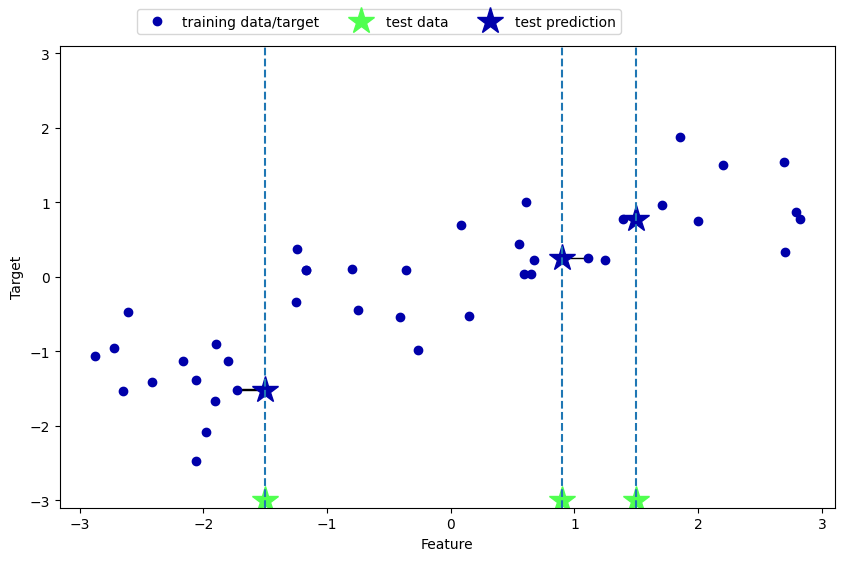

In [23]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

Tương tự như trong bài toán phân loại, thuật toán k-láng giềng gần nhất cũng cho phép sử dụng nhiều hơn một láng giềng khi áp dụng cho các bài toán hồi quy. Khi tăng số lượng láng giềng được xét đến, dự đoán đầu ra không còn là giá trị của một điểm duy nhất, mà là giá trị trung bình hoặc trung vị của các đầu ra tương ứng với k điểm huấn luyện gần nhất.

Việc sử dụng nhiều láng giềng có thể giúp làm giảm tác động của nhiễu và các điểm ngoại lai, đồng thời tạo ra một mô hình hồi quy có đặc tính mượt mà hơn so với khi chỉ dùng một láng giềng duy nhất. Tuy nhiên, cũng như trong phân loại, nếu số lượng láng giềng được chọn quá lớn, mô hình sẽ trở nên quá đơn giản và có thể mất khả năng phản ánh các đặc trưng cục bộ quan trọng trong dữ liệu.

Hình phía dưới minh họa các dự đoán thu được khi sử dụng 3 láng giềng gần nhất trong bài toán hồi quy một chiều. Các giá trị dự đoán đường dự đoán trở nên ít biến động hơn, phản ánh sự ảnh hưởng trung bình từ nhiều điểm dữ liệu xung quanh điểm dữ liệu kiểm tra.

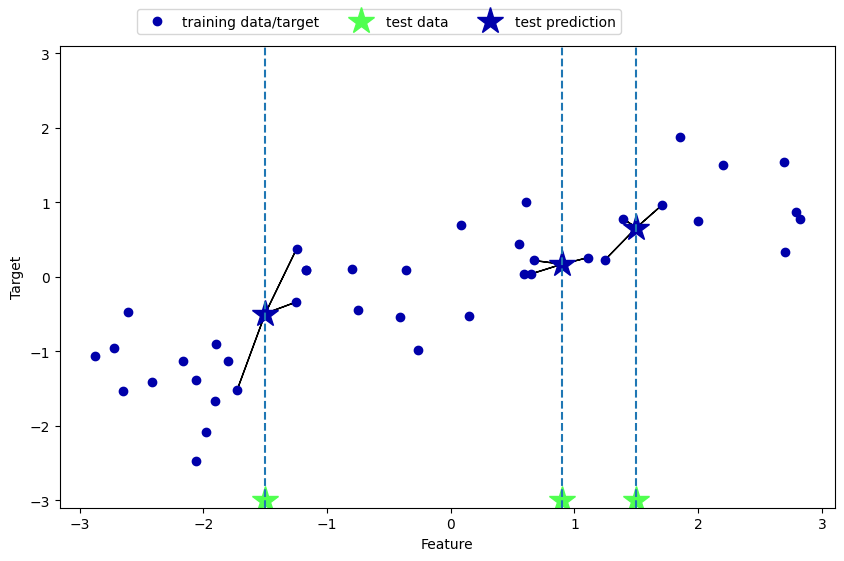

In [24]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

Thuật toán k-láng giềng gần nhất trong bài toán hồi quy được thực thi bằng lớp `KNeighborsRegressor` thuộc thư viện scikit-learn. Lớp này có cơ chế hoạt động và giao diện sử dụng tương tự như lớp `KNeighborsClassifier` được dùng trong các bài toán phân loại.

In [25]:
from sklearn.neighbors import KNeighborsRegressor

# Load dữ liệu
df = pd.read_csv("data/ml_example_2.csv")
X, y =  df[["X"]], df['Y']

# Phân chia dữ liệu
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Khởi tạo mô hình và đặt số lượng láng giềng cần xem xét thành 3
reg = KNeighborsRegressor(n_neighbors=3)

# Điều chỉnh mô hình bằng cách sử dụng dữ liệu huấn luyện và mục tiêu huấn luyện
reg.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

Bây giờ chúng ta có thể đưa ra dự đoán trên tập kiểm tra:

In [26]:
y_pred = reg.predict(X_test)
print("Test set predictions:\n{}".format(y_pred))

Test set predictions:
[-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


Đồ thị dưới đây mô tả mối liên hệ giữa các giá trị thực tế của biến mục tiêu và giá trị dự toán bằng KNN với k = 3:

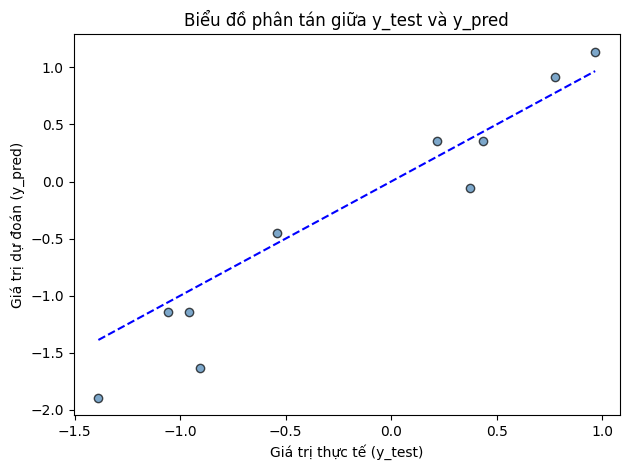

In [27]:
plt.scatter(y_test, y_pred, alpha=0.7, color='steelblue', edgecolor='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'b--')  # Đường lý tưởng
plt.xlabel("Giá trị thực tế (y_test)")
plt.ylabel("Giá trị dự đoán (y_pred)")
plt.title("Biểu đồ phân tán giữa y_test và y_pred")
plt.tight_layout()
plt.show()

Để đánh giá hiệu suất của một mô hình hồi quy trong scikit-learn, chúng ta có thể sử dụng phương thức `score()`. Khi áp dụng cho các mô hình hồi quy, phương thức này trả về một giá trị gọi là R-squared, hay còn được biết đến với tên gọi đầy đủ là hệ số xác định.

R-squared là một thước đo phổ biến dùng để đánh giá mức độ phù hợp giữa giá trị dự đoán và giá trị thực tế trong mô hình hồi quy. Giá trị nằm trong khoảng từ 0 đến 1, với ý nghĩa như sau:
- Giá trị 1 biểu thị mô hình dự đoán hoàn hảo, tức là không có sai số nào giữa dự đoán và thực tế.
- Giá trị 0 biểu thị mô hình không dự đoán tốt hơn so với một mô hình hằng số đơn giản chỉ đưa ra giá trị trung bình của biến mục tiêu trong tập huấn luyện y_train.

R-squared càng gần 1 thì mô hình càng phù hợp với dữ liệu. Trong thực tế, một giá trị R-squared cao cho thấy mô hình có khả năng giải thích tốt phương sai trong dữ liệu, tuy nhiên cần lưu ý rằng R-squared không phản ánh khả năng tổng quát hóa nếu mô hình bị quá khớp.

In [28]:
print("Test set R-squared: {:.2f}".format(reg.score(X_test, y_test)))

Test set R-squared: 0.83


Ngoài R-squared, một thước đo phổ biến khác dùng để đánh giá hiệu suất của mô hình hồi quy là Root Mean Squared Error (RMSE) – tức Căn bậc hai của sai số bình phương trung bình. RMSE cho biết mức độ sai lệch trung bình giữa giá trị dự đoán và giá trị thực tế, tính theo đơn vị gốc của biến mục tiêu, giúp việc diễn giải dễ hiểu và trực quan hơn.

Công thức tính RMSE như sau:

```{math}
\begin{align}
RMSE = \sqrt{\cfrac{\sum\limits_{i=1}^n (y_i - \hat{y}_i)^2}{n}}
\end{align}
```

Trong đó: n là số lượng mẫu trong dữ liệu kiểm tra mô hình. Ý nghĩa của RMSE:

- RMSE càng nhỏ chứng tỏ mô hình dự đoán càng chính xác.
- RMSE = 0 nghĩa là mô hình dự đoán hoàn toàn chính xác các giá trị đầu ra.
- RMSE có thể so sánh giữa các mô hình khác nhau trên cùng một tập dữ liệu và biến mục tiêu, nhưng không nên dùng để so sánh giữa các bài toán có đơn vị đo lường khác nhau.

Một ưu điểm của RMSE so với R-squared là RMSE phản ánh trực tiếp độ lệch tuyệt đối trung bình của dự đoán, thay vì chỉ nói lên phần trăm phương sai được giải thích. Tuy nhiên, RMSE cũng nhạy cảm với các giá trị ngoại lai, do đó cần cân nhắc khi sử dụng trong dữ liệu có phân phối không chuẩn.

Trong thực hành, R-squared thường được sử dụng như một chỉ số tương đối để đánh giá mức độ phù hợp của mô hình, còn RMSE cung cấp một cái nhìn cụ thể hơn về mức độ sai số tuyệt đối trong dự đoán. Hai thước đo này nên được sử dụng bổ trợ lẫn nhau để có cái nhìn toàn diện hơn về hiệu suất của mô hình hồi quy. RMSE của mô hình KNN(k=3) được tính như sau:

In [29]:
from sklearn.metrics import root_mean_squared_error

# Tính RMSE
rmse = root_mean_squared_error(y_test, y_pred)
print("Test set RMSE: {:.2f}".format(rmse))

Test set RMSE: 0.33


#### Phân tích KNeighborsRegressor
<hr>

Trong trường hợp tập dữ liệu có một đặc trưng duy nhất, ta có thể trực tiếp quan sát hình dạng của hàm dự đoán trên toàn bộ miền giá trị của đặc trưng đầu vào. Cụ thể, ta có thể tạo ra một tập dữ liệu kiểm tra tổng hợp bằng cách sinh ra nhiều điểm đều nhau nằm trên một đoạn thẳng, tức là trên trục của đặc trưng duy nhất.

Việc này cho phép ta trực quan hóa cách mô hình hồi quy dự đoán giá trị mục tiêu tương ứng với từng giá trị của đặc trưng đầu vào. Thông qua biểu đồ này, ta có thể dễ dàng quan sát hàm hồi quy xấp xỉ được học bởi mô hình, từ đó đánh giá tính chất mượt mà, tính cục bộ và mức độ phản ứng của mô hình đối với thay đổi trong dữ liệu.

Hình phía dưới minh họa kết quả dự đoán của mô hình k-láng giềng gần nhất trên một tập dữ liệu hồi quy một chiều, trong đó đường biểu diễn thể hiện giá trị dự đoán đầu ra tương ứng với từng điểm trong miền giá trị của đặc trưng.

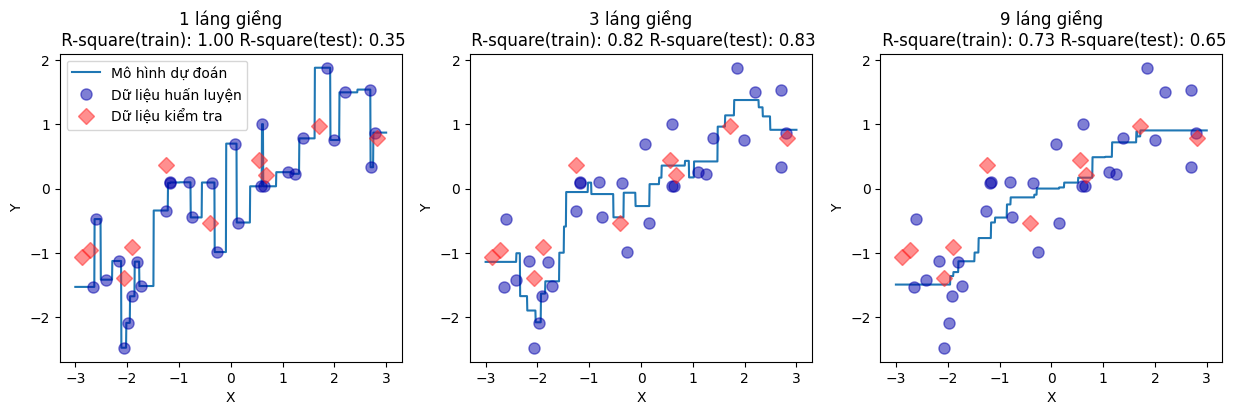

In [30]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
# tạo 1.000 điểm dữ liệu, cách đều nhau từ -3 đến 3
line = np.linspace(-3, 3, 1000).reshape(-1, 1)
for n_neighbors, ax in zip([1, 3, 9], axes):
 # đưa ra dự đoán bằng cách sử dụng 1, 3 hoặc 9 láng giềng
 reg = KNeighborsRegressor(n_neighbors=n_neighbors)
 reg.fit(X_train, y_train)
 ax.plot(line, reg.predict(line))
 ax.plot(X_train, y_train, 'o', c=mglearn.cm2(0), markersize=8, alpha = 0.5)
 ax.plot(X_test, y_test, 'D', c=mglearn.cm2(1), markersize=8, alpha = 0.5)

 ax.set_title(
 "{} láng giềng\n R-square(train): {:.2f} R-square(test): {:.2f}".format(
 n_neighbors, reg.score(X_train, y_train),
 reg.score(X_test, y_test)))
 ax.set_xlabel("X")
 ax.set_ylabel("Y")
axes[0].legend(["Mô hình dự đoán", "Dữ liệu huấn luyện",
 "Dữ liệu kiểm tra"], loc="best")

Quan sát từ đồ thị cho thấy rằng khi chỉ sử dụng một láng giềng gần nhất (k = 1), mỗi điểm trong tập huấn luyện có ảnh hưởng trực tiếp và rõ rệt đến các giá trị dự đoán. Đường hồi quy được tạo ra sẽ đi qua toàn bộ các điểm trong tập huấn luyện, phản ánh một mô hình có độ linh hoạt rất cao. Tuy nhiên, tính linh hoạt quá mức này cũng đồng nghĩa với việc mô hình trở nên rất nhạy cảm với nhiễu và biến động nhỏ trong dữ liệu, dẫn đến các dự đoán thiếu ổn định và khả năng tổng quát hóa kém.

Khi tăng số lượng láng giềng, ảnh hưởng của từng điểm dữ liệu riêng lẻ giảm xuống, và dự đoán trở nên mượt mà hơn. Mặc dù các đường dự đoán không còn đi qua tất cả các điểm trong tập huấn luyện, chúng có xu hướng phản ánh xu thế tổng thể của dữ liệu tốt hơn. Đây là hệ quả tự nhiên của quá trình lấy trung bình trong k-láng giềng hồi quy, vốn có tác dụng làm giảm phương sai nhưng có thể làm tăng sai số nếu k được chọn quá lớn.

#### Thảo luận về điểm mạnh, điểm yếu và tham số
<hr>

Về mặt nguyên lý, có hai tham số quan trọng cần quan tâm khi sử dụng mô hình `KNeighborsClassifier` hoặc `KNeighborsRegressor`. Tham số đầu tiên là số lượng láng giềng được xét đến trong quá trình dự đoán. Tham số thứ hai là hàm đo khoảng cách giữa các điểm dữ liệu trong không gian biến đặc trưng.

Trong thực tiễn, việc lựa chọn một giá trị nhỏ cho k, chẳng hạn như 3 hoặc 5, thường mang lại kết quả dự đoán hợp lý. Tuy nhiên, để đạt được hiệu suất tối ưu, giá trị này nên được điều chỉnh và lựa chọn cẩn thận thông qua quy trình **xác thực chéo**. Về hàm đo khoảng cách, mặc định trong `scikit-learn` là sử dụng khoảng cách Euclid, một lựa chọn thường hoạt động tốt trong nhiều bối cảnh ứng dụng khác nhau. Việc lựa chọn các hàm khoảng cách khác nằm ngoài phạm vi trình bày của tài liệu này, nhưng có thể đóng vai trò quan trọng trong các trường hợp cụ thể.

Một trong những ưu điểm nổi bật của thuật toán k-láng giềng gần nhất là tính trực quan và dễ hiểu. Mô hình không yêu cầu giả định phân phối dữ liệu, không cần huấn luyện phức tạp, và có thể được triển khai rất nhanh chóng. Trong nhiều trường hợp, mô hình này có thể mang lại kết quả dự đoán khá tốt mà không cần tinh chỉnh quá nhiều, khiến nó trở thành một lựa chọn khởi đầu tốt trước khi thử các phương pháp học máy phức tạp hơn.

Tuy nhiên, phương pháp này cũng có một số nhược điểm đáng lưu ý. Trong khi việc xây dựng mô hình rất nhanh, chủ yếu chỉ là lưu trữ dữ liệu huấn luyện, thì quá trình dự đoán có thể chậm khi kích thước tập huấn luyện lớn, cả về số mẫu lẫn số đặc trưng. Ngoài ra, thuật toán hoạt động kém hiệu quả trên các tập dữ liệu có số chiều lớn, và đặc biệt không phù hợp với dữ liệu thưa thớt, nơi hầu hết các đặc trưng đều bằng 0.

Do những hạn chế về hiệu năng và khả năng mở rộng, thuật toán k-láng giềng gần nhất ít khi được sử dụng trong các hệ thống học máy thực tế quy mô lớn. Trong các phần tiếp theo, chúng ta sẽ khám phá những phương pháp học máy hiện đại hơn, không gặp phải những nhược điểm nêu trên, đồng thời có khả năng xử lý tốt dữ liệu phức tạp và có tính khái quát cao hơn.

### Mô hình tuyến tính
<hr>

Mô hình tuyến tính là một trong những lớp mô hình học máy cơ bản và phổ biến nhất, được áp dụng rộng rãi trong cả lĩnh vực thống kê truyền thống lẫn học máy hiện đại. Các mô hình này đã được nghiên cứu kỹ lưỡng trong nhiều thập kỷ, và lịch sử phát triển của chúng có thể được truy nguyên từ hơn một thế kỷ trước.

Điểm đặc trưng của mô hình tuyến tính là cách thức đưa ra dự đoán: mô hình sử dụng một hàm tuyến tính của các đặc trưng đầu vào để tính toán đầu ra. Cụ thể, dự đoán được biểu diễn như một tổ hợp tuyến tính giữa các đặc trưng và các hệ số tương ứng. Mỗi hệ số phản ánh mức độ đóng góp của đặc trưng tương ứng vào dự đoán cuối cùng của mô hình.

Trong phần tiếp theo, chúng ta sẽ trình bày chi tiết hơn về công thức tổng quát của mô hình tuyến tính, cũng như các biến thể và ứng dụng của nó trong bài toán phân loại và hồi quy.

#### Mô hình hồi quy tuyến tính
<hr>

Đối với bài toán hồi quy, công thức dự đoán tổng quát của một mô hình tuyến tính có dạng:

```{math}
\begin{align}
\hat{y} = b + w_1 \cdot x_1 + w_2 \cdot x_2 + \ldots + w_p \cdot x_p
\end{align}
```

Trong đó, $x_1$ đến $x_p$ là các đặc trưng đầu vào, với $p$ là số lượng đặc trưng, $\textbf{w}$ là véc-tơ trọng số, hay còn gọi là các hệ số tuyến tính, $b$ là hệ số điều chỉnh, hay còn gọi là *bias*, và $\hat{y}$ là giá trị dự đoán mà mô hình đưa ra. Khi chỉ có một đặc trưng đầu vào, mô hình trở thành:

```{math}
\begin{align}
\hat{y} = b + w_1 \cdot x_1
\end{align}
```
Đây là phương trình quen thuộc của một đường thẳng trong mặt phẳng tọa độ, với $w_1$ đóng vai trò là độ dốc và $b$ là độ lệch trên trục tung. Trong trường hợp nhiều đặc trưng hơn, mỗi thành phần của $\textbf{w}$ biểu thị độ dốc của hàm dự đoán dọc theo từng trục đặc trưng tương ứng. Một cách trực quan, mô hình dự đoán đầu ra bằng một tổng có trọng số của các đặc trưng đầu vào, với trọng số được cho bởi các phần tử trong véc-tơ $\textbf{w}$.

Khi huấn luyện mô hình tuyến tính trên tập dữ liệu `ML_example_2`, ta thu được một đường hồi quy tuyến tính như trong hình phía dưới

w[0]: 0.393906  b: -0.031804


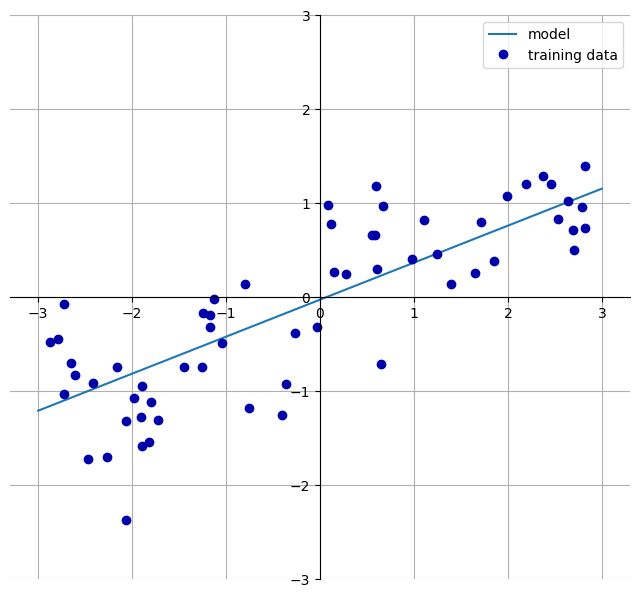

In [31]:
mglearn.plots.plot_linear_regression_wave()

Chúng tôi đã thêm một lưới tọa độ vào biểu đồ để giúp việc quan sát và diễn giải đường hồi quy trở nên dễ dàng hơn. Nhìn vào hệ số $w_1$, có thể thấy rằng độ dốc của đường thẳng vào khoảng 0.4, điều này hoàn toàn có thể xác nhận một cách trực quan trên biểu đồ. Điểm cắt $b$ là nơi đường thẳng dự đoán cắt trục tung, và như minh họa, giá trị này nhỏ hơn 0 một chút.

Các mô hình tuyến tính cho hồi quy có thể được mô tả như sau:
- Với một đặc trưng duy nhất, các giá trị dự đoán tạo thành một đường thẳng.
- Với hai đặc trưng, các giá trị dự đoán tạo thành một mặt phẳng trong không gian hai chiều.
- Với nhiều đặc trưng hơn, mô hình tương ứng với một siêu phẳng trong không gian nhiều chiều.

Khi so sánh dự đoán từ đường hồi quy tuyến tính với những gì được tạo ra bởi `KNeighborsRegressor` trên cùng dữ liệu `ML_example_2`, có thể dễ dàng nhận thấy rằng việc sử dụng một đường thẳng để mô hình hóa dữ liệu dường như khá hạn chế. Các đặc điểm cục bộ và chi tiết nhỏ trong dữ liệu bị làm mờ đi hoặc mất hoàn toàn. Đây là hệ quả của một giả định mạnh rằng biến mục tiêu $y$ có mối quan hệ tuyến tính với các đặc trưng đầu vào.

Tuy nhiên, việc đánh giá dựa trên một chiều đầu vào có thể mang lại một góc nhìn chưa đầy đủ. Trong các bài toán thực tế với nhiều đặc trưng, các mô hình tuyến tính có thể trở nên rất mạnh mẽ. Thậm chí, khi số lượng đặc trưng vượt quá số lượng mẫu huấn luyện, mô hình tuyến tính có khả năng khớp hoàn hảo với dữ liệu huấn luyện, tức là mọi giá trị của $y$ đều có thể được biểu diễn như một hàm tuyến tính của các đặc trưng.

Có nhiều biến thể khác nhau của mô hình tuyến tính cho bài toán hồi quy. Sự khác biệt chủ yếu nằm ở cách các tham số $w$ và $b$ được ước lượng từ dữ liệu, cũng như cách thức kiểm soát độ phức tạp của mô hình để tránh quá khớp. Trong phần tiếp theo, chúng ta sẽ lần lượt thảo luận về các mô hình tuyến tính phổ biến nhất sử dụng trong các bài toán hồi quy.

#### Phương pháp bình phương nhỏ nhất
<hr>

Hồi quy tuyến tính thông thường, còn được biết đến với tên gọi phương pháp bình phương tối thiểu thông thường (Ordinary Least Squares – OLS), là một trong những phương pháp cổ điển và cơ bản nhất được sử dụng trong các bài toán hồi quy.

Phương pháp này tìm cách ước lượng các tham số $w$ và $b$ của mô hình tuyến tính sao cho sai số bình phương trung bình (Mean Squared Error – MSE) giữa giá trị dự đoán $\hat{y}$ và giá trị mục tiêu thực tế $y$ trên tập huấn luyện là nhỏ nhất.

Công thức tổng quát của MSE như sau:

```{math}
\begin{align}
MSE = \cfrac{\sum\limits_{i=1}^n (y_i - \hat{y}_i)^2}{n}
\end{align}
```
Trong đó:

- $n$ là số lượng mẫu trong tập huấn luyện,
- $y_i$ là giá trị thực tế của mẫu thứ $i$,
- $\hat{y}_i$ là giá trị dự đoán tương ứng của mô hình.

Mục tiêu của hồi quy tuyến tính là tìm các tham số $w$ và $b$ sao cho MSE đạt giá trị nhỏ nhất trên tập huấn luyện.

Hồi quy tuyến tính có ưu điểm là cho phép huấn luyện nhanh chóng và dễ dàng. Tuy nhiên, mô hình này cũng không có cơ chế kiểm soát độ phức tạp, do đó dễ gặp hiện tượng quá khớp khi dữ liệu chứa nhiễu hoặc có số lượng đặc trưng lớn.

Dưới đây là đoạn câu lệnh xây dựng mô hình hồi quy tuyến tính thông thường

In [32]:
from sklearn.linear_model import LinearRegression

# Load dữ liệu
df = pd.read_csv("data/ml_example_2.csv")
X, y =  df[["X"]], df['Y']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
lr = LinearRegression().fit(X_train, y_train)

Sau khi mô hình hồi quy tuyến tính được huấn luyện bằng phương pháp bình phương tối thiểu, các tham số ước lượng có thể được truy cập thông qua các thuộc tính được định nghĩa sẵn trong đối tượng mô hình.

Cụ thể:
- Các hệ số $w$, hay còn gọi là các trọng số hoặc độ dốc của mô hình, được lưu trong thuộc tính `coef_`.
- Hệ số điều chỉnh $b$, hay còn gọi là độ lệch hoặc điểm cắt trục tung, được lưu trong thuộc tính `intercept_`.

In [33]:
print("lr.coef_: {}".format(lr.coef_))
print("lr.intercept_: {}".format(lr.intercept_))

lr.coef_: [0.47954524]
lr.intercept_: -0.09847983994403894


> Bạn đọc có thể nhận thấy dấu gạch dưới ở cuối `coef` và `intercept`. Scikit-learn luôn lưu trữ bất cứ thứ gì có nguồn gốc từ dữ liệu huấn luyện trong các thuộc tính kết thúc bằng dấu gạch dưới. Điều đó là để tách chúng khỏi các tham số được người dùng đặt.

Thuộc tính `intercept_` luôn là một số thực duy nhất, trong khi thuộc tính `coef_` là một mảng NumPy với một mục cho mỗi đặc trưng đầu vào. Vì chúng ta chỉ có một đặc trưng đầu vào duy nhất trong tập dữ liệu wave, `lr.coef_` chỉ có một số duy nhất.

Hãy xem hiệu suất của tập huấn luyện và tập kiểm tra:

In [34]:
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Training set score: 0.65
Test set score: 0.77


Trong ví dụ trước, mô hình tuyến tính được áp dụng cho một tập dữ liệu một chiều. ĐR-squared thu được vào khoảng 0.66 – không quá cao, nhưng điều đáng chú ý là điểm số trên tập huấn luyện nhỏ hơn một chút so với tập kiểm tra. Điều này cho thấy mô hình có khả năng bị underfitting, tức là mô hình quá đơn giản để có thể nắm bắt được đầy đủ các cấu trúc trong dữ liệu. Việc underfitting thường xảy ra khi mô hình có quá ít khả năng biểu diễn, như trong trường hợp này – sử dụng một mô hình tuyến tính trên dữ liệu một chiều.

Khi chuyển sang các tập dữ liệu có số lượng đặc trưng lớn hơn hay còn gọi là dữ liệu nhiều chiều, mô hình tuyến tính có thể trở nên mạnh mẽ hơn về mặt biểu diễn. Đồng thời, khả năng bị quá khớp cũng tăng lên, đặc biệt nếu số đặc trưng lớn so với số lượng mẫu huấn luyện.

Để khảo sát khả năng này, chúng ta sẽ áp dụng hồi quy tuyến tính lên một tập dữ liệu thực tế và phức tạp hơn – tập dữ liệu giá nhà Boston. Cần lưu ý rằng dữ liệu Boston mà chúng tôi giới thiệu ở trên có 13 đặc trưng. Để minh họa cho một dữ liệu nhiều chiều hơn, chúng tôi sẽ mở rộng dữ liệu này bằng cách tạo thêm các đặc trưng mới:

- 13 đặc trưng mới bằng giá trị của 13 đặc trưng hiện tại bình phương
- 13 * 12 / 2 = 78 đặc trưng mới được tính bằng tích nhân chéo các đặc trưng ban đầu đôi một với nhau.

Dữ liệu mới được tạo thành được lưu trong file `Boston_extend.csv`.  Như vậy, chúng ta sẽ xây dựng một mô hình hồi quy tuyến tính thông thường trên một dữ liệu với 13 + 13 + 78 = 104 đặc trưng.

In [35]:
df = pd.read_csv("data/Boston_extend.csv")
y, X = df["medv"], df.drop(columns=["medv"])

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)

In [36]:
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Training set score: 0.95
Test set score: 0.61


Khi so sánh hệ số R-squared trên tập huấn luyện và tập kiểm tra, chúng ta nhận thấy rằng mô hình dự đoán khá chính xác trên tập huấn luyện với điểm R-squared tiệm cận 1. Điều này cho thấy mô hình đã khớp khá tốt với các mẫu trong tập huấn luyện. Tuy nhiên, R-squared trên tập kiểm tra lại thấp hơn đáng kể, phản ánh rằng mô hình không thể duy trì hiệu suất cao khi áp dụng cho dữ liệu mới. Sự chênh lệch lớn giữa hai điểm số này là dấu hiệu điển hình của hiện tượng khớp quá mức, hay overfitting.

Hiện tượng này là hệ quả của việc sử dụng quá nhiều đặc trưng, mà trong trường hợp này là 104, trong khi số lượng mẫu chỉ là 506. Một mô hình tuyến tính như vậy có thể học thuộc các mẫu trong tập huấn luyện thay vì học các xu hướng tổng quát, dẫn đến hiệu suất kém trên dữ liệu kiểm tra.

Để giải quyết vấn đề này, chúng ta cần xem xét các mô hình có khả năng kiểm soát hoặc điều chỉnh độ phức tạp. Một trong những lựa chọn phổ biến nhất là hồi quy Ridge, còn gọi là hồi quy tuyến tính có chuẩn hóa L$^2$. Hồi quy Ridge mở rộng mô hình tuyến tính tiêu chuẩn bằng cách thêm một thuật ngữ phạt vào hàm mục tiêu MSE, nhằm hạn chế độ lớn của các hệ số trong mô hình. Cách tiếp cận này giúp làm giảm độ phức tạp và cải thiện khả năng tổng quát hóa, đặc biệt khi số đặc trưng lớn.

Trong phần tiếp theo, chúng ta sẽ xem xét chi tiết hơn về mô hình hồi quy Ridge và cách thức mô hình hoạt động.

#### Hồi quy Ridge
<hr>

Hồi quy Ridge là một phương pháp mở rộng của mô hình hồi quy tuyến tính truyền thống. Mặc dù hàm dự đoán trong hồi quy Ridge vẫn tuân theo công thức tuyến tính quen thuộc, điểm khác biệt cốt lõi nằm ở cách thức ước lượng các hệ số hồi quy.

Trong hồi quy tuyến tính thông thường, các hệ số được lựa chọn sao cho MSE đạt giá trị nhỏ nhất trên tập dữ liệu huấn luyện. Tuy nhiên, phương pháp này có thể dẫn đến hiện tượng quá khớp, đặc biệt khi số lượng đặc trưng lớn hoặc tồn tại tương quan cao giữa các biến đầu vào. Để khắc phục điều này, hồi quy Ridge bổ sung một **ràng buộc chính quy** vào bài toán tối ưu. Cụ thể, mục tiêu không chỉ là giảm sai số dự đoán mà còn là thu nhỏ độ lớn của các hệ số hồi quy $w_i$. Bằng cách đó, mô hình được khuyến khích lựa chọn các hệ số $\mathbf{w}$ có độ lớn nhỏ, nghĩa là $\sum w_j^2$ càng nhỏ càng tốt. Một cách trực quan, điều này có nghĩa là mỗi đặc trưng đầu vào nên có ảnh hưởng không quá lớn đến đầu ra, từ đó giảm thiểu nguy cơ mô hình bị chi phối bởi nhiễu trong dữ liệu. Mục tiêu tối thiểu trong hồi quy Ridge, không chỉ bao gồm tổng sai số bình phương, mà còn có cả tổng bình phương của các hệ số tuyến tính:

```{math}
\begin{align}
\sum\limits_{i=1}^n (y_i - \hat{y}_i)^2 + \alpha \cdot \sum\limits_{j=1}^p w_j^2 
\end{align}
```

Tham số $\alpha > 0$ đóng vai trò điều chỉnh mức độ ràng buộc với tham số $\mathbf{w}$.

- Khi $\alpha = 0$, chúng ta có hồi quy Ridge trở thành hồi quy tuyến tính thông thường.
- Khi $\alpha$ nhỏ, các hệ số $w_j$ có mức độ tự do lớn (không bị quá ràng buộc), hồi quy Ridge sẽ ít bị tác động từ dữ liệu hơn so với hồi quy tuyến tính thông thường.
- Khi $\alpha$ lớn, các hệ số $w_j$ có mức độ tự do nhỏ (bị đẩy về gần 0), hồi quy Ridge sẽ gần như không bị tác động từ dữ liệu.
- Khi $\alpha$ rất lớn, tất cả các hệ số $w_j$ xấp xỉ 0, đường hồi quy Ridge sẽ chỉ còn tham số $b$ là một đường thẳng nằm ngang.

Việc thêm vào ràng buộc vào các hệ số tuyến tính là một ví dụ tiêu biểu của **chính quy hóa**, hay còn gọi là *regularization* – kỹ thuật được sử dụng để giới hạn độ phức tạp của mô hình một cách tường minh, nhằm cải thiện khả năng tổng quát hóa. Đối với hồi quy Ridge, loại chính quy được sử dụng là **chính quy hóa L2**, vì phần thêm vào tổng sai số bình phương là tổng bình phương của các hệ số tuyến tính.

Chúng ta thực hiện hồi quy Ridge từ thư viện `sklearn` như sau:

In [37]:
# Gọi hồi quy ridge từ sklearn
from sklearn.linear_model import Ridge

# Ước lượng mô hình
ridge = Ridge().fit(X_train, y_train)

# Tính toán hệ số R^2
print("Training set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge.score(X_test, y_test)))

Training set score: 0.89
Test set score: 0.75


Trong quá trình đánh giá mô hình, ta quan sát thấy rằng điểm số trên tập huấn luyện của hồi quy Ridge thấp hơn so với mô hình Linear Regression, trong khi điểm số trên tập kiểm tra lại cao hơn. Kết quả này phù hợp với kỳ vọng lý thuyết về hành vi của hai mô hình này.

- Cụ thể, mô hình hồi quy tuyến tính có xu hướng khớp quá mức khi áp dụng trên dữ liệu huấn luyện, đặc biệt trong các trường hợp có nhiều đặc trưng. Do không có bất kỳ ràng buộc nào về độ lớn của các hệ số, mô hình này có thể điều chỉnh mạnh để phù hợp tối đa với dữ liệu huấn luyện, nhưng lại kém hiệu quả khi dự đoán trên dữ liệu chưa từng thấy.
- Ngược lại, hồi quy Ridge áp dụng một ràng buộc lên các hệ số, qua đó giảm độ phức tạp của mô hình. Hệ quả là hồi quy Ridge không khớp quá mức với dữ liệu huấn luyện, dẫn đến hiệu suất huấn luyện có thể thấp hơn. Tuy nhiên, chính nhờ ràng buộc này, mô hình có khả năng tổng quát hóa tốt hơn – tức là dự đoán chính xác hơn trên dữ liệu kiểm tra.

Vì mục tiêu cuối cùng trong học máy là tối ưu hiệu suất dự đoán trên dữ liệu mới, việc đánh đổi một phần hiệu suất huấn luyện để đạt được khả năng tổng quát hóa tốt hơn là hoàn toàn hợp lý. Do đó, trong bối cảnh này, lựa chọn hồi quy Ridge thay cho hồi quy tuyến tính thông thường là một quyết định phù hợp.

Hồi quy Ridge thực hiện một sự đánh đổi rõ rệt giữa độ phức tạp của mô hình và hiệu suất trên tập dữ liệu huấn luyện. Cụ thể, bằng cách khuyến khích các hệ số hồi quy tiến gần về giá trị 0, hồi quy Ridge hướng tới việc xây dựng một mô hình đơn giản hơn, ít bị ảnh hưởng bởi nhiễu hoặc hiện tượng đa cộng tuyến. Tuy nhiên, sự đơn giản hóa này có thể đi kèm với cái giá là giảm độ chính xác trên dữ liệu huấn luyện.

Mức độ nhấn mạnh vào tính đơn giản của mô hình được điều khiển bởi tham số $\alpha$. Tham số này được cung cấp bởi người dùng và quy định mức độ ưu tiên giữa hai mục tiêu: khớp dữ liệu huấn luyện tốt và giữ cho các hệ số nhỏ. Trong ví dụ trước, mô hình hồi quy Ridge được khởi tạo với giá trị mặc định $\alpha = 1.0$. Tuy nhiên, không có cơ sở lý thuyết nào đảm bảo rằng đây là giá trị tối ưu cho mọi bộ dữ liệu.

Việc lựa chọn giá trị $\alpha$ phù hợp là một yếu tố then chốt và thường cần được xác định thông qua các kỹ thuật hiệu chỉnh siêu tham số, chẳng hạn như xác thực chéo. Tăng giá trị $\alpha$ dẫn đến một ràng buộc chặt chẽ hơn đối với các hệ số, buộc chúng phải tiến gần về 0 nhiều hơn. Điều này thường làm giảm hiệu suất của mô hình trên tập huấn luyện, nhưng đồng thời có thể cải thiện khả năng tổng quát hóa nếu ban đầu mô hình có dấu hiệu quá khớp.

Ví dụ minh họa dưới đây sẽ cho thấy sự thay đổi trong hiệu suất mô hình khi thay đổi giá trị của tham số $\alpha$, từ đó giúp lựa chọn được mức chính quy hóa phù hợp nhất với bộ dữ liệu cụ thể.

In [38]:
# Thay đổi tham số alpha = 10
ridge10 = Ridge(alpha=10).fit(X_train, y_train)

# Tính toán sai số
print("Training set score: {:.2f}".format(ridge10.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge10.score(X_test, y_test)))

Training set score: 0.79
Test set score: 0.64


Việc giảm giá trị của tham số $\alpha$ trong hồi quy Ridge đồng nghĩa với việc giảm mức độ ràng buộc lên các hệ số hồi quy. Khi đó, mô hình trở nên ít bị giới hạn hơn, cho phép các hệ số có độ lớn lớn hơn và thể hiện ảnh hưởng rõ rệt hơn từ các đặc trưng đầu vào.

In [39]:
# Thay đổi tham số alpha = 0.1
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)

# Tính toán sai số
print("Training set score: {:.2f}".format(ridge01.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge01.score(X_test, y_test)))

Training set score: 0.93
Test set score: 0.77


Trong ví dụ hiện tại, giá trị $\alpha = 0.1$ dường như mang lại hiệu suất tổng quát hóa tương đối tốt. Tuy nhiên, để tiếp tục cải thiện khả năng dự đoán trên dữ liệu mới, ta có thể cân nhắc giảm thêm giá trị $\alpha$. Việc tinh chỉnh tham số này đòi hỏi đánh giá cẩn trọng, vì nó điều khiển trực tiếp độ phức tạp của mô hình.

Cần lưu ý rằng tham số $\alpha$ có ảnh hưởng trực tiếp đến cấu trúc và hành vi của mô hình, cụ thể là thông qua các hệ số hồi quy `coef_`. Khi $\alpha$ tăng, mô hình bị ràng buộc nhiều hơn, khiến cho các hệ số buộc phải tiến gần về 0. Ngược lại, khi $\alpha$ giảm, mô hình ít bị hạn chế hơn và các hệ số có thể có độ lớn lớn hơn.

Để hiểu rõ hơn tác động này, ta có thể trực tiếp kiểm tra thuộc tính `coef_` của các mô hình hồi quy Ridge được huấn luyện với các giá trị $\alpha$ khác nhau. Quan sát các hệ số thu được sẽ cung cấp một cái nhìn sâu sắc về cách chính quy hóa điều chỉnh ảnh hưởng của từng đặc trưng đầu vào.

Thực nghiệm cho thấy rằng khi sử dụng giá trị $\alpha$ cao hơn, độ lớn tuyệt đối của các hệ số trong `coef_` giảm rõ rệt so với khi dùng giá trị $\alpha$ thấp. Nhận định này được trực quan hóa một cách rõ nét trong biểu đồ minh họa phía dưới:

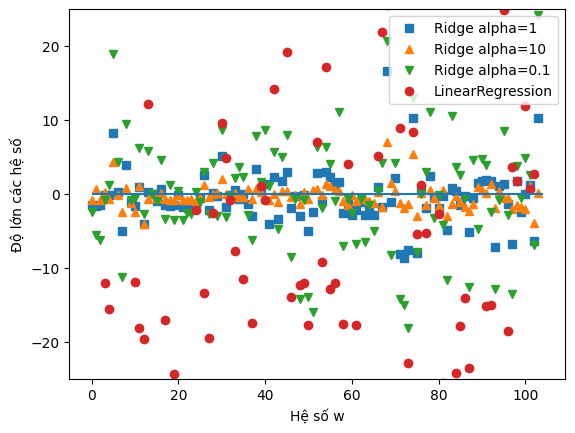

In [40]:
plt.plot(ridge.coef_, 's', label="Ridge alpha=1")
plt.plot(ridge10.coef_, '^', label="Ridge alpha=10")
plt.plot(ridge01.coef_, 'v', label="Ridge alpha=0.1")
plt.plot(lr.coef_, 'o', label="LinearRegression")

plt.xlabel("Hệ số w")
plt.ylabel("Độ lớn các hệ số")
plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-25, 25)
plt.legend()

Trong biểu đồ trên, chúng ta có thể quan sát trực quan ảnh hưởng của tham số $\alpha$ đến các hệ số hồi quy thu được từ mô hình hồi quy Ridge. Trục hoành x biểu thị chỉ số của các hệ số trong vector `coef_`, với x = 0 tương ứng với hệ số của đặc trưng đầu vào đầu tiên, x = 1 tương ứng với hệ số của đặc trưng thứ hai, và tiếp tục như vậy đến x = 100. Trục y thể hiện giá trị số thực của các hệ số tương ứng.

Điểm mấu chốt từ biểu đồ là: các giá trị của $\alpha$ khác nhau tạo ra những mức độ chính quy hóa khác nhau, ảnh hưởng trực tiếp đến độ lớn của các hệ số. Cụ thể:

- Với $\alpha = 10$, mô hình bị chính quy hóa mạnh, khiến cho các hệ số hồi quy chủ yếu nằm trong khoảng từ -3 đến 3.
- Khi giảm xuống $\alpha = 1$, ràng buộc lỏng hơn, cho phép các hệ số có độ lớn lớn hơn một chút.
- Với $\alpha = 0.1$, ảnh hưởng của ràng buộc gần như bị triệt tiêu, dẫn đến các hệ số có độ lớn lớn hơn đáng kể.
- Đặc biệt, đối với mô hình hồi quy tuyến tính thông thường, tương ứng với $\alpha = 0$, tức không có chính quy hóa, nhiều hệ số có độ lớn quá cao đến mức nằm ngoài phạm vi của biểu đồ.

Biểu đồ này là một minh chứng trực quan cho vai trò của chính quy hóa trong việc ổn định và kiểm soát độ lớn của hệ số hồi quy, qua đó giúp mô hình tránh được hiện tượng khớp quá mức và cải thiện khả năng tổng quát hóa trên dữ liệu mới.

#### Lasso
<hr>

Một phương pháp thay thế cho Ridge để chính quy hóa hồi quy tuyến tính là Lasso. Cũng như hồi quy Ridge, việc sử dụng Lasso cũng điều chỉnh việc tối thiểu hóa tổng bình phương sai số của mô hình bằng cách thêm vào một đại lượng nhằm chính quy hóa các hệ số

```{math}
\begin{align}
\sum\limits_{i=1}^n (y_i - \hat{y}_i)^2 + \alpha \cdot \sum\limits_{j=1}^p |w_j|
\end{align}
```

Cơ chế hoạt động của Lasso tương tự như hồi quy Ridge, với hệ số $\alpha$ quyết định mức độ tự do của các hệ số. Sự khác biệt của Lasso là ở mức độ chính quy hóa mạnh hơn và có thể đẩy nhiều hệ số $w$ bằng 0 hơn.

In [41]:
# Gọi mô hình từ sklearn
from sklearn.linear_model import Lasso

# Ước lượng mô hình
lasso = Lasso().fit(X_train, y_train)

# Tính toán sai số trên tập test
print("Training set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso.score(X_test, y_test)))

# Số lượng hệ số khác 0
print("Number of features used: {}".format(np.sum(lasso.coef_ != 0)))

Training set score: 0.29
Test set score: 0.21
Number of features used: 4


Trong trạng thái mặc định, khi sử dụng giá trị $\alpha = 1.0$, Lasso cho thấy hiệu suất không cao, cả trên tập huấn luyện lẫn tập kiểm tra. Kết quả này cho thấy mô hình đang bị underfitting, tức là không nắm bắt được đầy đủ các cấu trúc tiềm ẩn trong dữ liệu. Phân tích các hệ số hồi quy cho thấy chỉ có 4 trong tổng số 104 đặc trưng được giữ lại trong mô hình – phần còn lại bị triệt tiêu hoàn toàn về 0. Điều này phản ánh đặc trưng quan trọng của Lasso là khả năng thực hiện lựa chọn biến một cách tự động.

Tương tự như hồi quy Ridge, Lasso cũng sử dụng một tham số chính quy hóa $\alpha$ để điều khiển mức độ ràng buộc lên các hệ số. Giá trị lớn của $\alpha$ dẫn đến việc nhiều hệ số bị ép về 0, làm cho mô hình trở nên đơn giản hơn nhưng dễ rơi vào tình trạng underfitting.

Để khắc phục hiện tượng này, cần giảm giá trị của $\alpha$ nhằm cho phép nhiều đặc trưng hơn được giữ lại trong mô hình. Tuy nhiên, không giống như hồi quy Ridge – vốn có thể ước lượng các tham số của mô hình bằng công thức giải tích chính xác – hồi quy Lasso không có lời giải chính xác cho mọi giá trị $\alpha$. Thay vào đó, việc ước lượng các tham số trong Lasso phải dựa vào xấp xỉ số học thông qua các thuật toán lặp, chẳng hạn như *coordinate descent* hoặc *least-angle regression*.

Do đó, khi giảm giá trị $\alpha$, để đảm bảo thuật toán hội tụ và tìm ra nghiệm gần đúng phù hợp, ta cần tăng số vòng lặp tối đa thông qua tham số `max_iter`. Đây là tham số điều khiển số lượng lặp tối đa được phép trong quá trình tối ưu hóa. Nếu `max_iter` quá nhỏ, mô hình có thể không hội tụ được và sinh ra kết quả sai lệch.

Tóm lại, việc tinh chỉnh tham số $\alpha$ trong hồi quy Lasso đòi hỏi không chỉ sự cẩn trọng trong lựa chọn giá trị, mà còn cần điều chỉnh các thiết lập thuật toán phù hợp để đảm bảo quá trình tối ưu hóa diễn ra hiệu quả.

In [42]:
# chúng ta tăng cài đặt mặc định của "max_iter",
# nếu không mô hình sẽ cảnh báo chúng ta rằng chúng ta nên tăng max_iter.
lasso001 = Lasso(alpha=0.005, max_iter=100000).fit(X_train, y_train)

# Tính toán sai số trên tập test
print("Training set score: {:.2f}".format(lasso001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso001.score(X_test, y_test)))\

# Số lượng hệ số khác 0
print("Number of features used: {}".format(np.sum(lasso001.coef_ != 0)))

Training set score: 0.92
Test set score: 0.78
Number of features used: 43


Việc giảm giá trị \( \alpha \) trong hồi quy Lasso cho phép mô hình tăng độ phức tạp, từ đó cải thiện hiệu suất trên cả tập huấn luyện và tập kiểm tra. Khi sử dụng một giá trị \( \alpha \) nhỏ hơn (so với mặc định), mô hình đạt được hiệu suất tốt hơn so với hồi quy Ridge trong cùng điều kiện, đồng thời chỉ sử dụng 43 trong số 104 đặc trưng sẵn có. Điều này không chỉ nâng cao hiệu quả dự đoán mà còn góp phần tăng tính dễ diễn giải của mô hình – một lợi thế quan trọng trong các ứng dụng yêu cầu giải thích rõ ràng.

Tuy nhiên, cần lưu ý rằng nếu tiếp tục giảm \( \alpha \) quá mức, ta dần loại bỏ hoàn toàn hiệu ứng của chính quy hóa. Trong giới hạn khi \( \alpha \to 0 \), mô hình hồi quy Lasso sẽ hội tụ về mô hình hồi quy tuyến tính thông thường, tức là không có bất kỳ ràng buộc nào về độ lớn của các hệ số:

In [43]:
# Ước lượng với tham số alpha nhỏ
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)

# Tính toán sai số trên tập test
print("Training set score: {:.2f}".format(lasso00001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso00001.score(X_test, y_test)))

# Số lượng hệ số khác 0
print("Number of features used: {}".format(np.sum(lasso00001.coef_ != 0)))

Training set score: 0.95
Test set score: 0.64
Number of features used: 96


Một lần nữa, chúng ta có thể vẽ biểu đồ các hệ số của các mô hình khác nhau, tương tự như khi biểu trực quan với hồi quy Ridge. Kết quả được hiển thị trong hình phía dưới:

Text(0, 0.5, 'Độ lớn các hệ số')

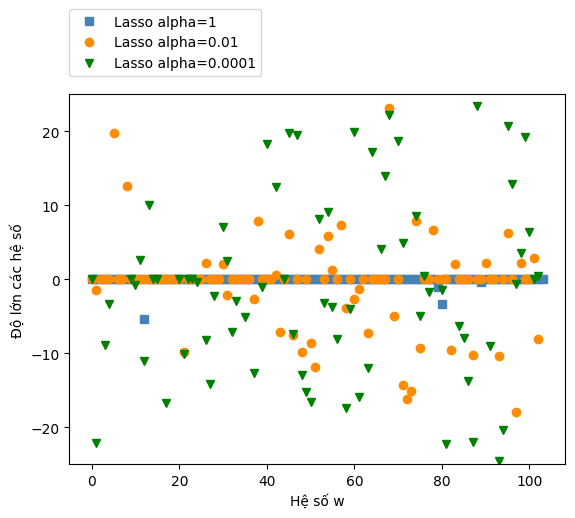

In [44]:
plt.plot(lasso.coef_, 's', label="Lasso alpha=1", color = "steelblue")
plt.plot(lasso001.coef_, 'o', label="Lasso alpha=0.01", color = "darkorange")
plt.plot(lasso00001.coef_, 'v', label="Lasso alpha=0.0001", color = 'green')

plt.legend(ncol=1, loc=(0, 1.05))
plt.ylim(-25, 25)
plt.xlabel("Hệ số w")
plt.ylabel("Độ lớn các hệ số")

Khi sử dụng hồi quy Lasso với $\alpha$ = 1, ta quan sát thấy rằng phần lớn các hệ số hồi quy đều bằng không, phản ánh đặc trưng chính của Lasso là khả năng tự động lựa chọn đặc trưng. Hơn nữa, các hệ số còn lại có độ lớn nhỏ, cho thấy mô hình đang chịu một mức độ chính quy hóa mạnh. Khi giảm $\alpha$ xuống 0.01, kết quả được minh họa bằng các dấu tròn màu cam, cho thấy số lượng đặc trưng được giữ lại nhiều hơn. Điều này vẫn đảm bảo tính đơn giản và khả năng diễn giải tốt của mô hình.

Tiếp tục giảm alpha xuống 0.0001, ta thu được một mô hình gần như không được chính quy hóa, với hầu hết các hệ số khác không và có độ lớn lớn hơn đáng kể. Trong trường hợp này, Lasso gần như hội tụ về mô hình hồi quy tuyến tính thông thường, và hiệu suất mô hình có thể bị ảnh hưởng bởi hiện tượng quá khớp.

Trong thực tiễn, hồi quy Ridge thường được xem là lựa chọn mặc định khi xây dựng mô hình dự báo, đặc biệt trong trường hợp có nhiều đặc trưng và không có lý do rõ ràng để loại bỏ bất kỳ biến nào. Tuy nhiên, nếu tồn tại giả định rằng chỉ một số nhỏ đặc trưng là thực sự quan trọng, hoặc khi mong muốn một mô hình dễ diễn giải hơn, hồi quy Lasso có thể là lựa chọn phù hợp hơn.

Ngoài hai phương pháp trên, thư viện Scikit-learn còn cung cấp hồi quy ElasticNet, là một phương pháp tổng quát kết hợp cả hai phương thức chính quy hóa của Lasso của Ridge. ElasticNet thường cho hiệu suất cao trong thực tế, đặc biệt khi xử lý dữ liệu có tính đa cộng tuyến và số chiều lớn. Tuy nhiên, mô hình này yêu cầu điều chỉnh hai tham số: một cho mức độ chính quy hóa cho Lasso và một cho Ridge, do đó tăng thêm độ phức tạp trong quá trình hiệu chỉnh mô hình.

Tóm lại, có thể tổng kết rằng

- Hồi quy Ridge: tốt cho dữ liệu có nhiều đặc trưng có cùng đóng góp vào biến mục tiêu và có xu hướng giữ lại tất cả biến.
- Lasso: tốt khi chỉ một số đặc trưng quan trọng, ác đặc trưng khác không tác động lên biến mục tiêu. Mô hình cũng sẽ dễ hiểu hơn.
- ElasticNet: Kết hợp cả hai ưu điểm; phù hợp khi cần linh hoạt cao trong kiểm soát chính quy hóa.

#### Mô hình tuyến tính cho phân loại
<hr>

Nhắc lại rằng mô hình tuyến tính là mô hình mà biến mục tiêu được mô tả bằng một tổ hợp tuyến tính của các đặc trưng

```{math}
\begin{align}
\hat{y} = b + w_1 \cdot x_1 + w_2 \cdot x_2 + \ldots + w_p \cdot x_p
\end{align}
```

Khi sử dụng mô hình tuyến tính cho mục đích phân loại, khó khăn lớn nhất là giá trị đầu ra của mô hình là một số thực, trong khi yêu cầu của đầu ra trong bài toán phân loại đó là đầu ra là các giá trị không có ý nghĩa về mặt tính toán. Chẳng hạn như trong bài toán phân loại khách hàng có đồng ý chấp nhận dịch vụ, các giá trị của biến đầu ra chỉ có thể là "Không" hoặc "Có", hoặc trong bài toán phân loại hoa iris, giá trị đầu ra là một trong ba loài hoa. Ngay cả khi chúng ta mã hóa các giá trị phân loại này thành các số tự nhiên, việc tính toán trên các giá trị này cũng không có ý nghĩa.

Như chúng tôi đã thảo luận ở phần đầu của chương, đầu ra của một mô hình phân loại sẽ là một véc-tơ xác suất. Ví dụ, với mẫu thứ i, giá trị đầu ra sẽ là một véc-tơ với độ dài là $J$:

```{math}
\begin{align}
\hat{y}_i = (p_{i,1},p_{i,2},...,p_{i,j},...,p_{i,J})
\end{align}
```

Trong trường hợp $J = 2$, ta có bài toán phân loại nhị phân. Véc-tơ đầu ra có thể đơn giản hóa thành $(1 - p_i, p_i)$ trong đó $p_i$ tương ứng với xác suất giá trị đầu ra bằng 1. Để giá trị đầu ra của mô hình tuyến tính phù hợp với giá trị đầu ra là xác suất $p_i$ nằm trong khoảng $(0,1)$, chúng ta cần định nghĩa một hàm số $g$ có miền giá trị là tập các số thực và miền xác định là khoảng (0,1) sao cho

```{math}
\begin{align}
g(p_i) = b + w_1 \cdot x_1 + w_2 \cdot x_2 + \ldots + w_p \cdot x_p
\end{align}
```
Với lựa chọn hàm $g$ là tăng, sẽ tồn tại **hàm ngược** $g^{-1}$ sao cho 

```{math}
\begin{align}
p_i = g^{-1}\left( b + w_1 \cdot x_1 + w_2 \cdot x_2 + \ldots + w_p \cdot x_p \right)
\end{align}
```

Các hệ số $b$ và $w$ được tính toán sao cho sai số trên tập huấn luyện mô hình là nhỏ nhất:
```{math}
\begin{align}
Entropy = \sum\limits_{i=1}^n  y_{i} \times (- \log(p_{i}) )
\end{align}
```

Hàm số $g$ thường được sử dụng trong bài toán phân loại nhị phân là hàm *logit*, với
```{math}
\begin{align}
g(p) &= \log \left(\cfrac{p}{1-p} \right) \\
g^{-1}(z) &= \cfrac{1}{1 + e^{-z}}
\end{align}
```

Trong bài toán phân loại nhị phân, khi sử dụng mô hình tuyến tính kết hợp với hàm *logit*, chúng ta có mô hình hồi quy *logistic*. Viết một cách đầy đủ hồi quy *logistic* cho rằng xác suất để biến mục tiêu nhận giá trị bằng 1 là một hàm số của một tổ hợp tuyến tính của các biến mục tiêu:

```{math}
\begin{align}
\mathbb{P}(Y = 1) = \cfrac{1}{ 1 + exp\left(-\left( b + w_1 \cdot x_1 + w_2 \cdot x_2 + \ldots + w_p \cdot x_p \right) \right)  }
\end{align}
```
và quá trình ước lượng tham số của hồi quy logistic là quá trình tìm các tham số $w$ và $b$ sao cho sai số tính bằng Entropy trên dữ liệu huấn luyện mô hình là nhỏ nhất.

Chúng ta có thể áp dụng các mô hình `LogisticRegression` cho tập dữ liệu `ML_example_1` và trực quan hóa ranh giới quyết định được tìm thấy bởi các mô hình tuyến tính. Lưu ý rằng hàm `LogisticRegression` mặc định thực hiện chính quy hóa hệ số tuyến tính. Do đó, chúng ta cần sử dụng tham số `penalty=None` nếu không muốn thực hiện.

Hệ số (w): [[ 9.68679407 11.14644495]]
Hệ số chặn (b): [-127.28498057]


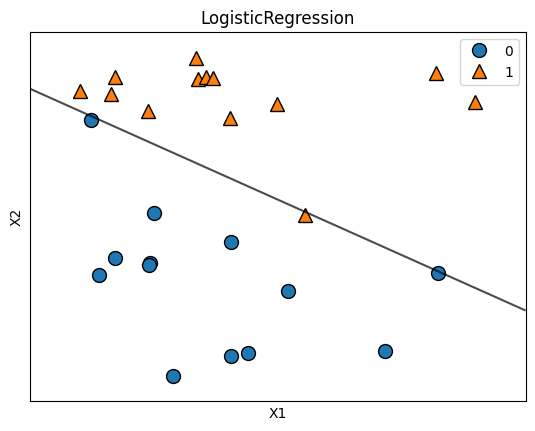

In [45]:
from sklearn.linear_model import LogisticRegression

# Load dữ liệu
df = pd.read_csv("data/ml_example_1.csv")
X, y =  df[["X1","X2"]], df['Y']
X = X.values

# Khởi tạo và huấn luyện mô hình
clf = LogisticRegression(penalty=None).fit(X, y) # không chính quy hóa
print("Hệ số (w):", clf.coef_)
print("Hệ số chặn (b):", clf.intercept_)

# Vẽ đường phân loại
plt.figure()
mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5, alpha=0.7)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.title(f"{clf.__class__.__name__}")
plt.xlabel("X1")
plt.ylabel("X2")
plt.legend()
plt.show()

Trong hình minh họa phía trên, trục hoành (X1) biểu diễn đặc trưng thứ nhất của tập dữ liệu, trong khi trục tung (X2) thể hiện đặc trưng thứ hai. Ranh giới quyết định (decision boundary) được tính toán từ mô hình `LogisticRegression` có dạng một đường thẳng, chia mặt phẳng đặc trưng thành hai miền: miền phía trên tương ứng với các điểm được phân loại vào lớp 1, và miền phía dưới tương ứng với các điểm được phân loại vào lớp 0. Nói cách khác, bất kỳ điểm dữ liệu mới nào nằm phía trên hoặc trên đường ranh giới màu đen sẽ được mô hình dự đoán thuộc về lớp 1; ngược lại, những điểm nằm phía dưới đường ranh giới sẽ được phân loại vào lớp 0.

Phương trình của đường thẳng phân chia hai miền phân loại — tức là ranh giới mà tại đó mô hình ước lượng xác suất bằng 0.5 — được xác định bởi:

```{math}
\begin{align}
& \mathbb{P}(Y = 1) = 0.5 \\
& \cfrac{1}{ 1 + exp\left(-\left( b + w_1 \cdot x_1 + w_2 \cdot x_2 \right) \right) } = 0.5 \\
& b + w_1 \cdot x_1 + w_2 \cdot x_2 = 0
\end{align}
```

Cần lưu ý rằng trong trường hợp số lượng đặc trưng đủ lớn, có thể áp dụng kỹ thuật chính quy hóa (regularization) cho hồi quy logistic một cách tương tự như phương pháp Ridge trong hồi quy tuyến tính. Việc này giúp kiểm soát độ phức tạp của mô hình và giảm nguy cơ quá khớp (overfitting). Trong phần tiếp theo, chúng ta sẽ phân tích chi tiết mô hình LogisticRegression trên tập dữ liệu về ung thư — một tập dữ liệu có số lượng đặc trưng lớn, do đó việc áp dụng chính quy hóa là phù hợp và cần thiết.

Lớp `LogisticRegression()` trong scikit-learn hỗ trợ chính quy hóa thông qua tham số `C`, đóng vai trò tương tự như trong hồi quy Ridge. Cụ thể, giá trị `C` càng lớn thì mô hình càng ít bị ràng buộc, dẫn đến khả năng biểu diễn linh hoạt hơn; ngược lại, khi `C` nhỏ, mô hình bị ràng buộc mạnh hơn, khuyến khích các hệ số hồi quy có giá trị nhỏ, từ đó hạn chế hiện tượng quá khớp và tăng khả năng tổng quát hóa của mô hình.

In [46]:
from sklearn.datasets import load_breast_cancer

# Load dữ liệu
cancer = load_breast_cancer()

# Chia dữ liệu thành train-test
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=10)

# Ước lượng mô hình
logreg = LogisticRegression(C = 1).fit(X_train, y_train)

# Đánh giá mô hình
print("Training set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test)))

Training set score: 0.958
Test set score: 0.937


Có thể nhận thấy rằng mô hình hồi quy logistic đang đạt hiệu suất dự đoán khá tốt, với độ chính xác trên 93% đối với biến mục tiêu. Tuy nhiên, việc mô hình thể hiện hiệu suất cao hơn đáng kể trên tập huấn luyện so với tập kiểm tra có thể là một dấu hiệu cho thấy hiện tượng khớp quá mức. Để cải thiện khả năng tổng quát hóa và giảm nguy cơ khớp quá mức, chúng ta có thể áp dụng chính quy hóa mạnh hơn, tức là giảm giá trị của tham số C trong hàm `LogisticRegression()`. Như đã đề cập, `C` là nghịch đảo của hệ số chính quy hóa nên khi giảm `C`, mức độ ràng buộc đối với các hệ số hồi quy sẽ tăng lên, buộc mô hình đơn giản hơn và ổn định hơn khi áp dụng cho dữ liệu chưa từng thấy.

In [47]:
# Ước lượng mô hình với ràng buộc mạnh hơn
logreg01 = LogisticRegression(C = 0.1).fit(X_train, y_train)

# Đánh giá mô hình
print("Training set score: {:.3f}".format(logreg01.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg01.score(X_test, y_test)))

Training set score: 0.951
Test set score: 0.951


Đúng như dự đoán, khi tăng mức độ chính quy hóa, mô hình có xu hướng dự đoán kém hơn một chút trên tập huấn luyện nhưng lại cải thiện hiệu suất trên tập kiểm tra. Điều này cho thấy mô hình đã bắt đầu tổng quát hóa tốt hơn đối với dữ liệu chưa từng thấy, đồng thời giảm hiện tượng khớp quá mức. Tuy nhiên, độ chính xác trên tập huấn luyện hiện vẫn cao hơn so với tập kiểm tra, cho thấy mô hình vẫn có thể đang học quá kỹ dữ liệu huấn luyện. Do đó, chúng ta hoàn toàn có thể tiếp tục ràng buộc mô hình mạnh hơn nữa bằng cách giảm thêm giá trị C, nhằm tìm ra mức chính quy hóa tối ưu, cân bằng giữa khả năng học và khả năng tổng quát hóa.

In [48]:
# Ước lượng mô hình với ràng buộc mạnh hơn
logreg001 = LogisticRegression(C=0.01).fit(X_train, y_train)

# Đánh giá mô hình
print("Training set score: {:.3f}".format(logreg001.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg001.score(X_test, y_test)))

Training set score: 0.946
Test set score: 0.909


Không như kỳ vọng, khi áp dụng mức chính quy hóa quá mạnh, mô hình trở nên không còn đủ linh hoạt để nắm bắt mối quan hệ phức tạp giữa các đặc trưng và biến mục tiêu. Hậu quả là hiệu suất của mô hình suy giảm rõ rệt: độ chính xác trên tập huấn luyện giảm xuống còn khoảng 91%, so với mức hơn 94% đạt được khi sử dụng C = 0.1.

Để hiểu rõ hơn tác động của chính quy hóa đến cấu trúc mô hình, chúng ta có thể so sánh các hệ số hồi quy được học bởi mô hình logistic ứng với ba giá trị khác nhau của tham số C. Việc này giúp làm rõ cách mà chính quy hóa ảnh hưởng đến độ lớn của các hệ số và, qua đó, ảnh hưởng đến hành vi tổng quát hóa của mô hình.

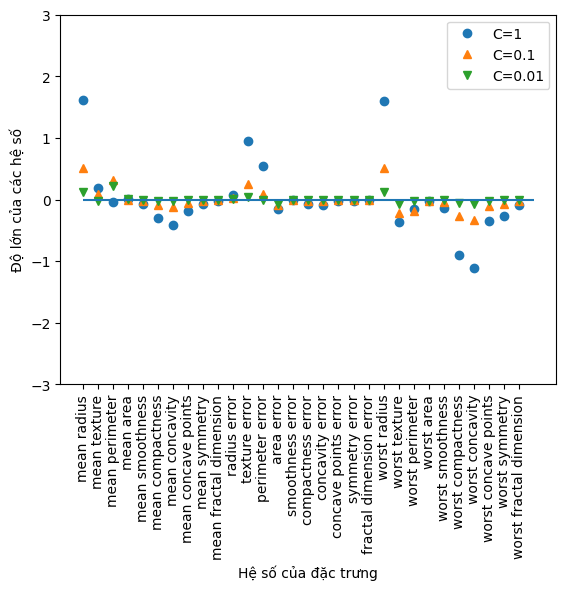

In [49]:
plt.plot(logreg.coef_.T, 'o', label="C=1")
plt.plot(logreg01.coef_.T, '^', label="C=0.1")
plt.plot(logreg001.coef_.T, 'v', label="C=0.01")
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.ylim(-3, 3)
plt.xlabel("Hệ số của đặc trưng")
plt.ylabel("Độ lớn của các hệ số")
plt.legend()

Do mô hình LogisticRegression mặc định sử dụng chính quy hóa $L^2$, nên kết quả thu được mang nhiều điểm tương đồng với kết quả của mô hình Ridge. Khi tăng mức độ chính quy hóa, các hệ số hồi quy bị đẩy tiến gần về 0 hơn — mặc dù trong trường hợp sử dụng $L^2$, các hệ số không bao giờ thực sự bằng 0. Quan sát biểu đồ hệ số, có thể nhận thấy một hiện tượng thú vị xảy ra đối với hệ số thứ ba, tương ứng với đặc trưng "mean perimeter". Cụ thể, với giá trị C=1, hệ số này mang dấu âm. Tuy nhiên, khi giảm C, hệ số chuyển sang dương và thậm chí có độ lớn lớn hơn so với trường hợp C=1.

Hiện tượng thay đổi dấu của hệ số như vậy đặt ra một lưu ý quan trọng trong việc giải thích các mô hình tuyến tính. Thông thường, người ta có xu hướng gán diễn giải định hướng cho hệ số, ví dụ: một hệ số dương cho biến "texture error" có thể được hiểu là giá trị cao của đặc trưng này liên quan đến khả năng mẫu thuộc lớp ác tính. Tuy nhiên, việc hệ số của "mean perimeter" có thể chuyển từ âm sang dương tùy thuộc vào mức chính quy hóa cho thấy rằng: diễn giải các hệ số mô hình tuyến tính cần được thực hiện một cách hết sức thận trọng. Việc thay đổi dấu có thể phản ánh những tương tác phức tạp giữa các đặc trưng hoặc ảnh hưởng của chính quy hóa gây ra.

Nếu mục tiêu là xây dựng một mô hình dễ diễn giải hơn, việc sử dụng chính quy hóa L1 có thể mang lại lợi ích đáng kể. Khác với L2, chính quy hóa L1 có xu hướng ép nhiều hệ số về đúng bằng 0. Nhờ đó, mô hình không chỉ trở nên đơn giản hơn mà còn dễ dàng hơn trong việc xác định những đặc trưng nào thực sự quan trọng đối với quá trình phân loại.

Hình dưới đây thể hiện biểu đồ các hệ số hồi quy cũng như độ chính xác phân loại tương ứng khi áp dụng chính quy hóa L1 với các mức độ khác nhau. Có thể thấy rằng khi độ mạnh chính quy hóa tăng lên, nhiều hệ số trở về 0, cho thấy chỉ một tập con nhỏ các đặc trưng được mô hình sử dụng. Tuy nhiên, điều này cũng có thể ảnh hưởng đến độ chính xác nếu mô hình loại bỏ các đặc trưng quan trọng.

Training accuracy of l1 logreg with C=100.000: 0.99
Test accuracy of l1 logreg with C=100.000: 0.96
Training accuracy of l1 logreg with C=10.000: 0.98
Test accuracy of l1 logreg with C=10.000: 0.96
Training accuracy of l1 logreg with C=1.000: 0.97
Test accuracy of l1 logreg with C=1.000: 0.94


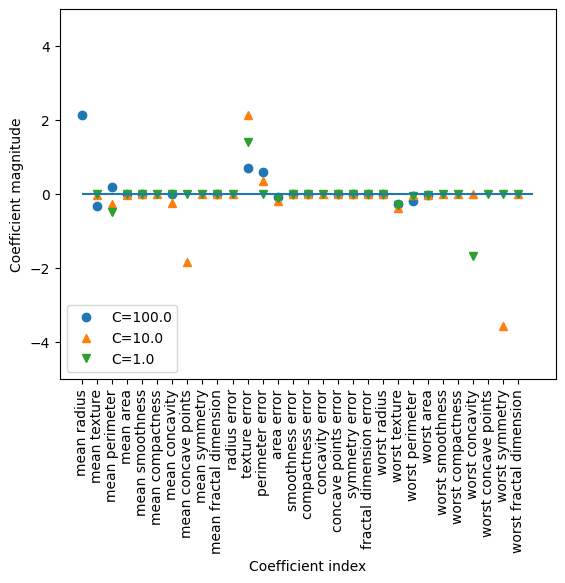

In [50]:
for C, marker in zip([100, 10, 1], ['o', '^', 'v']):
    lr_l1 = LogisticRegression(C=C, penalty="l1", solver='liblinear').fit(X_train, y_train)
    print("Training accuracy of l1 logreg with C={:.3f}: {:.2f}".format(
        C, lr_l1.score(X_train, y_train)))
    print("Test accuracy of l1 logreg with C={:.3f}: {:.2f}".format(
        C, lr_l1.score(X_test, y_test)))
    plt.plot(lr_l1.coef_.T, marker, label="C={:.1f}".format(C))

plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")

plt.ylim(-5, 5)
plt.legend(loc=3)

Như bạn đọc có thể thấy, trong trường hợp của dữ liệu ung thư, một vài đặc trưng có ảnh hưởng rất mạnh đến kết quả phân loại, do đó chính quy hóa bằng $L^1$ cho kết quả tốt hơn so với chính quy hóa bằng $L^2$.

Nhiều mô hình phân loại tuyến tính, chẳng hạn như hồi quy tuyến tính hoặc các biến thể đơn giản khác, thường chỉ áp dụng được cho các bài toán phân loại nhị phân và không mở rộng một cách trực tiếp hoặc tự nhiên sang các bài toán phân loại đa lớp. Một ngoại lệ quan trọng là mô hình hồi quy logistic, vốn được thiết kế để có thể mở rộng hiệu quả cho các tình huống đa lớp.

Một phương pháp phổ biến để mở rộng các thuật toán phân loại nhị phân thành các mô hình phân loại đa lớp là kỹ thuật một-phần còn lại. Trong cách tiếp cận này, ta huấn luyện một mô hình phân loại nhị phân cho mỗi lớp trong tập dữ liệu. Cụ thể, với mỗi mô hình, dữ liệu thuộc lớp đang được xem xét được gán nhãn là dương, còn toàn bộ các điểm dữ liệu thuộc các lớp còn lại được gán nhãn là âm. Kết quả là, với J lớp phân loại, ta cần xây dựng J mô hình nhị phân độc lập. Khi dự đoán, mỗi mô hình sẽ đưa ra một "điểm số" hoặc xác suất thuộc lớp tương ứng, và điểm dữ liệu mới sẽ được gán vào lớp có mô hình cho ra điểm số cao nhất.

Khi số lượng lớp tăng lên, các phương pháp mở rộng từ mô hình nhị phân như trên không phải lúc nào cũng cho hiệu quả cao, do các mô hình con có thể xung đột trong dự đoán hoặc gặp khó khăn trong việc phân tách ranh giới giữa các lớp gần nhau. Do đó, trong thực hành, các bài toán phân loại đa lớp thường được giải quyết hiệu quả hơn bằng cách sử dụng các tập hợp mô hình phi tuyến, tiêu biểu là các mô hình dựa trên cây quyết định. Những mô hình này, như sẽ được trình bày trong phần tiếp theo của chương, có khả năng xử lý tốt các mối quan hệ phi tuyến giữa các đặc trưng và lớp, đồng thời dễ dàng mở rộng cho các bài toán có số lượng lớp lớn mà không cần thay đổi cấu trúc mô hình cơ bản.

### Cây quyết định
<hr>

Cây quyết định là các mô hình được sử dụng rộng rãi cho các tác vụ phân loại và hồi quy. Về cơ bản, chúng học một hệ thống phân cấp các câu hỏi nếu/thì, dẫn đến một quyết định. Những câu hỏi này tương tự như những câu hỏi bạn có thể hỏi trong một trò chơi 20 câu hỏi. Hãy tưởng tượng bạn muốn phân biệt giữa bốn loài động vật sau: gấu, diều hâu, chim cánh cụt và cá heo. Mục tiêu của bạn là đi đến câu trả lời đúng bằng cách hỏi càng ít câu hỏi nếu/thì càng tốt. Bạn có thể bắt đầu bằng cách hỏi xem con vật có lông vũ không, một câu hỏi thu hẹp các loài động vật có thể có của bạn xuống chỉ còn hai. Nếu câu trả lời là "có", bạn có thể hỏi một câu hỏi khác có thể giúp bạn phân biệt giữa diều hâu và chim cánh cụt. Ví dụ, bạn có thể hỏi xem con vật có thể bay không. Nếu con vật không có lông vũ, các lựa chọn động vật có thể có của bạn là cá heo và gấu, và bạn sẽ cần hỏi một câu hỏi để phân biệt giữa hai loài động vật này—ví dụ, hỏi xem con vật có vây không.

Chuỗi câu hỏi này có thể được biểu diễn dưới dạng một cây quyết định, như được hiển thị trong hình dưới đây

![](data/tree1.png)

Cây quyết định là một phương pháp mô hình hóa được sử dụng phổ biến trong các bài toán phân loại và hồi quy. Về bản chất, cây quyết định học một cấu trúc phân cấp của các câu hỏi dạng điều kiện nếu/thì nhằm đưa ra dự đoán cho một đối tượng đầu vào cụ thể.

Các câu hỏi trong cây quyết định có mục tiêu thu hẹp phạm vi lựa chọn và đi đến kết luận chính xác bằng số lượng câu hỏi ít nhất có thể. Chẳng hạn, để phân biệt giữa bốn loài động vật: gấu, diều hâu, chim cánh cụt, và cá heo, ta có thể bắt đầu bằng câu hỏi: “Con vật có lông vũ không?”. Nếu câu trả lời là “có”, ta chỉ còn lại hai lựa chọn là diều hâu và chim cánh cụt. Khi đó, một câu hỏi tiếp theo như “Con vật có thể bay không?” sẽ giúp phân biệt giữa hai loài này. Ngược lại, nếu câu trả lời ban đầu là “không”, đối tượng có thể là gấu hoặc cá heo, và ta có thể sử dụng câu hỏi như “Con vật có vây không?” để tiếp tục quá trình phân loại.

Mỗi câu hỏi như vậy tương ứng với một **nút** trong cây quyết định, và toàn bộ quá trình phân tích có thể được biểu diễn dưới dạng một cây phân nhánh, trong đó mỗi nhánh đại diện cho một kết quả có thể xảy ra của câu hỏi, còn các nút lá biểu thị các kết luận hoặc dự đoán cuối cùng. Cấu trúc này không những trực quan mà còn dễ giải thích, khiến cây quyết định trở thành một công cụ mạnh mẽ trong học máy và khai phá dữ liệu.

#### Xây dựng cây quyết định
<hr>

Chúng ta sẽ cùng đi qua quá trình xây dựng một cây quyết định áp dụng cho bài toán phân loại loài hoa Iris — một bộ dữ liệu kinh điển trong học máy đã được giới thiệu trong Chương 3. Việc xây dựng một cây quyết định thực chất là quá trình xác định một chuỗi các câu hỏi dạng nếu/thì nhằm phân loại chính xác một đối tượng đầu vào, với số bước ra quyết định ít nhất có thể. Khác với ví dụ phân loại động vật, trong đó các đặc trưng có thể ở dạng nhị phân (ví dụ: "có lông vũ hay không"), các đặc trưng trong bộ dữ liệu Iris là các biến liên tục, mô tả các thuộc tính hình học của hoa như chiều dài và chiều rộng của cánh hoa (petal) và đài hoa (sepal). Với dữ liệu dạng số như vậy, các câu hỏi được đặt ra tại mỗi nút trong cây không còn là câu hỏi có/không, mà thay vào đó có dạng so sánh:

"Giá trị của đặc trưng có nhỏ hơn một ngưỡng $c$ hay không?"

Chẳng hạn, tại một nút phân tách, thuật toán có thể kiểm tra xem "Chiều dài cánh hoa có lớn hơn 2.45 cm không?". Câu hỏi này chia tập dữ liệu thành hai nhánh — một nhánh gồm các mẫu có chiều dài cánh hoa lớn hơn 2.45 cm, và một nhánh gồm các mẫu còn lại. Mỗi phép phân tách như vậy nhằm tối đa hóa độ thuần khiết (purity) của các nhánh con, theo một tiêu chí nhất định như Entropy hay Gini.

In [51]:
from sklearn.datasets import load_iris
import pandas as pd

# Tải dữ liệu iris
iris_dataset = load_iris()

# Tạo DataFrame từ dữ liệu và tên cột
df = pd.DataFrame(data=iris_dataset.data, columns=iris_dataset.feature_names)

# (Tùy chọn) Thêm tên loài (setosa, versicolor, virginica)
df["species"] = pd.Categorical.from_codes(iris_dataset.target, iris_dataset.target_names)

# Xem dữ liệu
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


Chúng ta chia dữ liệu thành dữ liệu huấn luyện mô hình và dữ liệu kiểm tra mô hình:

In [52]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(
    df[["sepal length (cm)", "sepal width (cm)", "petal length (cm)", "petal width (cm)"]], df['species'], 
    random_state = 10, test_size=0.3)

Y_train = pd.Categorical(Y_train)
Y_test = pd.Categorical(Y_test)
X_train.shape

(105, 4)

Để xây dựng một cây quyết định trên tập dữ liệu huấn luyện, thuật toán sẽ thực hiện một quá trình tìm kiếm toàn diện trên tập hợp tất cả các câu hỏi có thể, nhằm xác định câu hỏi nào cung cấp nhiều thông tin nhất về biến mục tiêu (nhãn phân loại). Cụ thể, đối với tập dữ liệu Iris, ta có 4 đặc trưng đầu vào (chiều dài và chiều rộng của cánh hoa và đài hoa), mỗi đặc trưng chứa 105 giá trị tương ứng với 105 quan sát. Giả sử rằng các giá trị này đôi một khác nhau, ta có thể xây dựng 104 câu hỏi phân chia trên mỗi đặc trưng, bằng cách chọn các điểm ngưỡng nằm giữa các cặp giá trị kế tiếp đã được sắp xếp theo thứ tự. Như vậy, tổng số lượng câu hỏi tiềm năng sẽ là 4 * 104 = 416 câu hỏi.

Câu hỏi này sẽ chia tập dữ liệu hiện tại thành hai nhóm: một nhóm thỏa mãn điều kiện và một nhóm không thỏa mãn. Với mỗi phép chia, thuật toán đánh giá mức độ cải thiện độ chính xác của mô hình. Sai số có thể được đo bằng hệ số Gini hoặc Entropy. Câu hỏi nào mang lại giảm sai số lớn nhất sẽ được chọn để thực hiện phân chia tại nút hiện tại.

Mặc dù quá trình này có vẻ đòi hỏi khối lượng tính toán lớn, vì phải xét hàng trăm phép chia, trên thực tế máy tính có thể xử lý việc này rất nhanh nhờ khả năng tính toán song song và tối ưu hóa bộ nhớ. Do đó, quá trình lựa chọn câu hỏi tốt nhất để xây dựng cây có thể được thực hiện gần như tức thời ngay cả với dữ liệu ở quy mô vừa và lớn.

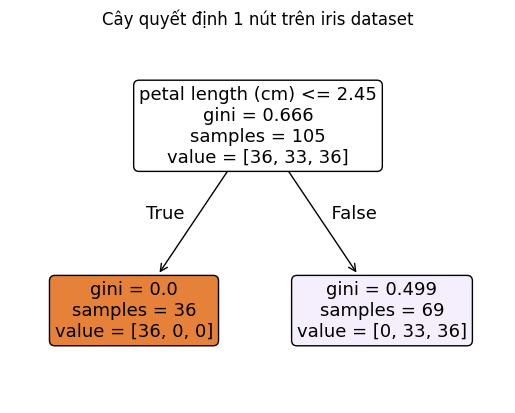

In [53]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Huấn luyện mô hình cây quyết định
clf = DecisionTreeClassifier(max_depth=1, random_state=42)
clf.fit(X_train, Y_train)

# Vẽ cây quyết định
plt.figure()
plot_tree(clf,
          feature_names=iris_dataset.feature_names,
          filled=True,
          rounded=True)
plt.title("Cây quyết định 1 nút trên iris dataset")
plt.show()

Hình minh họa dưới đây thể hiện câu hỏi đầu tiên được lựa chọn trong quá trình xây dựng cây quyết định cho bài toán phân loại hoa *Iris*:

> **“Chiều dài cánh hoa (petal length) nhỏ hơn hoặc bằng 2.45 cm?”**

Đây là câu hỏi được đánh giá là tối ưu nhất, sau khi thuật toán duyệt qua toàn bộ bốn đặc trưng và tất cả các ngưỡng phân tách. Việc chọn ngưỡng 2.45 cm trên đặc trưng `petal length` cho phép chia tập dữ liệu thành hai phần như sau:

- *Nếu *petal length ≤ 2.45 cm*:
    - Toàn bộ 36 mẫu dữ liệu trong nhóm này đều thuộc về loài setosa tương ứng với chỉ số 0.
    - Xác suất dự đoán chính xác:  
  $$
  \frac{36}{36} = 100\%
  $$
    - Đây là một lá cây thuần tuyệt đối và có hệ số Gini bằng 0.

---

- *Nếu *petal length > 2.45 cm*:
    - Nhóm còn lại gồm 69 mẫu, phân bố như sau:
      - Loài Iris-setosa tương ứng với chỉ số 0: 0 mẫu
      - Loài Iris-versicolor tương ứng với chỉ số 1: 33 mẫu
      - Loài Iris-virginica tương ứng với chỉ số 2: 36 mẫu
    - Phân bố xác suất theo từng loài:  
  $$
  \frac{0}{69}, \quad \frac{33}{69}, \quad \frac{36}{69}
  $$
    - Đây là lá chưa thuần, cần tiếp tục phân tách.

Câu hỏi đầu tiên giúp tách hoàn toàn loài Iris-setosa* ra khỏi hai loài còn lại. Đây là một bước phân tách rất hiệu quả, thể hiện qua độ thuần tuyệt đối của nhánh `petal length ≤ 2.45 cm`. Tuy nhiên, nhóm còn lại với `petal length > 2.45 cm` vẫn còn chứa hai loài khác nhau với tỷ lệ gần tương đương, do đó cần phải tiếp tục xây dựng cây quyết định để phân biệt giữa *Iris-versicolor* và *Iris-virginica*.

Tiếp tục mở rộng cây: để mở rộng cây từ hai lá hiện có lên thành ba lá, thuật toán sẽ:

1. Tính toán câu hỏi tốt nhất trong mỗi nhánh con, bao gồm cả nhánh trái và nhánh phải.
2. So sánh mức giảm sai số mà mỗi câu hỏi đem lại.
3. Chọn câu hỏi có độ cải thiện lớn hơn để thực hiện phép chia tiếp theo.

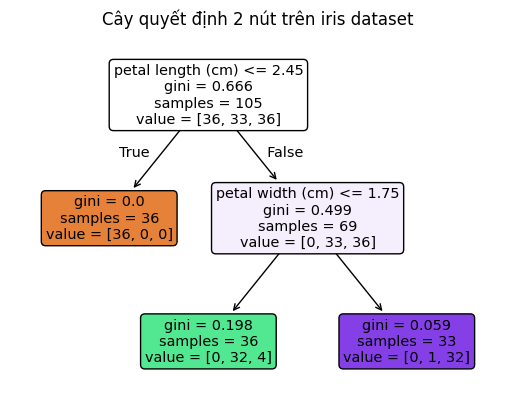

In [54]:
# Huấn luyện mô hình cây quyết định
clf = DecisionTreeClassifier(max_depth=2, random_state=42)
clf.fit(X_train, Y_train)

# Vẽ cây quyết định
plt.figure()
plot_tree(clf,
          feature_names=iris_dataset.feature_names,
          filled=True,
          rounded=True)
plt.title("Cây quyết định 2 nút trên iris dataset")
plt.show()

Bạn đọc có thể thấy rằng câu hỏi tiếp theo để phân chia dữ liệu một cách tốt nhất là "petal width nhỏ hơn hoặc bằng 1.75 cm có đúng không?" Câu hỏi được đặt ra với những bông hoa iris có petal length lớn hơn 2.45 cm.

- *Nếu *petal withd ≤ 1.75 cm*:
    - Có 36 mẫu dữ liệu trong nhóm này và được phân bố như sau:
      - Loài Iris-setosa tương ứng với chỉ số 0: 0 mẫu
      - Loài Iris-versicolor tương ứng với chỉ số 1: 32 mẫu
      - Loài Iris-virginica tương ứng với chỉ số 2: 4 mẫu
    - Phân bố xác suất theo từng loài:  
  $$
  \frac{0}{36}, \quad \frac{32}{36}, \quad \frac{4}{36}
  $$
    - Đây là một lá đã tương đối thuần với Gini bằng 0.198

---

- *Nếu *petal withd > 1.75 cm*:
    - Có 33 mẫu dữ liệu trong nhóm này và được phân bố như sau:
      - Loài Iris-setosa tương ứng với chỉ số 0: 0 mẫu
      - Loài Iris-versicolor tương ứng với chỉ số 1: 1 mẫu
      - Loài Iris-virginica tương ứng với chỉ số 2: 32 mẫu
    - Phân bố xác suất theo từng loài:
  $$
  \frac{0}{33}, \quad \frac{1}{33}, \quad \frac{32}{33}
  $$
    - Đây là một lá đã khá thuần với Gini bằng 0.059

Việc phân vùng sẽ được tiếp tục nếu mức độ thuần chưa đáp ứng được yêu cầu của người xây dựng mô hình. Tuy nhiên, bạn đọc cũng cần lưu ý rằng nếu tiếp tục lặp cho đến khi số lá trong cây quyết định bằng số mẫu trong dữ liệu huấn luyện mô hình, mỗi lá chỉ chứa các điểm dữ liệu có cùng giá trị mục tiêu — tức là thuộc về cùng một lớp . Một nút lá được gọi là thuần khiết nếu toàn bộ các điểm dữ liệu tại đó đều có chung một giá trị mục tiêu. Phân vùng cuối cùng thu được từ quá trình này được minh họa trong hình phía dưới:

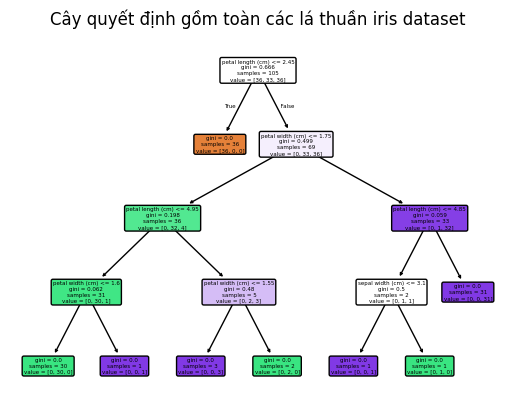

In [55]:
# Huấn luyện mô hình cây quyết định
clf = DecisionTreeClassifier(max_depth=4, random_state=42)
clf.fit(X_train, Y_train)

# Vẽ cây quyết định
plt.figure()
plot_tree(clf,
          feature_names=iris_dataset.feature_names,
          filled=True,
          rounded=True)
plt.title("Cây quyết định gồm toàn các lá thuần iris dataset")
plt.show()

Về mặt nguyên lý, bất kể mức độ phức tạp của dữ liệu đầu vào cũng như bản chất của bài toán (phân loại hay hồi quy), nếu quá trình phân chia được lặp lại đủ sâu, cây quyết định cuối cùng sẽ đạt được trạng thái thuần khiết hoàn toàn. Nói cách khác, mỗi nút lá sẽ chỉ chứa các điểm dữ liệu có cùng một giá trị mục tiêu. Tuy nhiên, một cây quyết định đạt được độ thuần khiết tuyệt đối như vậy thường có nguy cơ cao bị quá khớp (overfitting) với dữ liệu huấn luyện. Vấn đề này sẽ được phân tích chi tiết trong các phần sau.

Việc đưa ra dự đoán cho một điểm dữ liệu mới được thực hiện thông qua quá trình xác định vùng của không gian đặc trưng mà điểm đó thuộc về. Cụ thể, cây được duyệt từ nút gốc, đi xuống theo nhánh trái hoặc phải tùy thuộc vào kết quả của các phép kiểm tra tại từng nút. Khi đến nút lá, mô hình đưa ra dự đoán dựa trên giá trị mục tiêu chiếm đa số trong nút lá đó (trong bài toán phân loại) hoặc giá trị mục tiêu duy nhất (nếu nút là thuần khiết).

Trong trường hợp hồi quy, cây quyết định vẫn có thể được sử dụng với phương pháp hoàn toàn tương tự. Sau khi duyệt cây và xác định nút lá mà điểm dữ liệu mới rơi vào, dự đoán đầu ra được tính bằng giá trị trung bình của các mục tiêu huấn luyện tương ứng với các điểm dữ liệu trong nút lá đó.

#### Kiểm soát độ phức tạp của cây quyết định
<hr>

Như đã phân tích ở trên, việc tiếp tục xây dựng cây quyết định cho đến khi tất cả các nút lá đều đạt độ thuần khiết tuyệt đối thường dẫn đến các mô hình có độ phức tạp cao và biểu hiện rõ hiện tượng quá khớp với dữ liệu huấn luyện. Sự hiện diện của các lá thuần khiết đồng nghĩa với việc cây đạt độ chính xác tuyệt đối (100%) trên tập huấn luyện, do mỗi điểm dữ liệu đều rơi vào một lá mà lớp mục tiêu chiếm đa số trùng khớp với nhãn thực tế.

Hiện tượng quá khớp này có thể dễ dàng quan sát được ngay cả trên tập dữ liệu iris, trong đó một cây quyết định với 8 lá đã có thể đạt được độ chính xác tuyệt đối trên tập huấn luyện. Tuy nhiên, điều đáng lưu ý là một số nút lá trong cây chỉ chứa từ một đến hai quan sát. Điều này phản ánh khả năng tổng quát hóa kém của mô hình: các quyết định mà mô hình đưa ra phụ thuộc quá nhiều vào dữ liệu huấn luyện cụ thể, thay vì nắm bắt được cấu trúc tổng thể và các quy luật khái quát. Đây chính là đặc điểm điển hình của một mô hình bị overfitting.

Để ngăn chặn hiện tượng overfitting, hai chiến lược phổ biến thường được áp dụng: (1) dừng sớm quá trình xây dựng cây, hoặc (2) xây dựng cây đầy đủ trước, sau đó rút gọn bằng cách loại bỏ các nhánh ít thông tin (cắt tỉa cây). Trong thực hành, dừng sớm thường dễ triển khai hơn và mang lại hiệu quả kiểm soát độ phức tạp mô hình ngay trong quá trình huấn luyện.

Các tiêu chí thường được sử dụng trong dừng sớm bao gồm đồng thời các tiêu chí:

 - Giới hạn số lượng nút lá tối đa;
 - Yêu cầu một số lượng quan sát tối thiểu tại một nút để tiếp tục phép chia.

Trong thư viện scikit-learn, cây quyết định được triển khai thông qua hai lớp là DecisionTreeClassifier (cho phân loại) và DecisionTreeRegressor (cho hồi quy). Cần lưu ý rằng scikit-learn chỉ hỗ trợ dừng sớm và không hỗ trợ cắt tỉa cây sau khi xây dựng.

Để minh họa hiệu quả của chiến lược tỉa trước, chúng ta sẽ áp dụng mô hình cây quyết định trên tập dữ liệu về bệnh thư. Như thường lệ, dữ liệu được nhập vào và chia thành hai phần: tập huấn luyện và tập kiểm tra. Mô hình cây đầu tiên được huấn luyện với các thiết lập mặc định, tức là xây dựng một cây phát triển hoàn toàn đến khi tất cả các nút lá đều thuần khiết.

In [56]:
from sklearn.tree import DecisionTreeClassifier

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)

tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.937


Đúng như dự đoán, khi cây quyết định được phát triển đến mức tất cả các nút lá đều thuần khiết, mô hình đạt độ chính xác tuyệt đối trên tập huấn luyện. Điều này xảy ra bởi vì cây đã được phép phát triển đủ sâu để ghi nhớ toàn bộ các nhãn trong tập huấn luyện một cách hoàn hảo. Tuy nhiên, khi đánh giá trên tập kiểm tra, độ chính xác của mô hình suy giảm đôi chút — thấp hơn so với các mô hình tuyến tính đã được phân tích trước đó, vốn đạt khoảng 95% độ chính xác. Sự chênh lệch giữa hiệu suất trên tập huấn luyện và kiểm tra phản ánh rõ rệt hiện tượng quá khớp.

Trong trường hợp không áp dụng bất kỳ giới hạn nào đối với độ sâu, cây quyết định có thể phát triển đến mức rất sâu và phức tạp, dẫn đến khả năng khái quát hóa kém trên dữ liệu chưa từng thấy. Đây là lý do vì sao việc dừng sớm trở nên cần thiết — vì phương pháp này cho phép kiểm soát quá trình học bằng cách dừng việc mở rộng cây trước khi mô hình đạt được độ khớp hoàn hảo với dữ liệu huấn luyện.

Một chiến lược phổ biến để thực hiện tỉa trước là thiết lập giới hạn đối với độ sâu tối đa của cây. Trong ví dụ này, chúng ta áp dụng tham số `max_depth = 4`, nghĩa là cây chỉ được phép thực hiện tối đa câu hỏi kiểm tra liên tiếp để đưa ra dự đoán. Giới hạn này làm giảm mức độ phức tạp của cây, từ đó giúp giảm hiện tượng quá khớp. Hệ quả là độ chính xác trên tập huấn luyện có thể giảm nhẹ, nhưng hiệu suất trên tập kiểm tra thường được cải thiện nhờ khả năng khái quát hóa tốt hơn.

In [57]:
tree = DecisionTreeClassifier(max_depth=4, random_state=42)
tree.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 0.988
Accuracy on test set: 0.944


#### Phân tích cây quyết định
Chúng ta có thể trực quan hóa cây bằng cách sử dụng hàm `export_graphviz` từ mô-đun `tree` của thư viện sklearn. Hàm này ghi một tệp ở định dạng tệp dot, là một định dạng tệp văn bản để lưu trữ các đồ thị. Chúng ta đặt một tùy chọn để tô màu các nút để phản ánh lớp đa số trong mỗi nút và truyền tên lớp và tên đặc trưng để cây có thể được dán nhãn đúng cách:

In [58]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="tree.dot", class_names=["malignant", "benign"],
                feature_names=cancer.feature_names, impurity=False, filled=True)

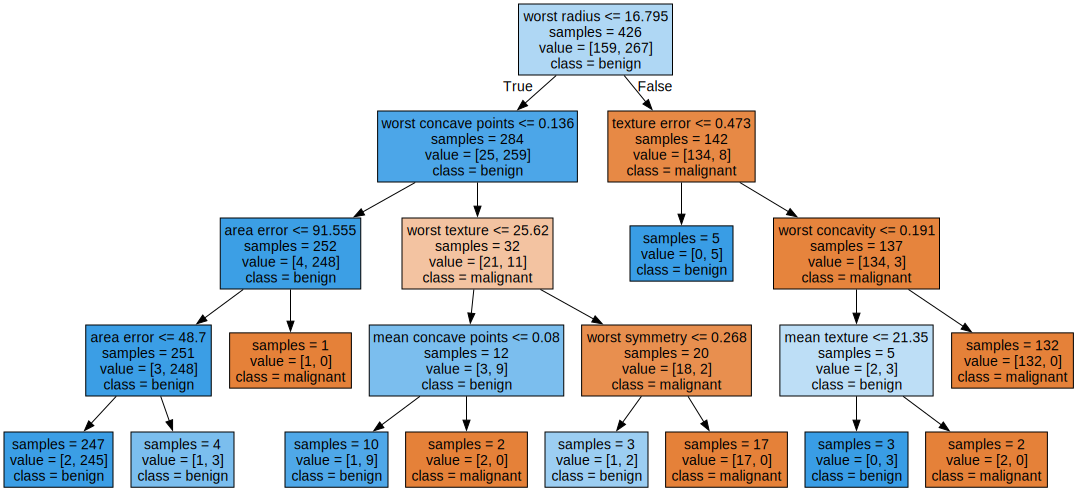

In [59]:
import graphviz
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

Việc trực quan hóa cây cung cấp cho chúng ta một cái nhìn toàn diện về cách thuật toán đưa ra dự đoán, và là một ví dụ điển hình về một thuật toán học máy có thể dễ dàng giải thích cho những người không có nền tảng về mô hình hay thuật toán. Tuy nhiên, ngay cả với một cây có độ sâu bốn, như được thấy ở đây, cũng đã có sự phức tạp tương đối. Các cây có độ sâu lớn hơn thậm chí sẽ gây khó khăn hơn để nắm bắt hơn. 

Tham số `samples` được hiển thị trong mỗi nút trong hình vẽ ở trên cho biết số lượng mẫu mỗi nút, trong khi `value` cho biết số lượng mẫu cho mỗi lớp. Theo các nhánh sang phải, chúng ta thấy rằng  khi `worst radius` lớn hơn 16.795` sẽ tạo ra một nút chỉ chứa 8 mẫu lành tính nhưng 134 mẫu ác tính. Phần còn lại của phía này của cây sau đó sử dụng một số phân biệt tinh vi hơn để tách ra 8 mẫu lành tính còn lại này. Trong số 142 mẫu đi sang phải trong lần chia ban đầu, hầu như tất cả đều nằm trong lá ở phía xa bên phải. 

Đi sang trái ở gốc của câu quyết định, khi `worst radius` nhỏ hơn hoặc bằng 16.795, chúng ta có một nút với 25 mẫu ác tính và 259 mẫu lành tính. Tiếp tục đi xuống phía dưới, gần như tất cả các mẫu lành tính đều nằm trong các lá ở phía bên trái, trong khi các lá còn lại với hầu hết các lá khác chứa rất ít mẫu.

#### Tầm quan trọng của đặc trưng trong cây
<hr>

Thay vì xem xét toàn bộ cây, điều này có thể gây khó khăn khi kích thước cây quá lớn, trong các dữ liệu thường có một số thuộc tính quan trọng sẽ quyết định kết quả của cây. Do đó, người xây dựng mô hình có thể xây dựng các chỉ tiêu nhằm đánh giá mức độ quan trọng của mỗi đặc trưng đối với quyết định mà một cây đưa ra. Chỉ tiêu thường là một giá trị từ 0 đến 1 cho mỗi đặc trưng, trong đó 0 có nghĩa là "hoàn toàn không được sử dụng" và 1 có nghĩa là "dự đoán hoàn hảo biến mục tiêu". Chỉ tiêu đánh giá mức độ quan trọng của các đặc trưng luôn có tổng bằng 1: 

In [60]:
print("Feature importances:\n{}".format(tree.feature_importances_))

Feature importances:
[0.         0.01258462 0.         0.         0.         0.
 0.         0.0141577  0.         0.         0.         0.04839825
 0.         0.01261296 0.         0.         0.         0.
 0.         0.         0.72682851 0.03323127 0.         0.
 0.         0.         0.018188   0.1221132  0.01188548 0.        ]


Chúng ta có thể trực quan hóa tầm quan trọng của đặc trưng theo cách tương tự như cách chúng ta trực quan hóa các hệ số trong mô hình tuyến tính:

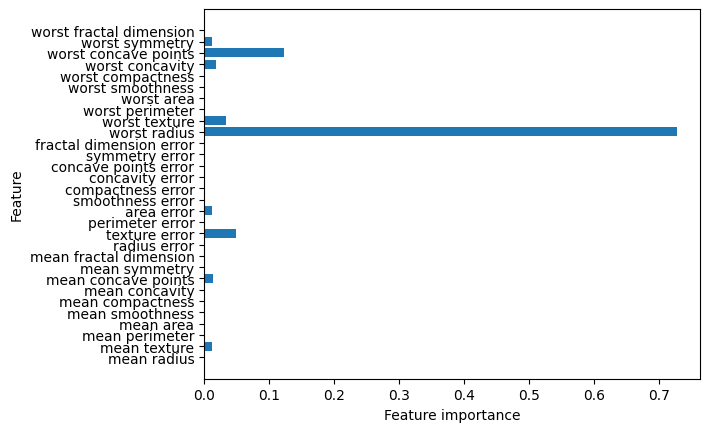

In [61]:
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")

plot_feature_importances_cancer(tree)

**Hình 2-28. Tầm quan trọng của đặc trưng được tính toán từ một cây quyết định đã học trên tập dữ liệu Ung thư vú**

Ở đây chúng ta thấy rằng đặc trưng được sử dụng trong lần chia trên cùng ("worst radius") là đặc trưng quan trọng nhất cho đến nay. Điều này xác nhận quan sát của chúng ta trong việc phân tích cây rằng cấp độ đầu tiên đã phân tách hai lớp khá tốt. 

Tuy nhiên, nếu một đặc trưng có `feature_importance` thấp, điều đó không có nghĩa là đặc trưng này không có thông tin. Nó chỉ có nghĩa là đặc trưng đó không được cây chọn, có thể là do một đặc trưng khác mã hóa cùng một thông tin. 

Ngược lại với các hệ số trong các mô hình tuyến tính, tầm quan trọng của đặc trưng luôn dương và không mã hóa lớp nào mà một đặc trưng chỉ ra. Tầm quan trọng của các đặc trưng cho chúng ta biết rằng "worst radius" là quan trọng, nhưng không cho biết liệu một bán kính cao có chỉ ra một mẫu là lành tính hay ác tính hay không. Trên thực tế, có thể không có một mối quan hệ đơn giản như vậy giữa các đặc trưng và lớp, như bạn có thể thấy trong ví dụ sau (Hình 2-29 và 2-30): 

Feature importances: [0. 1.]


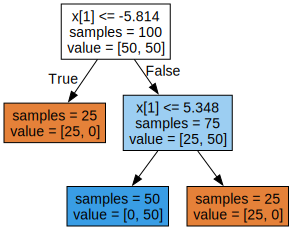

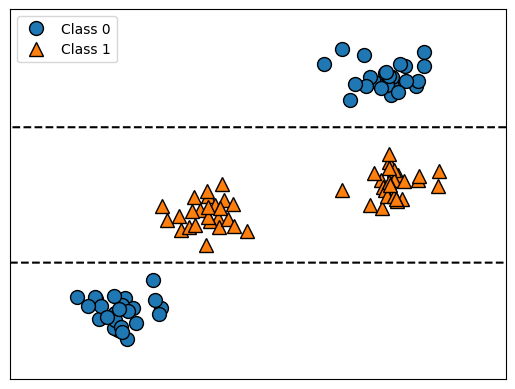

In [62]:
tree = mglearn.plots.plot_tree_not_monotone()
display(tree)

**Hình 2-29. Một tập dữ liệu hai chiều trong đó đặc trưng trên trục y có mối quan hệ không đơn điệu với nhãn lớp, và các ranh giới quyết định được tìm thấy bởi một cây quyết định**

Biểu đồ cho thấy một tập dữ liệu với hai đặc trưng và hai lớp. Ở đây, tất cả thông tin đều nằm trong `X[1]`, và `X[0]` hoàn toàn không được sử dụng. Nhưng mối quan hệ giữa `X[1]` và lớp đầu ra không đơn điệu, có nghĩa là chúng ta không thể nói "giá trị cao của X[0] có nghĩa là lớp 0, và giá trị thấp có nghĩa là lớp 1" (hoặc ngược lại).

#### Cây quyết định hồi quy
<hr>

Một ưu điểm của mô hình cây quyết định so với mô hình tuyến tính là có thể áp dụng trực tiếp cho bài toán phân loại hay hồi quy mà không cần thay đổi quá nhiều về nguyên lý hoạt động. Nói cách khác cây quyết định hồi quy hoạt động hoàn toàn tương tự như cây quyết định phân loại, chỉ khác một chút về chỉ tiêu đánh giá sai số của mô hình và cách thức đưa ra dự đoán. Nếu như cây quyết định hồi quy lựa chọn câu hỏi tốt nhất dựa sự thay đổi của chỉ số Gini hoặc Entropy thì cây quyết định hồi quy dựa trên sai số bình phương trung bình (MSE) hoặc sai số tuyệt đối trung bình (MAE). Về cách thức đưa ra giá trị dự đoán cho mỗi lá, cây quyết định hồi quy sử dụng giá trị trung bình hoặc trung vị của giá trị đầu ra của các mẫu trong lá, thay vì cơ chế majority vote như trong cây quyết định phân loại.

Hàm số thực hiện xây dựng cây quyết định hồi quy của thư viện `sklearn` là `DecisionTreeRegressor`. Chúng ta sẽ xem xét cách mô hình cây quyết định hồi quy hoạt động trên dữ liệu về giá nhà tại Boston.

In [63]:
import pandas as pd
house_price = pd.read_csv("data/Boston.csv")
house_price

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


Chúng ta sẽ so sánh hiệu quả của mô hình cây quyết định hồi quy với mô hình hồi quy tuyến tính đã xây. Khác với phần trước, biến mục tiêu được sử dụng là logarit của giá nhà thay vì giá nhà ban đầu. Điều này không tạo ra sự khác biệt cho mô hình cây quyết định hồi quy, nhưng sẽ tạo ra sự khác biệt lớn cho mô hình hồi quy tuyến tính. Sau khi huấn luyện các mô hình và đưa ra dự đoán, chúng ta áp dụng hàm mũ cơ số tự nhiên để có được giá nhà ban đầu.

In [94]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

df = pd.read_csv("data/Boston.csv")
y, X = df["medv"], df.drop(columns=["medv"])

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

tree = DecisionTreeRegressor().fit(X_train, y_train)

pred_tree_train = tree.predict(X_train)
pred_tree_test = tree.predict(X_test)

print("Hệ số R-squared cây quyết định - tập huấn luyện: {:.2f}".format(r2_score(pred_tree_train, y_train)))
print("Hệ số R-squared cây quyết định - tập kiểm tra: {:.2f}".format(r2_score(pred_tree_test, y_test)))

Hệ số R-squared cây quyết định - tập huấn luyện: 1.00
Hệ số R-squared cây quyết định - tập kiểm tra: 0.59


Mô hình cây quyết định trong bài toán hồi quy, khi không giới hạn độ sâu, thường dẫn đến hiện tượng khớp quá mức với dữ liệu huấn luyện, thể hiện qua hệ số R-squared đạt 100% trên tập huấn luyện nhưng chỉ 59% trên tập kiểm tra. Việc giới hạn độ sâu cây là một biện pháp hiệu quả nhằm kiểm soát độ phức tạp mô hình. Khi áp dụng ràng buộc này, sai số huấn luyện tăng nhẹ do giảm khả năng ghi nhớ dữ liệu, trong khi sai số kiểm tra giảm, phản ánh sự cải thiện trong khả năng tổng quát hóa.

In [110]:
tree = DecisionTreeRegressor(min_samples_split = 30).fit(X_train, y_train)
linear_reg = LinearRegression().fit(X_train, y_train)

pred_tree_train = tree.predict(X_train)
pred_lr_train = linear_reg.predict(X_train)

pred_tree_test = tree.predict(X_test)
pred_lr_test = linear_reg.predict(X_test)

print("Hệ số R-squared cây quyết định - tập huấn luyện: {:.2f}".format(r2_score((pred_tree_train), y_train)))
print("Hệ số R-squared cây quyết định - tập kiểm tra: {:.2f}".format(r2_score((pred_tree_test), y_test)))

print("Hệ số R-squared mô hình tuyến tính - tập kiểm tra: {:.2f}".format(r2_score((pred_lr_train), y_train)))
print("Hệ số R-squared mô hình tuyến tính - tập kiểm tra: {:.2f}".format(r2_score((pred_lr_test), y_test)))

Hệ số R-squared cây quyết định - tập huấn luyện: 0.90
Hệ số R-squared cây quyết định - tập kiểm tra: 0.61
Hệ số R-squared mô hình tuyến tính - tập kiểm tra: 0.70
Hệ số R-squared mô hình tuyến tính - tập kiểm tra: 0.50


Khi được kiểm soát độ phức tạp hợp lý, mô hình cây quyết định có thể đạt hiệu suất dự đoán tương đương với mô hình hồi quy tuyến tính. Trong cây quyết định ở trên, chúng tôi đã giới hạn số lượng tối thiểu dữ liệu phải có tại một nút để thực hiện phân tách bằng tham số `min_samples_split`. Bằng cách đặt tham số này bằng 30, cây quyết định sẽ không tính toán việc phân chia dữ liệu tại các nút có ít hơn 30 mẫu. Có thể thấy rằng sai số trên tập dữ liệu kiểm tra mô hình đã được cải thiện, từ 59% lên 61%. Khi sử dụng mô hình tuyến tính thông thường trên dữ liệu Boston, hệ số R-squared trên dữ liệu huấn luyện mô hình và kiểm tra mô hình lần lượt là 70% và 50%. Có thể thấy rằng mô hình tuyến tính thông thường không so sánh được với cây quyết định hồi quy trên dữ liệu giá nhà Boston về khả năng dự đoán.

Sự khác biệt về khả năng dự đoán của cây quyết định và mô hình hồi quy tuyến tính chủ yếu phụ thuộc vào bản chất của mối quan hệ giữa các đặc trưng và biến mục tiêu: nếu quan hệ là tuyến tính, mô hình tuyến tính thường cho kết quả tốt hơn; ngược lại, nếu quan hệ phi tuyến, cây quyết định có thể vượt trội hơn nhờ khả năng mô hình hóa linh hoạt.

#### Thảo luận về điểm mạnh, điểm yếu và tham số của cây quyêt định
<hr>

Như đã đề cập ở phần trước, các tham số kiểm soát độ phức tạp trong mô hình cây quyết định thuộc nhóm các tham số dừng sớm quá trình xây dựng cây. Trong mô-đun tree của thư viện scikit-learn, các tham số này bao gồm: max_depth (độ sâu tối đa của cây), max_leaf_nodes (số lượng nút lá tối đa), và min_samples_leaf (số lượng mẫu tối thiểu tại mỗi nút lá). Việc điều chỉnh các tham số này đóng vai trò quan trọng trong việc ngăn ngừa hiện tượng khớp quá mức overfitting.

Cây quyết định sở hữu một số ưu điểm nổi bật so với các thuật toán học máy có giám sát khác đã được đề cập:

- Thứ nhất, mô hình cây có thể được trực quan hóa một cách dễ dàng và do đó có khả năng diễn giải cao. Điều này đặc biệt hữu ích trong các tình huống cần truyền đạt kết quả cho những đối tượng không chuyên về kỹ thuật, đặc biệt là khi cây có kích thước nhỏ.
- Thứ hai, cây quyết định hoàn toàn không nhạy cảm với việc chia tỷ lệ của dữ liệu đầu vào. Mỗi đặc trưng được xử lý riêng biệt thông qua các ngưỡng chia tách cụ thể, và các phép so sánh này không phụ thuộc vào độ lớn tuyệt đối của đặc trưng. Do đó, không cần các bước tiền xử lý như chuẩn hóa. Điều này cho phép mô hình làm việc hiệu quả ngay cả khi các đặc trưng được biểu diễn trên các thang đo khác nhau.

Tuy nhiên, hạn chế lớn nhất của cây quyết định là ngay cả khi đã áp dụng các kỹ thuật dừng sớm, mô hình vẫn có xu hướng khớp quá mức với dữ liệu huấn luyện, dẫn đến khả năng tổng quát hóa kém hơn so với nhiều thuật toán khác. Vì lý do đó, trong thực tiễn, người ta hiếm khi sử dụng một cây quyết định đơn lẻ. Thay vào đó, các phương pháp tổng hợp nhiều mô hình, hay *ensemble learning* dựa trên nhiều cây quyết định thường được ưa chuộng hơn, như được trình bày trong các phần tiếp theo.

### Tập hợp cây quyết định
<hr>

Tổng hợp mô hình là một phương pháp tiếp cận trong học máy nhằm kết hợp nhiều mô hình học khác nhau để tạo ra một mô hình dự đoán tổng thể có hiệu suất vượt trội hơn so với từng mô hình riêng lẻ. Phương pháp này tận dụng lợi thế của sự đa dạng trong các mô hình thành phần để cải thiện độ chính xác, tính ổn định và khả năng tổng quát hóa trên dữ liệu.

Trong số nhiều kỹ thuật tổng hợp được nghiên cứu và ứng dụng trong học máy, hai phương pháp đã được chứng minh là có hiệu quả cao trên nhiều loại tập dữ liệu, bao gồm cả bài toán phân loại và hồi quy. Cả hai phương pháp này đều sử dụng cây quyết định làm đơn vị cấu thành cơ bản:

- Rừng ngẫu nhiên, hay *random forests*, là phương pháp tổng hợp dựa trên nhiều cây quyết định được huấn luyện trên các mẫu con khác nhau được lấy ngẫu nhiên từ tập dữ liệu huấn luyện. Việc sử dụng ngẫu nhiên hóa cả ở mức dữ liệu và đặc trưng giúp mô hình giảm thiểu phương sai và cải thiện khả năng khái quát hóa.
- Học tăng cường, hay *boosted decision trees*, là phương pháp tổng hợp dựa trên kỹ thuật boosting, trong đó các cây được xây dựng tuần tự và mỗi cây mới học từ phần sai số, hay còn gọi là phần dư, của tổ hợp các cây trước đó. Phương pháp này thường đạt hiệu suất rất cao, đặc biệt khi được tinh chỉnh cẩn thận.

Cả hai phương pháp trên đều khai thác linh hoạt đặc điểm của cây quyết định để tạo nên các hệ thống dự đoán mạnh mẽ, và đã trở thành nền tảng trong nhiều hệ thống học máy hiện đại.

#### Rừng ngẫu nhiên
<hr>

Như đã phân tích ở phần trước, một trong những hạn chế cơ bản của mô hình cây quyết định là xu hướng khớp quá mức với dữ liệu huấn luyện, đặc biệt khi không có giới hạn về độ sâu hoặc số lượng mẫu tối thiểu tại các nút. Thuật toán rừng ngẫu nhiên được phát triển như một giải pháp hiệu quả để khắc phục vấn đề này, bằng cách kết hợp nhiều cây quyết định trong một mô hình tổng hợp nhằm tăng cường độ ổn định và khả năng tổng quát hóa của dự đoán.

Về bản chất, mô hình rừng ngẫu nhiên là một tập hợp của nhiều cây quyết định, trong đó mỗi cây được xây dựng theo một cách khác biệt so với các cây còn lại. Ý tưởng cốt lõi là: mặc dù mỗi cây riêng lẻ có thể dự đoán tương đối tốt, nhưng cũng có khả năng bị khớp quá mức với một phần của dữ liệu huấn luyện. Tuy nhiên, nếu ta kết hợp dự đoán của nhiều cây, trong đó mỗi cây bị sai sót theo những cách khác nhau, thì trung bình (đối với hồi quy) hoặc lựa chọn theo đa số (đối với phân loại), ta có thể giảm thiểu sai số tổng thể do khớp quá mức. Sự giảm thiểu này, đồng thời vẫn bảo toàn năng lực dự đoán của từng cây, có thể được chứng minh một cách chặt chẽ trong khuôn khổ lý thuyết học thống kê.

Để thực hiện chiến lược tổng hợp nêu trên, điều quan trọng là các cây trong rừng phải vừa có chất lượng dự đoán đủ tốt, vừa đa dạng. Sự đa dạng giữa các cây được đảm bảo thông qua việc đưa yếu tố ngẫu nhiên vào quá trình huấn luyện. Tên gọi "rừng ngẫu nhiên" bắt nguồn từ chính cơ chế này. Có hai nguồn ngẫu nhiên chính được sử dụng trong quá trình xây dựng rừng:

- Ngẫu nhiên hóa dữ liệu huấn luyện cho từng cây: mỗi cây được huấn luyện trên một mẫu con được lấy với hoàn lại, hay bootstrapping, từ tập dữ liệu ban đầu. Điều này đảm bảo rằng các cây được huấn luyện trên các tập dữ liệu khác nhau.

- Ngẫu nhiên hóa lựa chọn đặc trưng tại mỗi phép chia: mỗi khi xây dựng cây, chỉ **một tập con ngẫu nhiên các đặc trưng** được xem xét khi tìm chia tách tốt nhất, thay vì xét toàn bộ tập đặc trưng. Kỹ thuật này làm tăng sự sai khác giữa các cây và giảm tương quan giữa các dự đoán của chúng.

Trong các phần tiếp theo, chúng ta sẽ đi sâu vào từng cơ chế ngẫu nhiên nêu trên và khảo sát chi tiết hơn quá trình xây dựng mô hình rừng ngẫu nhiên cũng như đánh giá hiệu quả của mô hình trên các tập dữ liệu thực tế.

Để xây dựng một mô hình rừng ngẫu nhiên, người xây dựng mô hình cần xác định số lượng cây thành phần được sử dụng, được điều khiển thông qua tham số `n_estimators` trong `RandomForestRegressor` hoặc `RandomForestClassifier`. Giả sử ta lựa chọn xây dựng một rừng ngẫu nhiên gồm 10 cây. Mỗi cây trong rừng được xây dựng độc lập với các cây còn lại và có sự ngẫu nhiên hóa riêng biệt trong quá trình huấn luyện nhằm tạo ra sự đa dạng giữa các cây:

Bước thứ nhất trong xây dựng mô hình là lấy mẫu lặp từ dữ liệu huấn luyện mô hình. Giả sử tập dữ liệu huấn luyện bao gồm n quan sát, một mẫu lặp của tập dữ liệu này là một dữ liệu là có cùng kích thước được chọn một cách **ngẫu nhiên có lặp lại**. Điều này có nghĩa là một điểm dữ liệu có thể được chọn nhiều lần, trong khi một số điểm khác có thể không xuất hiện trong mẫu. Có thể chứng minh được rằng trung bình khoảng 1/3 dữ liệu huấn luyện thường không xuất hiện trong mỗi lần lấy mẫu lặp. Ví dụ, nếu tập dữ liệu gốc là `['a', 'b', 'c', 'd']`, một số mẫu lặp có thể là:
    - `['b', 'd', 'd', 'c']`, hoặc
    - `['d', 'a', 'd', 'a']`

Bước thứ hai là huấn luyện cây quyết định trên tập dữ liệu thu được từ lấy mẫu lặp. Tuy nhiên, khác với cây quyết định tiêu chuẩn, tại mỗi nút chia tách dữ liệu, thuật toán sẽ **chọn ngẫu nhiên một tập con các đặc trưng** để chia tách dữ liệu chứ không lựa chọn toàn bộ. Số lượng đặc trưng được lựa chọn ngẫu nhiên được quy định tham số `max_features`. Việc chọn đặc trưng được lặp lại **độc lập tại từng nút**, cho phép mỗi nút trong cây có thể sử dụng một tập đặc trưng khác nhau. Với mỗi dữ liệu, chúng ta xây dựng một cây quyết định với các yêu cầu dừng sớm được được quy định từ trước. Như vậy, hai cơ chế ngẫu nhiên chính của thuật toán rừng ngẫu nhiên là:
- Lấy mẫu lặp ngẫu nhiên để tạo ra tập dữ liệu khác nhau cho mỗi cây.
- Chọn đặc trưng ngẫu nhiên tại mỗi nút phân chia dữ liệu nhằm tạo ra các cấu trúc cây khác biệt.

Sự kết hợp của hai cơ chế này đảm bảo rằng các cây trong rừng là khác nhau, giúp cải thiện độ chính xác và giảm phương sai của mô hình tổng thể. Một tham số quan trọng trong mô hình rừng ngẫu nhiên là tham số `max_features` - tham số điều khiển mức độ ngẫu nhiên trong việc lựa chọn đặc trưng tại mỗi nút:
- Nếu `max_features = n_features` thì không có ngẫu nhiên trong việc chọn đặc trưng, và các cây được xây dựng có xu hướng giống nhau hơn do luôn cân nhắc tất cả các biến khi xây dựng cây quyết định.
- Nếu `max_features` nhỏ thì mỗi lần chia dữ liệu chỉ xét một vài đặc trưng được chọn ngẫu nhiên, làm tăng sự khác biệt giữa các cây nhưng cũng vì thế mà cần xây dựng các cây có độ sâu lớn hơn để đảm bảo khả năng dự đoán.

Để thực hiện dự đoán với một mô hình rừng ngẫu nhiên:
- Đối với bài toán hồi quy: mỗi cây trong rừng đưa ra một dự đoán riêng biệt, và dự đoán cuối cùng được tính bằng trung bình của tất cả các dự đoán.
- Đối với bài toán phân loại: mỗi cây đưa ra dự đoán cho mỗi giá trị một véc-tơ xác suất trên các nhãn của biến mục tiêu, và xác suất trung bình được tính trên toàn bộ cây. Nhãn đầu ra cuối cùng là nhãn có xác suất trung bình cao nhất.

Tóm lại, rừng ngẫu nhiên là một phương pháp học máy tổng hợp hiệu quả và mạnh mẽ, được ứng dụng phổ biến trong cả bài toán phân loại và hồi quy. Bằng cách kết hợp nhiều cây quyết định có độ đa dạng cao, rừng ngẫu nhiên có khả năng giảm phương sai của mô hình dự đoán mà vẫn duy trì được khả năng dự đoán của từng cây quyết định thành phần. Điều này giúp cải thiện độ chính xác và độ ổn định của mô hình trên dữ liệu mới, đồng thời giảm thiểu nguy cơ khớp quá mức.

Trong phần tiếp theo, chúng ta sẽ tiến hành minh chứng thực nghiệm cho hiệu quả của phương pháp này thông qua hai ví dụ cụ thể:

- Bài toán hồi quy: Dự đoán giá nhà tại Boston.
- Bài toán phân loại: Dự đoán khả năng mắc ung thư dựa trên tập dữ liệu về đặc trưng tế bào.

Những ví dụ này sẽ làm rõ cách thức hoạt động, hiệu quả dự đoán và khả năng tổng quát hóa của mô hình rừng ngẫu nhiên trong các tình huống thực tế khác nhau.

In [135]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [20, 50, 100],
    'max_depth': [None, 10, 20],
    'min_samples_split': [None, 2, 5, 10],
    'min_samples_leaf': [None, 1, 2, 4],
    'max_features': [None, 'sqrt', 10]
}

grid_search = GridSearchCV(
    RandomForestRegressor(random_state=0),
    param_grid,
    cv=5,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1
)

grid_search.fit(X_train, y_train)
print(grid_search.best_estimator_)

RandomForestRegressor(max_features='sqrt', n_estimators=50, random_state=0)


Chúng ta sử dụng `RandomForestRegressor` để xây dựng mô hình rừng ngẫu nhiên hồi quy:

In [143]:
from sklearn.ensemble import RandomForestRegressor

df = pd.read_csv("data/Boston.csv")
y, X = df["medv"], df.drop(columns=["medv"])

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

forest = RandomForestRegressor(n_estimators = 50,
                      random_state=0)
forest.fit(X_train, y_train)

pred_forest_train = forest.predict(X_train)
pred_forest_test = forest.predict(X_test)

print("Hệ số R-squared rừng ngẫu nhiên - tập huấn luyện: {:.2f}".format(r2_score(pred_forest_train, y_train)))
print("Hệ số R-squared rừng ngẫu nhiên - tập kiểm tra: {:.2f}".format(r2_score(pred_forest_test, y_test)))

print("Hệ số R-squared cây quyết định - tập huấn luyện: {:.2f}".format(r2_score(pred_tree_train, y_train)))
print("Hệ số R-squared cây quyết định - tập kiểm tra: {:.2f}".format(r2_score(pred_tree_test, y_test)))

Hệ số R-squared rừng ngẫu nhiên - tập huấn luyện: 0.98
Hệ số R-squared rừng ngẫu nhiên - tập kiểm tra: 0.73
Hệ số R-squared cây quyết định - tập huấn luyện: 0.90
Hệ số R-squared cây quyết định - tập kiểm tra: 0.61


Có thể thấy rằng khi chúng ta kết hợp kết quả của 50 cây quyết định khác nhau, hệ số `R-squared` trên tập huấn luyện và tập kiểm tra đều tăng. Đúng như dự đoán từ trước, rừng ngẫu nhiên vẫn đảm bảo khả năng dự đoán của các cây riêng lẻ và còn giảm bớt hiện tượng quá khớp của từng cây. Mức độ quan trọng của các thuộc tính đóng góp vào kết quả của rừng ngẫu nhiên được xác định như sau:

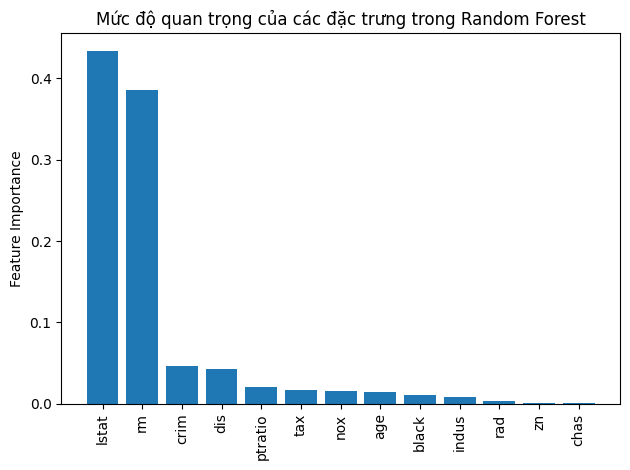

In [146]:
# Lấy tên các đặc trưng
feature_names = X.columns

# Lấy mức độ quan trọng từ mô hình đã huấn luyện
importances = forest.feature_importances_

# Sắp xếp các đặc trưng theo mức độ quan trọng giảm dần
indices = np.argsort(importances)[::-1]

# Vẽ biểu đồ
plt.title("Mức độ quan trọng của các đặc trưng trong mô hình rừng ngẫu nhiên")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), feature_names[indices], rotation=90)
plt.ylabel("Mức độ quan trọng")
plt.tight_layout()
plt.show()

Kết quả phân tích mức độ quan trọng của các đặc trưng trong mô hình rừng ngẫu nhiên trên dữ liệu Boston cho thấy rằng các biến như lstat - tỷ lệ % dân số thuộc tầng lớp thấp và `rm` - số lượng trung bình phòng ở trên mỗi đơn vị nhà ở - đóng vai trò nổi bật trong việc dự đoán giá nhà: 

- Biến `lstat` là đặc trưng có mức độ quan trọng cao nhất, phản ánh mối quan hệ ngược chiều mạnh giữa tỷ lệ dân cư thu nhập thấp và giá trị bất động sản.
- Biến `rm` cũng có ảnh hưởng đáng kể, cho thấy mối liên hệ dương với giá nhà: số phòng lớn hơn thường gắn với những ngôi nhà có giá trị cao hơn.
- Các biến khác như `crim` - tỷ lệ tội phạm, hay `ptratio` - tỷ lệ học sinh trên mỗi giáo viên, hay `dis` - khoảng cách tới các trung tâm việc làm cũng có đóng góp đáng kể vào dự đoán, nhưng ở mức độ thấp hơn.

Những kết quả này phù hợp với kỳ vọng kinh tế và xã hội, đồng thời củng cố tính diễn giải của mô hình rừng ngẫu nhiên đối với dữ liệu giá nhà.

Chúng ta sẽ xây dựng mô hình rừng ngẫu nhiên phân loại trên dữ liệu về ung thư:

In [154]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)

tree = DecisionTreeClassifier(max_depth = 3).fit(X_train, y_train)

forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)

print("Mô hình cây quyết định - độ chính xác dữ liệu huấn luyện: {:.3f}".format(tree.score(X_train, y_train)))
print("Mô hình cây quyết định - độ chính xác dữ liệu kiểm tra: {:.3f}".format(tree.score(X_test, y_test)))

print("Mô hình rừng ngẫu nhiên - độ chính xác dữ liệu huấn luyện: {:.3f}".format(forest.score(X_train, y_train)))
print("Mô hình rừng ngẫu nhiên - độ chính xác dữ liệu kiểm tra: {:.3f}".format(forest.score(X_test, y_test)))


Mô hình cây quyết định - độ chính xác dữ liệu huấn luyện: 0.977
Mô hình cây quyết định - độ chính xác dữ liệu kiểm tra: 0.923
Mô hình rừng ngẫu nhiên - độ chính xác dữ liệu huấn luyện: 1.000
Mô hình rừng ngẫu nhiên - độ chính xác dữ liệu kiểm tra: 0.972


Có thể thấy rằng rừng ngẫu nhiên cho chúng ta độ chính xác 97.2%, tốt hơn các mô hình tuyến tính hoặc một cây quyết định duy nhất, mà không cần điều chỉnh bất kỳ tham số nào. Chúng ta cũng có thể điều chỉnh các tham số cho rừng ngẫu nhiên như `max_features`, `max_depth`, ..., như chúng ta đã làm cho cây quyết định để đạt được độ chính xác cao hơn. Tuy nhiên, thường thì các tham số mặc định của rừng ngẫu nhiên đã hoạt động khá tốt. 

Tương tự như rừng ngẫu nhiên hổi quy, rừng ngẫu nhiên phân loại cũng cho phép tính toán mức độ quan trọng của đặc trưng, được tính toán bằng cách tổng tầm quan trọng của đặc trưng trong từng cây quyết định:

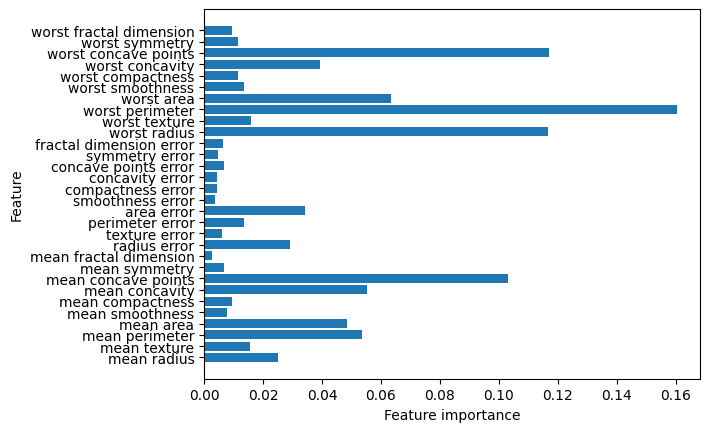

In [155]:
plot_feature_importances_cancer(forest)

Quan sát kết quả phân tích mức độ quan trọng của các đặc trưng cho thấy rằng mô hình rừng ngẫu nhiên có xu hướng gán giá trị khác không cho nhiều đặc trưng hơn so với một cây quyết định đơn lẻ. Tương tự như cây quyết định, rừng ngẫu nhiên vẫn đánh giá cao đặc trưng "worst radius", tuy nhiên, "worst perimeter" mới là đặc trưng mang thông tin giá trị nhất trong toàn bộ mô hình.  Chính sự ngẫu nhiên được đưa vào quá trình xây dựng rừng – thông qua việc lấy mẫu lặp và chọn ngẫu nhiên tập con các đặc trưng tại mỗi nút – giúp mô hình phải khám phá nhiều hướng giải thích khác nhau hơn một cây quyết định thông thường. Nhờ đó, rừng ngẫu nhiên có khả năng nắm bắt được cấu trúc tổng thể của dữ liệu một cách toàn diện hơn so với việc chỉ dựa vào một cây duy nhất - vốn dễ bị chi phối bởi một vài đặc trưng nổi bật.

Nhìn chung mô hình rừng ngẫu nhiên cho hồi quy và phân loại hiện là một trong những phương pháp học máy được sử dụng rộng rãi. Mô hình có các ưu điểm như đã trình bày ở phần trước, có khả năng tổng quát hóa dữ liệu tương đối tốt mà không cần điều chỉnh nhiều các tham số. Một ưu điểm của mô hình rừng ngẫu nhiên thậm chí còn vượt trội hơn so với các thuật toán học máy hiện đại nhất hiện nay là mô hình cho phép xử lý song song, nghĩa là các cây quyết định được xây dựng hoàn toàn độc lập. Ưu điểm này giúp cho thời gian huấn luyện mô hình rừng ngẫu nhiên nhanh hơn nhiều so với các mô hình học máy khác.

Trong môi trường tính toán hiện đại, hầu hết các máy tính đều được trang bị bộ xử lý đa lõi. Để tận dụng hiệu quả khả năng xử lý song song này, các hàm `RandomForestRegressor` hoặc `RandomForestClassifier` cung cấp tham số `n_jobs`, cho phép người dùng chỉ định số lượng lõi CPU được sử dụng trong quá trình huấn luyện. Việc tăng số CPU giúp giảm thời gian huấn luyện một cách tuyến tính, chẳng hạn sử dụng hai lõi có thể giúp rút ngắn thời gian huấn luyện một nửa. Tuy nhiên, việc đặt `n_jobs` vượt quá số lượng lõi vật lý thực của máy tính không mang lại lợi ích bổ sung. Để sử dụng toàn bộ tài nguyên tính toán, bạn đọc có thể thiết lập `n_jobs=-1`.

Vì rừng ngẫu nhiên là một thuật toán mang tính ngẫu nhiên cao — do sự ngẫu nhiên trong lấy mẫu bootstrap và lựa chọn đặc trưng tại mỗi nút — nên các mô hình được xây dựng có thể khác biệt đáng kể nếu random_state không được cố định. Việc chỉ định giá trị cụ thể cho random_state là điều cần thiết nếu người dùng mong muốn kết quả có thể tái lập. Mô hình càng sử dụng nhiều cây thì càng ít nhạy cảm với sự lựa chọn của random_state, nhờ cơ chế trung bình hóa kết quả dự đoán.

Rừng ngẫu nhiên nhìn chung hoạt động tốt trên các tập dữ liệu có kích thước lớn và cấu trúc đa dạng. Nhờ khả năng song song hóa tự nhiên, thuật toán này đặc biệt phù hợp với các hệ thống tính toán đa lõi. Tuy nhiên, trong những trường hợp dữ liệu có chiều rất cao và dạng thưa thớt — chẳng hạn như dữ liệu văn bản với biểu diễn Bag-of-Words hoặc TF-IDF — rừng ngẫu nhiên thường không đạt hiệu suất tối ưu. Trong bối cảnh này, các mô hình tuyến tính (như hồi quy logistic hoặc SVM tuyến tính) thường phù hợp hơn về cả hiệu suất và tốc độ.

Một số tham số chính cần được hiệu chỉnh trong rừng ngẫu nhiên bao gồm: n_estimators, max_features, và các tham số tỉa cây như max_depth. Tham số n_estimators điều khiển số lượng cây trong rừng; nhìn chung, số lượng cây càng lớn thì mô hình càng ổn định và có khả năng tổng quát hóa tốt hơn, nhờ vào việc giảm phương sai thông qua trung bình hóa. Tuy nhiên, hiệu quả gia tăng sẽ dần giảm theo số lượng cây, trong khi chi phí tính toán và bộ nhớ tăng đáng kể. Một nguyên tắc thực tiễn thường được áp dụng là sử dụng số lượng cây lớn nhất có thể trong phạm vi giới hạn về thời gian và tài nguyên.

Tham số max_features kiểm soát mức độ ngẫu nhiên trong việc lựa chọn đặc trưng tại mỗi nút phân chia. Giá trị nhỏ hơn của max_features làm tăng tính ngẫu nhiên giữa các cây và có thể giúp giảm hiện tượng khớp quá mức. Theo kinh nghiệm thực nghiệm, các giá trị mặc định được khuyến nghị là sqrt(n_features) cho bài toán phân loại và log2(n_features) cho bài toán hồi quy. Bên cạnh đó, việc điều chỉnh thêm các tham số như max_leaf_nodes cũng có thể góp phần cải thiện hiệu suất tổng thể, đồng thời giảm thiểu yêu cầu về bộ nhớ và thời gian huấn luyện.



#### Học tăng cường

Cây hồi quy tăng cường độ dốc là một phương pháp tập hợp khác kết hợp nhiều cây quyết định để tạo ra một mô hình mạnh mẽ hơn. Mặc dù có từ "hồi quy" trong tên, các mô hình này có thể được sử dụng cho hồi quy và phân loại. Trái ngược với phương pháp rừng ngẫu nhiên, tăng cường độ dốc hoạt động bằng cách xây dựng các cây theo kiểu tuần tự, trong đó mỗi cây cố gắng sửa chữa những sai lầm của cây trước đó. Theo mặc định, không có sự ngẫu nhiên trong các cây hồi quy tăng cường độ dốc; thay vào đó, việc tỉa trước mạnh mẽ được sử dụng. Các cây tăng cường độ dốc thường sử dụng các cây rất nông, có độ sâu từ một đến năm, điều này làm cho mô hình nhỏ hơn về bộ nhớ và giúp dự đoán nhanh hơn. 

Ý tưởng chính đằng sau việc tăng cường độ dốc là kết hợp nhiều mô hình đơn giản (trong ngữ cảnh này được gọi là các bộ học yếu), như các cây nông. Mỗi cây chỉ có thể cung cấp các dự đoán tốt trên một phần của dữ liệu, và do đó, ngày càng có nhiều cây được thêm vào để cải thiện hiệu suất một cách lặp đi lặp lại. 

Các cây tăng cường độ dốc thường là các mục chiến thắng trong các cuộc thi học máy và được sử dụng rộng rãi trong ngành công nghiệp. Chúng thường nhạy cảm hơn một chút với các cài đặt tham số so với rừng ngẫu nhiên, nhưng có thể cung cấp độ chính xác tốt hơn nếu các tham số được đặt chính xác. 

Ngoài việc tỉa trước và số lượng cây trong tập hợp, một tham số quan trọng khác của việc tăng cường độ dốc là `learning_rate`, kiểm soát mức độ mạnh mẽ mà mỗi cây cố gắng sửa chữa những sai lầm của các cây trước đó. Một `learning_rate` cao hơn có nghĩa là mỗi cây có thể thực hiện các hiệu chỉnh mạnh mẽ hơn, cho phép các mô hình phức tạp hơn. Việc thêm nhiều cây hơn vào tập hợp, có thể được thực hiện bằng cách tăng `n_estimators`, cũng làm tăng độ phức tạp của mô hình, vì mô hình có nhiều cơ hội hơn để sửa chữa những sai lầm trên tập huấn luyện. 

Đây là một ví dụ về việc sử dụng `GradientBoostingClassifier` trên tập dữ liệu Ung thư vú. Theo mặc định, 100 cây có độ sâu tối đa là 3 và tốc độ học là 0,1 được sử dụng:

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)

gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Vì độ chính xác của tập huấn luyện là 100%, chúng ta có khả năng bị quá khớp. Để giảm thiểu tình trạng quá khớp, chúng ta có thể áp dụng tỉa trước mạnh hơn bằng cách giới hạn độ sâu tối đa hoặc giảm tốc độ học:

In [ ]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

In [ ]:
gbrt = GradientBoostingClassifier(random_state=0, learning_rate=0.01)
gbrt.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Cả hai phương pháp giảm độ phức tạp của mô hình đều làm giảm độ chính xác của tập huấn luyện, như mong đợi. Trong trường hợp này, việc giảm độ sâu tối đa của cây đã mang lại một sự cải thiện đáng kể cho mô hình, trong khi việc giảm tốc độ học chỉ làm tăng nhẹ hiệu suất tổng quát hóa. 

Đối với các mô hình dựa trên cây quyết định khác, chúng ta có thể một lần nữa trực quan hóa tầm quan trọng của đặc trưng để có được cái nhìn sâu sắc hơn về mô hình của mình (Hình 2-35). Vì chúng ta đã sử dụng 100 cây, nên việc kiểm tra tất cả chúng là không thực tế, ngay cả khi tất cả chúng đều có độ sâu 1: 

In [ ]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)

plot_feature_importances_cancer(gbrt)

Chúng ta có thể thấy rằng tầm quan trọng của các đặc trưng của các cây tăng cường độ dốc hơi giống với tầm quan trọng của các đặc trưng của các khu rừng ngẫu nhiên, mặc dù việc tăng cường độ dốc đã hoàn toàn bỏ qua một số đặc trưng. 

Vì cả việc tăng cường độ dốc và rừng ngẫu nhiên đều hoạt động tốt trên các loại dữ liệu tương tự, một cách tiếp cận phổ biến là trước tiên hãy thử rừng ngẫu nhiên, hoạt động khá mạnh mẽ. Nếu rừng ngẫu nhiên hoạt động tốt nhưng thời gian dự đoán là ưu tiên hàng đầu, hoặc điều quan trọng là phải vắt kiệt phần trăm độ chính xác cuối cùng từ mô hình học máy, thì việc chuyển sang tăng cường độ dốc thường hữu ích. 

Nếu bạn muốn áp dụng việc tăng cường độ dốc cho một bài toán quy mô lớn, có thể đáng để xem xét gói `xgboost` và giao diện Python của nó, mà tại thời điểm viết bài này, nhanh hơn (và đôi khi dễ điều chỉnh hơn) so với việc triển khai việc tăng cường độ dốc của scikit-learn trên nhiều tập dữ liệu. 

**Điểm mạnh, điểm yếu và tham số.** Cây quyết định tăng cường độ dốc là một trong những mô hình mạnh mẽ và được sử dụng rộng rãi nhất cho học có giám sát. Nhược điểm chính của chúng là chúng yêu cầu điều chỉnh cẩn thận các tham số và có thể mất nhiều thời gian để huấn luyện. Tương tự như các mô hình dựa trên cây khác, thuật toán hoạt động tốt mà không cần chia tỷ lệ và trên một hỗn hợp các đặc trưng nhị phân và liên tục. Cũng như các mô hình dựa trên cây khác, nó cũng thường không hoạt động tốt trên dữ liệu thưa thớt có chiều cao. 

Các tham số chính của các mô hình cây tăng cường độ dốc là số lượng cây, `n_estimators`, và `learning_rate`, kiểm soát mức độ mà mỗi cây được phép sửa chữa những sai lầm của các cây trước đó. Hai tham số này có mối liên hệ mật thiết với nhau, vì một `learning_rate` thấp hơn có nghĩa là cần nhiều cây hơn để xây dựng một mô hình có độ phức tạp tương tự. Trái ngược với rừng ngẫu nhiên, nơi một giá trị `n_estimators` cao hơn luôn tốt hơn, việc tăng `n_estimators` trong việc tăng cường độ dốc dẫn đến một mô hình phức tạp hơn, có thể dẫn đến việc quá khớp. Một thực hành phổ biến là điều chỉnh `n_estimators` tùy thuộc vào ngân sách thời gian và bộ nhớ, và sau đó tìm kiếm trên các `learning_rate` khác nhau. 

Một tham số quan trọng khác là `max_depth` (hoặc `max_leaf_nodes`), để giảm độ phức tạp của mỗi cây. Thông thường `max_depth` được đặt rất thấp cho các mô hình tăng cường độ dốc, thường không sâu hơn năm lần chia. 

### Mạng nơ-ron (Học sâu)

Một họ các thuật toán được gọi là mạng nơ-ron gần đây đã có sự hồi sinh dưới cái tên "học sâu". Mặc dù học sâu cho thấy nhiều hứa hẹn trong nhiều ứng dụng học máy, các thuật toán học sâu thường được điều chỉnh rất cẩn thận cho một trường hợp sử dụng cụ thể. Ở đây, chúng ta sẽ chỉ thảo luận về một số phương pháp tương đối đơn giản, cụ thể là perceptron đa lớp cho phân loại và hồi quy, có thể đóng vai trò là điểm khởi đầu cho các phương pháp học sâu phức tạp hơn. Perceptron đa lớp (MLP) còn được gọi là mạng nơ-ron truyền thẳng (vanilla), hoặc đôi khi chỉ là mạng nơ-ron. 

#### Mô hình mạng nơ-ron

MLP có thể được xem như là sự tổng quát hóa của các mô hình tuyến tính thực hiện nhiều giai đoạn xử lý để đi đến một quyết định.

Hãy nhớ rằng dự đoán của một bộ hồi quy tuyến tính được cho bởi:

$\hat{y} = w[0] * x[0] + w[1] * x[1] + ... + w[p] * x[p] + b$

Nói một cách đơn giản, ŷ là một tổng có trọng số của các đặc trưng đầu vào từ x[0] đến x[p], được gia quyền bởi các hệ số đã học từ w[0] đến w[p]. Chúng ta có thể trực quan hóa điều này một cách đồ họa như được hiển thị trong Hình 2-44:

In [ ]:
display(mglearn.plots.plot_logistic_regression_graph())

**Hình 2-44. Trực quan hóa hồi quy logistic, trong đó các đặc trưng đầu vào và dự đoán được hiển thị dưới dạng các nút, và các hệ số là các kết nối giữa các nút**
Ở đây, mỗi nút ở bên trái đại diện cho một đặc trưng đầu vào, các đường nối đại diện cho các hệ số đã học, và nút ở bên phải đại diện cho đầu ra, là một tổng có trọng số của các đầu vào. 

Trong một MLP, quá trình tính toán các tổng có trọng số này được lặp lại nhiều lần, đầu tiên là tính toán các đơn vị ẩn đại diện cho một bước xử lý trung gian, sau đó lại được kết hợp bằng cách sử dụng các tổng có trọng số để mang lại kết quả cuối cùng (Hình 2-45): 

In [ ]:
display(mglearn.plots.plot_single_hidden_layer_graph())

**Hình 2-45. Minh họa một perceptron đa lớp với một lớp ẩn duy nhất**
Mô hình này có nhiều hệ số hơn (còn được gọi là trọng số) để học: có một hệ số giữa mỗi đầu vào và mỗi đơn vị ẩn (tạo nên lớp ẩn), và một hệ số giữa mỗi đơn vị trong lớp ẩn và đầu ra. 

Việc tính toán một chuỗi các tổng có trọng số về mặt toán học cũng giống như việc chỉ tính toán một tổng có trọng số, vì vậy để làm cho mô hình này thực sự mạnh hơn một mô hình tuyến tính, chúng ta cần một thủ thuật bổ sung. Sau khi tính toán một tổng có trọng số cho mỗi đơn vị ẩn, một hàm phi tuyến được áp dụng cho kết quả—thường là hàm phi tuyến chỉnh lưu (còn được gọi là đơn vị tuyến tính chỉnh lưu hoặc relu) hoặc tang hyperbol (tanh). Kết quả của hàm này sau đó được sử dụng trong tổng có trọng số tính toán đầu ra, ŷ. Hai hàm được trực quan hóa trong Hình 2-46. Hàm relu cắt các giá trị dưới 0, trong khi hàm tanh bão hòa đến –1 đối với các giá trị đầu vào thấp và +1 đối với các giá trị đầu vào cao. Cả hai hàm phi tuyến đều cho phép mạng nơ-ron học các hàm phức tạp hơn nhiều so với một mô hình tuyến tính có thể: 

In [ ]:
line = np.linspace(-3, 3, 100)
plt.plot(line, np.tanh(line), label="tanh")
plt.plot(line, np.maximum(line, 0), label="relu")
plt.legend(loc="best")
plt.xlabel("x")
plt.ylabel("relu(x), tanh(x)")

**Hình 2-46. Hàm kích hoạt tang hyperbol và hàm kích hoạt tuyến tính chỉnh lưu**
Đối với mạng nơ-ron nhỏ được mô tả trong Hình 2-45, công thức đầy đủ để tính toán ŷ trong trường hợp hồi quy sẽ là (khi sử dụng hàm phi tuyến tanh):

$h[0] = \tanh(w[0, 0] * x[0] + w[1, 0] * x[1] + w[2, 0] * x[2] + w[3, 0] * x[3])$
$h[1] = \tanh(w[0, 1] * x[0] + w[1, 1] * x[1] + w[2, 1] * x[2] + w[3, 1] * x[3])$
$h[2] = \tanh(w[0, 2] * x[0] + w[1, 2] * x[1] + w[2, 2] * x[2] + w[3, 2] * x[3])$
$\hat{y} = v[0] * h[0] + v[1] * h[1] + v[2] * h[2]$

Ở đây, w là các trọng số giữa đầu vào x và lớp ẩn h, và v là các trọng số giữa lớp ẩn h và đầu ra ŷ. Các trọng số v và w được học từ dữ liệu, x là các đặc trưng đầu vào, ŷ là đầu ra được tính toán, và h là các phép tính trung gian. Một tham số quan trọng cần được người dùng đặt là số lượng nút trong lớp ẩn. Con số này có thể nhỏ như 10 đối với các tập dữ liệu rất nhỏ hoặc đơn giản và lớn như 10.000 đối với dữ liệu rất phức tạp. Cũng có thể thêm các lớp ẩn bổ sung, như được hiển thị trong Hình 2-47: 

In [ ]:
mglearn.plots.plot_two_hidden_layer_graph()

**Hình 2-47. Một perceptron đa lớp với hai lớp ẩn**

Việc có các mạng nơ-ron lớn được tạo thành từ nhiều lớp tính toán này là điều đã truyền cảm hứng cho thuật ngữ "học sâu".

#### Điều chỉnh mạng nơ-ron

Hãy xem xét hoạt động của MLP bằng cách áp dụng `MLPClassifier` cho tập dữ liệu `two_moons` mà chúng ta đã sử dụng trước đó trong chương này. Kết quả được hiển thị trong Hình 2-48:

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,
                                                    random_state=42)

mlp = MLPClassifier(solver='lbfgs', random_state=0).fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

**Hình 2-48. Ranh giới quyết định được học bởi một mạng nơ-ron với 100 đơn vị ẩn trên tập dữ liệu `two_moons`**

Như bạn có thể thấy, mạng nơ-ron đã học được một ranh giới quyết định rất phi tuyến nhưng tương đối mượt mà. Chúng ta đã sử dụng `solver='lbfgs'`, mà chúng ta sẽ thảo luận sau. 

Theo mặc định, MLP sử dụng 100 nút ẩn, là khá nhiều đối với tập dữ liệu nhỏ này. Chúng ta có thể giảm số lượng (làm giảm độ phức tạp của mô hình) và vẫn có được một kết quả tốt (Hình 2-49): 

In [ ]:
mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[10])
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

**Hình 2-49. Ranh giới quyết định được học bởi một mạng nơ-ron với 10 đơn vị ẩn trên tập dữ liệu `two_moons`**

Với chỉ 10 đơn vị ẩn, ranh giới quyết định trông có vẻ lởm chởm hơn. Hàm phi tuyến mặc định là `relu`, được hiển thị trong Hình 2-46. Với một lớp ẩn duy nhất, điều này có nghĩa là hàm quyết định sẽ được tạo thành từ 10 đoạn thẳng. Nếu chúng ta muốn một ranh giới quyết định mượt mà hơn, chúng ta có thể thêm nhiều đơn vị ẩn hơn (như trong Hình 2-49), thêm một lớp ẩn thứ hai (Hình 2-50), hoặc sử dụng hàm phi tuyến `tanh` (Hình 2-51): 

In [ ]:
# sử dụng hai lớp ẩn, mỗi lớp có 10 đơn vị
mlp = MLPClassifier(solver='lbfgs', random_state=0,
                    hidden_layer_sizes=[10, 10])
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

In [ ]:
# sử dụng hai lớp ẩn, mỗi lớp có 10 đơn vị, bây giờ với hàm phi tuyến tanh
mlp = MLPClassifier(solver='lbfgs', activation='tanh',
                    random_state=0, hidden_layer_sizes=[10, 10])
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

**Hình 2-50. Ranh giới quyết định được học bằng cách sử dụng 2 lớp ẩn với mỗi lớp 10 đơn vị ẩn, với hàm kích hoạt rect**

**Hình 2-51. Ranh giới quyết định được học bằng cách sử dụng 2 lớp ẩn với mỗi lớp 10 đơn vị ẩn, với hàm kích hoạt tanh**

Cuối cùng, chúng ta cũng có thể kiểm soát độ phức tạp của một mạng nơ-ron bằng cách sử dụng một hình phạt l2 để thu nhỏ các trọng số về không, như chúng ta đã làm trong hồi quy Ridge và các bộ phân loại tuyến tính. Tham số cho điều này trong `MLPClassifier` là `alpha` (như trong các mô hình hồi quy tuyến tính), và nó được đặt thành một giá trị rất thấp (ít chính quy hóa) theo mặc định. Hình 2-52 cho thấy ảnh hưởng của các giá trị `alpha` khác nhau trên tập dữ liệu `two_moons`, sử dụng hai lớp ẩn gồm 10 hoặc 100 đơn vị mỗi lớp: 

In [ ]:
fig, axes = plt.subplots(2, 4, figsize=(20, 8))
for axx, n_hidden_nodes in zip(axes, [10, 100]):
    for ax, alpha in zip(axx, [0.0001, 0.01, 0.1, 1]):
        mlp = MLPClassifier(solver='lbfgs', random_state=0,
                            hidden_layer_sizes=[n_hidden_nodes, n_hidden_nodes],
                            alpha=alpha)
        mlp.fit(X_train, y_train)
        mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3, ax=ax)
        mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, ax=ax)
        ax.set_title("n_hidden=[{}, {}]\nalpha={:.4f}".format(
                      n_hidden_nodes, n_hidden_nodes, alpha))

**Hình 2-52. Các hàm quyết định cho các số lượng đơn vị ẩn khác nhau và các cài đặt khác nhau của tham số alpha**

Như bạn có thể đã nhận ra bây giờ, có nhiều cách để kiểm soát độ phức tạp của một mạng nơ-ron: số lượng lớp ẩn, số lượng đơn vị trong mỗi lớp ẩn, và sự chính quy hóa (alpha). Thực tế còn có nhiều hơn nữa, mà chúng ta sẽ không đi sâu vào đây. 

Một thuộc tính quan trọng của mạng nơ-ron là các trọng số của chúng được đặt ngẫu nhiên trước khi bắt đầu học, và sự khởi tạo ngẫu nhiên này ảnh hưởng đến mô hình được học. Điều đó có nghĩa là ngay cả khi sử dụng chính xác cùng một tham số, chúng ta có thể thu được các mô hình rất khác nhau khi sử dụng các hạt giống ngẫu nhiên khác nhau. Nếu các mạng lớn, và độ phức tạp của chúng được chọn đúng, điều này không nên ảnh hưởng đến độ chính xác quá nhiều, nhưng điều đáng ghi nhớ (đặc biệt là đối với các mạng nhỏ hơn). 

Hình 2-53 cho thấy các biểu đồ của một số mô hình, tất cả đều được học với cùng một cài đặt của các tham số: 

In [ ]:
fig, axes = plt.subplots(2, 4, figsize=(20, 8))
for i, ax in enumerate(axes.ravel()):
    mlp = MLPClassifier(solver='lbfgs', random_state=i,
                        hidden_layer_sizes=[100, 100])
    mlp.fit(X_train, y_train)

    mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3, ax=ax)
    mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, ax=ax)

**Hình 2-53. Các hàm quyết định được học với cùng các tham số nhưng các khởi tạo ngẫu nhiên khác nhau**

Để hiểu rõ hơn về mạng nơ-ron trên dữ liệu thực tế, hãy áp dụng `MLPClassifier` cho tập dữ liệu Ung thư vú. Chúng ta bắt đầu với các tham số mặc định:

In [ ]:
print("Cancer data per-feature maxima:\n{}".format(cancer.data.max(axis=0)))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)

mlp = MLPClassifier(random_state=42)
mlp.fit(X_train, y_train)

print("Accuracy on training set: {:.2f}".format(mlp.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(mlp.score(X_test, y_test)))

Độ chính xác của MLP khá tốt, nhưng không tốt bằng các mô hình khác. Như trong ví dụ SVC trước đó, điều này có thể là do việc chia tỷ lệ dữ liệu. Mạng nơ-ron cũng mong đợi tất cả các đặc trưng đầu vào thay đổi theo một cách tương tự, và lý tưởng nhất là có giá trị trung bình là 0 và phương sai là 1. Chúng ta phải chia lại tỷ lệ dữ liệu của mình để nó đáp ứng các yêu cầu này. Một lần nữa, chúng ta sẽ thực hiện điều này bằng tay ở đây, nhưng chúng ta sẽ giới thiệu `StandardScaler` để thực hiện điều này tự động trong Chương 3: 

In [ ]:
# tính giá trị trung bình cho mỗi đặc trưng trên tập huấn luyện
mean_on_train = X_train.mean(axis=0)
# tính độ lệch chuẩn của mỗi đặc trưng trên tập huấn luyện
std_on_train = X_train.std(axis=0)

# trừ đi giá trị trung bình, và chia tỷ lệ bằng nghịch đảo độ lệch chuẩn
# sau đó, mean=0 và std=1
X_train_scaled = (X_train - mean_on_train) / std_on_train
# sử dụng CÙNG một phép biến đổi (sử dụng trung bình và độ lệch chuẩn của tập huấn luyện) trên tập kiểm tra
X_test_scaled = (X_test - mean_on_train) / std_on_train

mlp = MLPClassifier(random_state=0)
mlp.fit(X_train_scaled, y_train)

print("Accuracy on training set: {:.3f}".format(
    mlp.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

Các kết quả tốt hơn nhiều sau khi chia tỷ lệ, và đã khá cạnh tranh. Tuy nhiên, chúng ta đã nhận được một cảnh báo từ mô hình, cho chúng ta biết rằng số lần lặp tối đa đã đạt được. Đây là một phần của thuật toán `adam` để học mô hình, và cho chúng ta biết rằng chúng ta nên tăng số lần lặp: 

In [ ]:
mlp = MLPClassifier(max_iter=1000, random_state=0)
mlp.fit(X_train_scaled, y_train)

print("Accuracy on training set: {:.3f}".format(
    mlp.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

Việc tăng số lần lặp chỉ làm tăng hiệu suất của tập huấn luyện, chứ không phải hiệu suất tổng quát hóa. Tuy nhiên, mô hình đang hoạt động khá tốt. Vì có một khoảng cách giữa hiệu suất của tập huấn luyện và tập kiểm tra, chúng ta có thể thử giảm độ phức tạp của mô hình để có được hiệu suất tổng quát hóa tốt hơn. Ở đây, chúng ta chọn tăng tham số `alpha` (khá mạnh, từ 0,0001 lên 1) để thêm sự chính quy hóa mạnh hơn cho các trọng số: 

In [ ]:
mlp = MLPClassifier(max_iter=1000, alpha=1, random_state=0)
mlp.fit(X_train_scaled, y_train)

print("Accuracy on training set: {:.3f}".format(
    mlp.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

Điều này dẫn đến một hiệu suất ngang bằng với các mô hình tốt nhất cho đến nay.¹²

Mặc dù có thể phân tích những gì một mạng nơ-ron đã học, nhưng điều này thường khó hơn nhiều so với việc phân tích một mô hình tuyến tính hoặc một mô hình dựa trên cây. Một cách để xem xét nội tâm những gì đã được học là xem xét các trọng số trong mô hình. Bạn có thể xem một ví dụ về điều này trong thư viện ví dụ của scikit-learn. Đối với tập dữ liệu Ung thư vú, điều này có thể hơi khó hiểu. Biểu đồ sau (Hình 2-54) cho thấy các trọng số đã được học kết nối đầu vào với lớp ẩn đầu tiên. Các hàng trong biểu đồ này tương ứng với 30 đặc trưng đầu vào, trong khi các cột tương ứng với 100 đơn vị ẩn. Màu sáng đại diện cho các giá trị dương lớn, trong khi màu tối đại diện cho các giá trị âm: 

--- 
¹²Bạn có thể đã nhận thấy tại thời điểm này rằng nhiều mô hình hoạt động tốt đều đạt được chính xác cùng một độ chính xác là 0,972. Điều này có nghĩa là tất cả các mô hình đều mắc chính xác cùng một số lỗi, là bốn. Nếu bạn so sánh các dự đoán thực tế, bạn thậm chí có thể thấy rằng chúng mắc chính xác cùng một lỗi! Điều này có thể là một hệ quả của việc tập dữ liệu rất nhỏ, hoặc có thể là do những điểm này thực sự khác biệt so với phần còn lại.

In [ ]:
plt.figure(figsize=(20, 5))
plt.imshow(mlp.coefs_[0], interpolation='none', cmap='viridis')
plt.yticks(range(30), cancer.feature_names)
plt.xlabel("Columns in weight matrix")
plt.ylabel("Input feature")
plt.colorbar()

**Hình 2-54. Bản đồ nhiệt của các trọng số lớp đầu tiên trong một mạng nơ-ron đã học trên tập dữ liệu Ung thư vú**

Một suy luận có thể có mà chúng ta có thể đưa ra là các đặc trưng có trọng số rất nhỏ đối với tất cả các đơn vị ẩn là “kém quan trọng hơn” đối với mô hình. Chúng ta có thể thấy rằng “mean smoothness” và “mean compactness”, ngoài các đặc trưng được tìm thấy giữa “smoothness error” và “fractal dimension error”, có trọng số tương đối thấp so với các đặc trưng khác. Điều này có thể có nghĩa là đây là các đặc trưng kém quan trọng hơn hoặc có thể là chúng ta đã không biểu diễn chúng theo cách mà mạng nơ-ron có thể sử dụng.

Chúng ta cũng có thể trực quan hóa các trọng số kết nối lớp ẩn với lớp đầu ra, nhưng những trọng số đó thậm chí còn khó giải thích hơn.

Mặc dù `MLPClassifier` và `MLPRegressor` cung cấp các giao diện dễ sử dụng cho các kiến trúc mạng nơ-ron phổ biến nhất, chúng chỉ nắm bắt được một tập hợp con nhỏ của những gì có thể có với mạng nơ-ron. Nếu bạn quan tâm đến việc làm việc với các mô hình linh hoạt hơn hoặc lớn hơn, chúng tôi khuyến khích bạn xem xét ngoài scikit-learn vào các thư viện học sâu tuyệt vời hiện có. Đối với người dùng Python, các thư viện được thiết lập tốt nhất là keras, lasagna và tensor-flow. lasagna được xây dựng trên thư viện theano, trong khi keras có thể sử dụng tensor-flow hoặc theano. Các thư viện này cung cấp một giao diện linh hoạt hơn nhiều để xây dựng mạng nơ-ron và theo dõi sự tiến bộ nhanh chóng trong nghiên cứu học sâu. Tất cả các thư viện học sâu phổ biến cũng cho phép sử dụng các đơn vị xử lý đồ họa hiệu suất cao (GPU), mà scikit-learn không hỗ trợ. Việc sử dụng GPU cho phép chúng ta tăng tốc các phép tính theo hệ số từ 10x đến 100x, và chúng rất cần thiết để áp dụng các phương pháp học sâu cho các tập dữ liệu quy mô lớn.

#### Điểm mạnh, điểm yếu và tham số
Mạng nơ-ron đã tái xuất hiện như là các mô hình tiên tiến trong nhiều ứng dụng học máy. Một trong những ưu điểm chính của chúng là chúng có khả năng nắm bắt thông tin chứa trong một lượng lớn dữ liệu và xây dựng các mô hình vô cùng phức tạp. Với đủ thời gian tính toán, dữ liệu và việc điều chỉnh cẩn thận các tham số, mạng nơ-ron thường đánh bại các thuật toán học máy khác (đối với các tác vụ phân loại và hồi quy).

Điều này đưa chúng ta đến những nhược điểm. Mạng nơ-ron—đặc biệt là những mạng lớn và mạnh mẽ—thường mất nhiều thời gian để huấn luyện. Chúng cũng yêu cầu tiền xử lý cẩn thận dữ liệu, như chúng ta đã thấy ở đây. Tương tự như SVM, chúng hoạt động tốt nhất với dữ liệu “đồng nhất”, trong đó tất cả các đặc trưng có ý nghĩa tương tự. Đối với dữ liệu có các loại đặc trưng rất khác nhau, các mô hình dựa trên cây có thể hoạt động tốt hơn. Việc điều chỉnh các tham số mạng nơ-ron cũng là một nghệ thuật. Trong các thí nghiệm của chúng ta, chúng ta hầu như không chạm đến bề mặt của các cách có thể để điều chỉnh các mô hình mạng nơ-ron và cách huấn luyện chúng.

**Ước tính độ phức tạp trong mạng nơ-ron.** Các tham số quan trọng nhất là số lượng lớp và số lượng đơn vị ẩn trên mỗi lớp. Bạn nên bắt đầu với một hoặc hai lớp ẩn, và có thể mở rộng từ đó. Số lượng nút trên mỗi lớp ẩn thường tương tự như số lượng đặc trưng đầu vào, nhưng hiếm khi cao hơn trong khoảng từ thấp đến trung bình hàng nghìn.

Một thước đo hữu ích khi nghĩ về độ phức tạp của mô hình mạng nơ-ron là số lượng trọng số hoặc hệ số được học. Nếu bạn có một tập dữ liệu phân loại nhị phân với 100 đặc trưng, và bạn có 100 đơn vị ẩn, thì có 100 * 100 = 10.000 trọng số giữa đầu vào và lớp ẩn đầu tiên. Cũng có 100 * 1 = 100 trọng số giữa lớp ẩn và lớp đầu ra, với tổng số khoảng 10.100 trọng số. Nếu bạn thêm một lớp ẩn thứ hai với 100 đơn vị ẩn, sẽ có thêm 100 * 100 = 10.000 trọng số từ lớp ẩn đầu tiên đến lớp ẩn thứ hai, dẫn đến tổng số 20.100 trọng số. Nếu thay vào đó, bạn sử dụng một lớp với 1.000 đơn vị ẩn, bạn đang học 100 * 1.000 = 100.000 trọng số từ đầu vào đến lớp ẩn và 1.000 x 1 trọng số từ lớp ẩn đến lớp đầu ra, với tổng số 101.000. Nếu bạn thêm một lớp ẩn thứ hai, bạn thêm 1.000 * 1.000 = 1.000.000 trọng số, với tổng số khổng lồ là 1.101.000—lớn hơn 50 lần so với mô hình có hai lớp ẩn kích thước 100.

Một cách phổ biến để điều chỉnh các tham số trong một mạng nơ-ron là trước tiên tạo ra một mạng đủ lớn để quá khớp, đảm bảo rằng nhiệm vụ thực sự có thể được học bởi mạng. Sau đó, một khi bạn biết dữ liệu huấn luyện có thể được học, hãy thu nhỏ mạng hoặc tăng alpha để thêm chính quy hóa, điều này sẽ cải thiện hiệu suất tổng quát hóa.

Trong các thí nghiệm của chúng ta, chúng ta tập trung chủ yếu vào định nghĩa của mô hình: số lượng lớp và nút trên mỗi lớp, sự chính quy hóa và hàm phi tuyến. Những điều này xác định mô hình chúng ta muốn học. Cũng có câu hỏi về cách học mô hình, hoặc thuật toán được sử dụng để học các tham số, được đặt bằng cách sử dụng tham số `solver`. Có hai lựa chọn dễ sử dụng cho bộ giải. Mặc định là 'adam', hoạt động tốt trong hầu hết các tình huống nhưng khá nhạy cảm với việc chia tỷ lệ dữ liệu (vì vậy điều quan trọng là luôn chia tỷ lệ dữ liệu của bạn về trung bình 0 và phương sai đơn vị). Một lựa chọn khác là 'l-bfgs', khá mạnh mẽ nhưng có thể mất nhiều thời gian trên các mô hình lớn hơn hoặc các tập dữ liệu lớn hơn. Cũng có tùy chọn 'sgd' nâng cao hơn, là những gì nhiều nhà nghiên cứu học sâu sử dụng. Tùy chọn 'sgd' đi kèm với nhiều tham số bổ sung cần được điều chỉnh để có kết quả tốt nhất. Bạn có thể tìm thấy tất cả các tham số này và định nghĩa của chúng trong hướng dẫn sử dụng. Khi bắt đầu làm việc với MLP, chúng tôi khuyên bạn nên sử dụng 'adam' và 'l-bfgs'.

> #### `fit` Đặt lại một mô hình
> 
> Một thuộc tính quan trọng của các mô hình scikit-learn là việc gọi `fit` sẽ luôn đặt lại mọi thứ mà một mô hình đã học trước đó. Vì vậy, nếu bạn xây dựng một mô hình trên một tập dữ liệu, và sau đó gọi `fit` một lần nữa trên một tập dữ liệu khác, mô hình sẽ "quên" mọi thứ nó đã học từ tập dữ liệu đầu tiên. Bạn có thể gọi `fit` bao nhiêu lần tùy thích trên một mô hình, và kết quả sẽ giống như việc gọi `fit` trên một mô hình "mới".

### Ước tính sự không chắc chắn từ các bộ phân loại

Một phần hữu ích khác của giao diện scikit-learn mà chúng ta chưa nói đến là khả năng của các bộ phân loại cung cấp các ước tính sự không chắc chắn của các dự đoán. Thường thì, bạn không chỉ quan tâm đến lớp nào mà một bộ phân loại dự đoán cho một điểm kiểm tra nhất định, mà còn quan tâm đến mức độ chắc chắn của nó rằng đây là lớp đúng. Trong thực tế, các loại sai lầm khác nhau dẫn đến các kết quả rất khác nhau trong các ứng dụng thực tế. Hãy tưởng tượng một ứng dụng y tế kiểm tra ung thư. Việc đưa ra một dự đoán dương tính giả có thể dẫn đến việc bệnh nhân phải trải qua các xét nghiệm bổ sung, trong khi một dự đoán âm tính giả có thể dẫn đến việc một căn bệnh nghiêm trọng không được điều trị. Chúng ta sẽ đi sâu hơn vào chủ đề này trong Chương 6.

Có hai hàm khác nhau trong scikit-learn có thể được sử dụng để thu được các ước tính sự không chắc chắn từ các bộ phân loại: `decision_function` và `predict_proba`. Hầu hết (nhưng không phải tất cả) các bộ phân loại đều có ít nhất một trong hai hàm này, và nhiều bộ phân loại có cả hai. Hãy xem hai hàm này làm gì trên một tập dữ liệu hai chiều tổng hợp, khi xây dựng một bộ phân loại `GradientBoostingClassifier`, có cả phương thức `decision_function` và `predict_proba`:

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_blobs, make_circles

X, y = make_circles(noise=0.25, factor=0.5, random_state=1)

# chúng ta đổi tên các lớp thành "blue" và "red" cho mục đích minh họa
y_named = np.array(["blue", "red"])[y]

# chúng ta có thể gọi train_test_split với số lượng mảng tùy ý;
# tất cả sẽ được chia một cách nhất quán
X_train, X_test, y_train_named, y_test_named, y_train, y_test = \
    train_test_split(X, y_named, y, random_state=0)

# xây dựng mô hình tăng cường độ dốc
gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train_named)

#### Hàm Quyết định
Trong trường hợp phân loại nhị phân, giá trị trả về của `decision_function` có hình dạng `(n_samples,)`, và nó trả về một số thực cho mỗi mẫu:

In [ ]:
print("X_test.shape: {}".format(X_test.shape))
print("Decision function shape: {}".format(
    gbrt.decision_function(X_test).shape))

Giá trị này mã hóa mức độ tin tưởng của mô hình rằng một điểm dữ liệu thuộc về lớp “dương”, trong trường hợp này là lớp 1. Các giá trị dương cho thấy sự ưu tiên cho lớp dương, và các giá trị âm cho thấy sự ưu tiên cho lớp “âm” (lớp còn lại):

In [ ]:
# hiển thị một vài mục đầu tiên của decision_function
print("Decision function:\n{}".format(gbrt.decision_function(X_test)[:6]))

Chúng ta có thể khôi phục dự đoán bằng cách chỉ nhìn vào dấu của hàm quyết định:

In [ ]:
print("Thresholded decision function:\n{}".format(
    gbrt.decision_function(X_test) > 0))
print("Predictions:\n{}".format(gbrt.predict(X_test)))

Đối với phân loại nhị phân, lớp “âm” luôn là mục đầu tiên của thuộc tính `classes_`, và lớp “dương” là mục thứ hai của thuộc tính `classes_`. Vì vậy, nếu bạn muốn khôi phục hoàn toàn đầu ra của `predict`, bạn cần sử dụng thuộc tính `classes_`:

In [ ]:
# chuyển đổi boolean True/False thành 0 và 1
greater_zero = (gbrt.decision_function(X_test) > 0).astype(int)
# sử dụng 0 và 1 làm chỉ số vào classes_
pred = gbrt.classes_[greater_zero]
# pred giống như đầu ra của gbrt.predict
print("pred is equal to predictions: {}".format(
    np.all(pred == gbrt.predict(X_test))))

Phạm vi của `decision_function` có thể tùy ý, và phụ thuộc vào dữ liệu và các tham số của mô hình:

In [ ]:
decision_function = gbrt.decision_function(X_test)
print("Decision function minimum: {:.2f} maximum: {:.2f}".format(
    np.min(decision_function), np.max(decision_function)))

Việc chia tỷ lệ tùy ý này làm cho đầu ra của `decision_function` thường khó giải thích.
Trong ví dụ sau, chúng ta vẽ `decision_function` cho tất cả các điểm trong mặt phẳng 2D bằng cách sử dụng mã hóa màu, bên cạnh một trực quan hóa của ranh giới quyết định, như chúng ta đã thấy trước đó. Chúng ta hiển thị các điểm huấn luyện dưới dạng các vòng tròn và dữ liệu kiểm tra dưới dạng các hình tam giác (Hình 2-55):

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(13, 5))

mglearn.tools.plot_2d_separator(gbrt, X, ax=axes[0], alpha=.4,
                                fill=True, cm=mglearn.cm2)
scores_image = mglearn.tools.plot_2d_scores(gbrt, X, ax=axes[1],
                                             alpha=.4, cm=mglearn.ReBl)

for ax in axes:
    # vẽ các điểm huấn luyện và kiểm tra
    mglearn.discrete_scatter(X_test[:, 0], X_test[:, 1], y_test,
                             markers='^', ax=ax)
    mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train,
                             markers='o', ax=ax)
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
cbar = plt.colorbar(scores_image, ax=axes.tolist())
axes[0].legend(["Test class 0", "Test class 1", "Train class 0",
                "Train class 1"], ncol=4, loc=(.1, 1.1))

**Hình 2-55. Ranh giới quyết định (trái) và hàm quyết định (phải) cho một mô hình tăng cường độ dốc trên một tập dữ liệu đồ chơi hai chiều**

Việc mã hóa không chỉ kết quả dự đoán mà còn mức độ chắc chắn của bộ phân loại cung cấp thông tin bổ sung. Tuy nhiên, trong trực quan hóa này, khó có thể phân biệt được ranh giới giữa hai lớp.

#### Dự đoán xác suất

Đầu ra của `predict_proba` là một xác suất cho mỗi lớp, và thường dễ hiểu hơn đầu ra của `decision_function`. Nó luôn có hình dạng `(n_samples, 2)` đối với phân loại nhị phân:

In [ ]:
print("Shape of probabilities: {}".format(gbrt.predict_proba(X_test).shape))

Mục đầu tiên trong mỗi hàng là xác suất ước tính của lớp đầu tiên, và mục thứ hai là xác suất ước tính của lớp thứ hai. Bởi vì nó là một xác suất, đầu ra của `predict_proba` luôn nằm trong khoảng từ 0 đến 1, và tổng các mục cho cả hai lớp luôn bằng 1:

In [ ]:
# hiển thị một vài mục đầu tiên của predict_proba
print("Predicted probabilities:\n{}".format(
    gbrt.predict_proba(X_test[:6])))

Bởi vì các xác suất cho hai lớp có tổng bằng 1, chính xác một trong các lớp sẽ có độ chắc chắn trên 50%. Lớp đó là lớp được dự đoán.¹³

Bạn có thể thấy trong đầu ra trước đó rằng bộ phân loại tương đối chắc chắn đối với hầu hết các điểm. Mức độ không chắc chắn thực sự phản ánh sự không chắc chắn trong dữ liệu phụ thuộc vào mô hình và các tham số. Một mô hình bị quá khớp nhiều hơn có xu hướng đưa ra các dự đoán chắc chắn hơn, ngay cả khi chúng có thể sai. Một mô hình có độ phức tạp ít hơn thường có nhiều sự không chắc chắn hơn trong các dự đoán của nó. Một mô hình được gọi là đã được hiệu chỉnh nếu sự không chắc chắn được báo cáo thực sự khớp với mức độ chính xác của nó—trong một mô hình đã được hiệu chỉnh, một dự đoán được đưa ra với độ chắc chắn 70% sẽ đúng trong 70% trường hợp.

Trong ví dụ sau (Hình 2-56), chúng ta lại hiển thị ranh giới quyết định trên tập dữ liệu, bên cạnh các xác suất lớp cho lớp 1:

--- 
¹³Bởi vì các xác suất là các số thực, nên không có khả năng cả hai đều chính xác là 0,500. Tuy nhiên, nếu điều đó xảy ra, dự đoán được đưa ra một cách ngẫu nhiên.

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(13, 5))

mglearn.tools.plot_2d_separator(
    gbrt, X, ax=axes[0], alpha=.4, fill=True, cm=mglearn.cm2)
scores_image = mglearn.tools.plot_2d_scores(
    gbrt, X, ax=axes[1], alpha=.5, cm=mglearn.ReBl, function='predict_proba')

for ax in axes:
    # vẽ các điểm huấn luyện và kiểm tra
    mglearn.discrete_scatter(X_test[:, 0], X_test[:, 1], y_test,
                             markers='^', ax=ax)
    mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train,
                             markers='o', ax=ax)
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
cbar = plt.colorbar(scores_image, ax=axes.tolist())
axes[0].legend(["Test class 0", "Test class 1", "Train class 0",
                "Train class 1"], ncol=4, loc=(.1, 1.1))

**Hình 2-56. Ranh giới quyết định (trái) và các xác suất dự đoán cho mô hình tăng cường độ dốc được hiển thị trong Hình 2-55**
Các ranh giới trong biểu đồ này được xác định rõ ràng hơn nhiều, và các vùng không chắc chắn nhỏ có thể nhìn thấy rõ ràng.

Trang web scikit-learn có một so sánh tuyệt vời về nhiều mô hình và các ước tính không chắc chắn của chúng trông như thế nào. Chúng tôi đã sao chép điều này trong Hình 2-57, và chúng tôi khuyến khích bạn xem qua ví dụ ở đó.

**Hình 2-57. So sánh một số bộ phân loại trong scikit-learn trên các tập dữ liệu tổng hợp (hình ảnh được cung cấp bởi http://scikit-learn.org)**

#### Sự không chắc chắn trong Phân loại đa lớp

Cho đến nay, chúng ta chỉ nói về các ước tính sự không chắc chắn trong phân loại nhị phân. Nhưng các phương thức `decision_function` và `predict_proba` cũng hoạt động trong cài đặt đa lớp. Hãy áp dụng chúng trên tập dữ liệu Iris, là một tập dữ liệu phân loại ba lớp:

--- 
²Không nên nhầm lẫn với tập dữ liệu MNIST lớn hơn nhiều.

In [ ]:
from sklearn.datasets import load_iris

iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, random_state=42)

gbrt = GradientBoostingClassifier(learning_rate=0.01, random_state=0)
gbrt.fit(X_train, y_train)

In [ ]:
print("Decision function shape: {}".format(gbrt.decision_function(X_test).shape))
# vẽ một vài mục đầu tiên của hàm quyết định
print("Decision function:\n{}".format(gbrt.decision_function(X_test)[:6, :]))

Trong trường hợp đa lớp, `decision_function` có hình dạng `(n_samples, n_classes)` và mỗi cột cung cấp một “điểm chắc chắn” cho mỗi lớp, trong đó một điểm số lớn có nghĩa là một lớp có nhiều khả năng hơn và một điểm số nhỏ có nghĩa là lớp đó ít có khả năng hơn. Bạn có thể khôi phục các dự đoán từ các điểm số này bằng cách tìm mục lớn nhất cho mỗi điểm dữ liệu:

In [ ]:
print("Argmax of decision function:\n{}".format(
    np.argmax(gbrt.decision_function(X_test), axis=1)))
print("Predictions:\n{}".format(gbrt.predict(X_test)))

Đầu ra của `predict_proba` có cùng hình dạng, `(n_samples, n_classes)`. Một lần nữa, các xác suất cho các lớp có thể có cho mỗi điểm dữ liệu có tổng bằng 1:

In [ ]:
# hiển thị một vài mục đầu tiên của predict_proba
print("Predicted probabilities:\n{}".format(gbrt.predict_proba(X_test)[:6]))
# hiển thị rằng tổng trên các hàng là một
print("Sums: {}".format(gbrt.predict_proba(X_test)[:6].sum(axis=1)))

In [ ]:
print("Argmax of predicted probabilities:\n{}".format(
    np.argmax(gbrt.predict_proba(X_test), axis=1)))
print("Predictions:\n{}".format(gbrt.predict(X_test)))

Để tóm tắt, `predict_proba` và `decision_function` luôn có hình dạng `(n_samples, n_classes)`—ngoại trừ `decision_function` trong trường hợp nhị phân đặc biệt. Trong trường hợp nhị phân, `decision_function` chỉ có một cột, tương ứng với lớp “dương” `classes_[1]`. Điều này chủ yếu là do các lý do lịch sử.

Bạn có thể khôi phục dự đoán khi có `n_classes` nhiều cột bằng cách tính toán `argmax` trên các cột. Tuy nhiên, hãy cẩn thận nếu các lớp của bạn là các chuỗi, hoặc bạn sử dụng các số nguyên nhưng chúng không liên tiếp và bắt đầu từ 0. Nếu bạn muốn so sánh các kết quả thu được với `predict` với các kết quả thu được qua `decision_function` hoặc `predict_proba`, hãy đảm bảo sử dụng thuộc tính `classes_` của bộ phân loại để có được tên lớp thực tế:

In [ ]:
logreg = LogisticRegression()

# biểu diễn mỗi mục tiêu bằng tên lớp của nó trong tập dữ liệu iris
named_target = iris.target_names[y_train]
logreg.fit(X_train, named_target)
print("unique classes in training data: {}".format(logreg.classes_))
print("predictions: {}".format(logreg.predict(X_test)[:10]))
argmax_dec_func = np.argmax(logreg.decision_function(X_test), axis=1)
print("argmax of decision function: {}".format(argmax_dec_func[:10]))
print("argmax combined with classes_: {}".format(
    logreg.classes_[argmax_dec_func][:10]))

### Tóm tắt và Triển vọng

Chúng ta đã bắt đầu chương này với một cuộc thảo luận về độ phức tạp của mô hình, sau đó thảo luận về sự tổng quát hóa, hoặc học một mô hình có thể hoạt động tốt trên dữ liệu mới, chưa từng thấy. Điều này đã dẫn chúng ta đến các khái niệm về thiếu khớp, mô tả một mô hình không thể nắm bắt được các biến thể có trong dữ liệu huấn luyện, và quá khớp, mô tả một mô hình tập trung quá nhiều vào dữ liệu huấn luyện và không thể tổng quát hóa tốt cho dữ liệu mới.

Sau đó, chúng ta đã thảo luận về một loạt các mô hình học máy cho phân loại và hồi quy, những ưu điểm và nhược điểm của chúng, và cách kiểm soát độ phức tạp của mô hình cho mỗi mô hình. Chúng ta đã thấy rằng đối với nhiều thuật toán, việc đặt đúng các tham số là quan trọng để có được hiệu suất tốt. Một số thuật toán cũng nhạy cảm với cách chúng ta biểu diễn dữ liệu đầu vào, và đặc biệt là cách các đặc trưng được chia tỷ lệ. Do đó, việc áp dụng một thuật toán một cách mù quáng cho một tập dữ liệu mà không hiểu các giả định mà mô hình đưa ra và ý nghĩa của các cài đặt tham số sẽ hiếm khi dẫn đến một mô hình chính xác.

Chương này chứa rất nhiều thông tin về các thuật toán, và không cần thiết để bạn phải nhớ tất cả các chi tiết này cho các chương sau. Tuy nhiên, một số kiến thức về các mô hình được mô tả ở đây—và mô hình nào nên sử dụng trong một tình huống cụ thể—là quan trọng để áp dụng thành công học máy trong thực tế. Dưới đây là một tóm tắt nhanh về thời điểm sử dụng mỗi mô hình:

**Láng giềng gần nhất**
Đối với các tập dữ liệu nhỏ, tốt như một đường cơ sở, dễ giải thích.

**Mô hình tuyến tính**
Lựa chọn hàng đầu như một thuật toán đầu tiên để thử, tốt cho các tập dữ liệu rất lớn, tốt cho dữ liệu có chiều rất cao.

**Naive Bayes**
Chỉ dành cho phân loại. Thậm chí còn nhanh hơn các mô hình tuyến tính, tốt cho các tập dữ liệu rất lớn và dữ liệu có chiều cao. Thường kém chính xác hơn các mô hình tuyến tính.

**Cây quyết định**
Rất nhanh, không cần chia tỷ lệ dữ liệu, có thể được trực quan hóa và dễ dàng giải thích.

**Rừng ngẫu nhiên**
Hầu như luôn hoạt động tốt hơn một cây quyết định duy nhất, rất mạnh mẽ và mạnh mẽ. Không cần chia tỷ lệ dữ liệu. Không tốt cho dữ liệu thưa thớt có chiều rất cao.

**Cây quyết định tăng cường độ dốc**
Thường chính xác hơn một chút so với rừng ngẫu nhiên. Chậm hơn để huấn luyện nhưng nhanh hơn để dự đoán so với rừng ngẫu nhiên, và nhỏ hơn về bộ nhớ. Cần điều chỉnh tham số nhiều hơn so với rừng ngẫu nhiên.

**Máy véc-tơ hỗ trợ**
Mạnh mẽ đối với các tập dữ liệu cỡ trung bình của các đặc trưng có ý nghĩa tương tự. Yêu cầu chia tỷ lệ dữ liệu, nhạy cảm với các tham số.

**Mạng nơ-ron**
Có thể xây dựng các mô hình rất phức tạp, đặc biệt là đối với các tập dữ liệu lớn. Nhạy cảm với việc chia tỷ lệ dữ liệu và với việc lựa chọn các tham số. Các mô hình lớn cần nhiều thời gian để huấn luyện.

Khi làm việc với một tập dữ liệu mới, nói chung là một ý tưởng tốt để bắt đầu với một mô hình đơn giản, chẳng hạn như một mô hình tuyến tính hoặc một bộ phân loại Naive Bayes hoặc láng giềng gần nhất, và xem bạn có thể đi được bao xa. Sau khi hiểu thêm về dữ liệu, bạn có thể xem xét chuyển sang một thuật toán có thể xây dựng các mô hình phức tạp hơn, chẳng hạn như rừng ngẫu nhiên, cây quyết định tăng cường độ dốc, SVM hoặc mạng nơ-ron.

Bây giờ bạn nên ở một vị trí mà bạn có một số ý tưởng về cách áp dụng, điều chỉnh và phân tích các mô hình chúng ta đã thảo luận ở đây.Trong chương này, chúng ta tập trung vào trường hợp phân loại nhị phân, vì đây thường là trường hợp dễ hiểu nhất. Tuy nhiên, hầu hết các thuật toán được trình bày đều có các biến thể phân loại và hồi quy, và tất cả các thuật toán phân loại đều hỗ trợ cả phân loại nhị phân và đa lớp. Hãy thử áp dụng bất kỳ thuật toán nào trong số này cho các tập dữ liệu tích hợp sẵn trong scikit-learn, như tập dữ liệu `boston_housing` hoặc `diabetes` cho hồi quy, hoặc tập dữ liệu `digits` cho phân loại đa lớp. Việc thử nghiệm với các thuật toán trên các tập dữ liệu khác nhau sẽ giúp bạn có cảm nhận tốt hơn về thời gian chúng cần để huấn luyện, mức độ dễ dàng để phân tích các mô hình, và mức độ nhạy cảm của chúng đối với việc biểu diễn dữ liệu.

Mặc dù chúng ta đã phân tích hậu quả của các cài đặt tham số khác nhau đối với các thuật toán mà chúng ta đã điều tra, việc xây dựng một mô hình thực sự tổng quát hóa tốt cho dữ liệu mới trong sản xuất phức tạp hơn một chút. Chúng ta sẽ xem cách điều chỉnh đúng các tham số và cách tự động tìm các tham số tốt trong Chương 6.

Tuy nhiên, trước tiên, chúng ta sẽ đi sâu hơn vào chi tiết về học không giám sát và tiền xử lý trong chương tiếp theo.